# Output Catalog Plots

This notebook reads [simulation output catalogs](http://weaklensingdeblending.readthedocs.org/en/latest/output.html#analysis-results) for different [survey configurations](http://weaklensingdeblending.readthedocs.org/en/latest/src/descwl.survey.html), and makes some summary plots. Plots to summarize the simulation input galaxy catalog are generated in a [separate notebook](http://weaklensingdeblending.readthedocs.org/en/latest/notebooks.html).

## Initialization

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os.path
import astropy.table
import astropy.io.fits as fits

## Read Output Catalogs

In [3]:
output_catalog_path = '..'
def locate(name): return os.path.join(output_catalog_path,'%s.fits' % name)

In [4]:
LSST_i = fits.open(locate('test_LSST_i'))

In [5]:
LSST_r = fits.open(locate('LSST_r_june'))

In [6]:
DES_i = fits.open(locate('test_DES_i'))

In [7]:
DES_r = fits.open(locate('test_DES_r'))

In [8]:
HSC_i = fits.open(locate('test_HSC_i_sigp'))

In [9]:
HSC_r = fits.open(locate('test_HSC_r'))

In [10]:
DES_i_low = fits.open(locate('test_DES_i_low'))
DES_i_medium = fits.open(locate('test_DES_i_medium'))
DES_i_high = fits.open(locate('test_DES_i_high'))
DES_r_low = fits.open(locate('test_DES_r_low'))
DES_r_medium = fits.open(locate('test_DES_r_medium'))
DES_r_high = fits.open(locate('test_DES_r_high'))

In [11]:
HSC_i_low = fits.open(locate('test_HSC_i_low'))
HSC_i_medium = fits.open(locate('test_HSC_i_medium'))
HSC_i_high = fits.open(locate('test_HSC_i_high'))
HSC_r_low = fits.open(locate('test_HSC_r_low'))
HSC_r_medium = fits.open(locate('test_HSC_r_medium'))
HSC_r_high = fits.open(locate('test_HSC_r_high'))

In [12]:
LSST_i_low = fits.open(locate('test_LSST_i_low'))
LSST_i_medium = fits.open(locate('test_LSST_i_medium'))
LSST_i_high = fits.open(locate('test_LSST_i_high'))
LSST_r_low = fits.open(locate('LSST_r_june_low'))
LSST_r_medium = fits.open(locate('test_LSST_r_medium_june'))
LSST_r_high = fits.open(locate('test_LSST_r_high'))

In [13]:
LSST_r_10 = fits.open(locate('test_LSST_r_10stars'))
LSST_r_20 = fits.open(locate('test_LSST_r_20stars'))
LSST_r_30 = fits.open(locate('test_LSST_r_30stars'))

In [14]:
HSC_r_10 = fits.open(locate('test_HSC_r_10stars'))
HSC_r_20 = fits.open(locate('test_HSC_r_20stars'))
HSC_r_30 = fits.open(locate('test_HSC_r_30stars'))

In [15]:
DES_r_10 = fits.open(locate('test_DES_r_10stars'))
DES_r_20 = fits.open(locate('test_DES_r_20stars'))
DES_r_30 = fits.open(locate('test_DES_r_30stars'))

In [16]:
LSST_i_10 = fits.open(locate('test_LSST_i_10stars'))
LSST_i_20 = fits.open(locate('test_LSST_i_20stars'))
LSST_i_30 = fits.open(locate('test_LSST_i_30stars'))

In [17]:
HSC_i_10 = fits.open(locate('test_HSC_i_10stars'))
HSC_i_20 = fits.open(locate('test_HSC_i_20stars'))
HSC_i_30 = fits.open(locate('test_HSC_i_30stars'))

In [18]:
DES_i_10 = fits.open(locate('test_DES_i_10stars'))
DES_i_20 = fits.open(locate('test_DES_i_20stars'))
DES_i_30 = fits.open(locate('test_DES_i_30stars'))

## Signal-to-Noise Estimators

In [19]:
def snr_plot(results,isolation_cut=0.98,detection_cut=6.,save=None):
    hdr = results[0].header
    cat = astropy.table.Table.read(results,hdu=1)
    # Get our filter band.
    filter = hdr['FILTER_BAND'[-8:]].rstrip()
    # Calculate the simulated area in sq.arcmins.
    area = hdr['IMAGE_WIDTH'[-8:]]*hdr['IMAGE_HEIGHT'[-8:]]*hdr['PIXEL_SCALE'[-8:]]**2/3600.
    print 'Simulated area = %.3f sq.arcmins.' % area
    area_wgt = np.empty_like(cat['snr_sky'])
    area_wgt[:] = 1/area
    # Only use sources with centroids within the area and snr_iso > 0.
    bad_snr = (cat['snr_iso']<=0.)
    star = (cat['db_id']<10000000)
    #print 'Dropped %d sources with snr_iso = 0 (max. snr_sky = %.3f)' % (
    #    np.count_nonzero(bad_snr),np.max(cat['snr_sky'][bad_snr]))
    print 'Stellar sources simulated %d' % (np.count_nonzero(star))
    gal = np.logical_not(star)
    vis_aux = np.logical_and(cat['visible']>0,gal)
    print 'Number of galaxies %d' % (np.count_nonzero(gal))
    visible = np.logical_and(np.logical_not(bad_snr),vis_aux)
    num_visible = np.count_nonzero(visible)
    print 'Found %d visible sources (%.1f/sq.arcmin.)' % (num_visible,num_visible/area)
    # Calculate median SNR for each estimator.
    for est in ('sky','iso','grp','isof','grpf'):
        print 'Median snr_%s = %.3f' % (est,np.median(cat['snr_'+est][visible]))
    # Define our 'blended' sample.
    blended = np.logical_and(visible,cat['purity'] < isolation_cut)
    num_blended = np.count_nonzero(blended)
    print 'Found %d blended sources (%.1f/sq.arcmin.) with purity < %.3f = %.1f%% of visible sources' % (
        num_blended,num_blended/area,isolation_cut,100.*num_blended/num_visible)
    isolated = np.logical_and(visible,np.logical_not(blended))
    # Prepare labels (we do not call these 'isolated' and 'blended' since we are not requiring that they be detected)
    blended_label = '$\\rho < %.2f$' % isolation_cut
    isolated_label = '$\\rho \geq %.2f$' % isolation_cut
    # Define our 'disk' and 'bulge' samples.
    fcut = 0.1
    disk = np.logical_and(visible,cat['f_bulge']<fcut)
    bulge = np.logical_and(visible,cat['f_bulge']>=fcut)
    print 'Fraction of visible galaxies with f_bulge < %.1f is %.1f%%' % (
        fcut,100.*np.count_nonzero(disk)/num_visible)
    # Initialize figure.
    fig = plt.figure(figsize=(15,8))
    nrow,ncol = 2,3
    # snr_iso vs snr_isof
    plt.subplot(nrow,ncol,1)
    snr_min,snr_max=0.1,1e3
    snr_bins=np.logspace(np.log10(snr_min),np.log10(snr_max),50)
    plt.hist(cat['snr_iso'][visible],bins=snr_bins,histtype='step',color='black',linestyle='dashed',
        weights=area_wgt[visible],label='iso')
    plt.hist(cat['snr_isof'][visible],bins=snr_bins,histtype='step',color='black',
        weights=area_wgt[visible],label='isof')
    plt.hist(cat['snr_isof'][isolated],bins=snr_bins,histtype='stepfilled',color='blue',alpha=0.25,
        weights=area_wgt[isolated],label=isolated_label)
    plt.hist(cat['snr_isof'][blended],bins=snr_bins,histtype='stepfilled',color='red',alpha=0.25,lw=0,
        weights=area_wgt[blended],label=blended_label)
    plt.xscale('log')
    plt.xlabel('Signal-to-noise estimate')
    plt.ylabel('Galaxies / sq.arcmin. / (SNR bin)')
    plt.legend()
    plt.annotate('(a)',xy=(0.1,0.9),xycoords='axes fraction',fontsize='large')
    # snr_grp vs snr_grpf
    plt.subplot(nrow,ncol,2)
    plt.hist(cat['snr_grp'][visible],bins=snr_bins,histtype='step',color='black',linestyle='dashed',
        weights=area_wgt[visible],label='grp')
    plt.hist(cat['snr_grpf'][visible],bins=snr_bins,histtype='step',color='black',
        weights=area_wgt[visible],label='grpf')
    plt.hist(cat['snr_grpf'][isolated],bins=snr_bins,histtype='stepfilled',color='blue',alpha=0.25,
        weights=area_wgt[isolated],label=isolated_label)
    plt.hist(cat['snr_grpf'][blended],bins=snr_bins,histtype='stepfilled',color='red',alpha=0.25,lw=0,
        weights=area_wgt[blended],label=blended_label)
    plt.xscale('log')
    plt.xlabel('Signal-to-noise estimate')
    plt.ylabel('Galaxies / sq.arcmin. / (SNR bin)')
    plt.legend()
    plt.annotate('(b)',xy=(0.1,0.9),xycoords='axes fraction',fontsize='large')
    # purity
    plt.subplot(nrow,ncol,3)
    bins = np.linspace(-0.05,1.05,111,endpoint=True)
    plt.hist(cat['purity'][isolated],bins=bins,histtype='stepfilled',color='blue',alpha=0.25,
        weights=area_wgt[isolated],label=isolated_label)
    plt.hist(cat['purity'][blended],bins=bins,histtype='stepfilled',color='red',alpha=0.25,lw=0,
        weights=area_wgt[blended],label=blended_label)
    plt.xlim(bins[0],bins[-1])
    plt.xlabel('Galaxy Purity')
    plt.ylabel('Galaxies / sq.arcmin. / 0.02')
    plt.yscale('log')
    plt.ylim(0,200.)
    plt.legend(loc = 'upper center')
    plt.annotate('(c)',xy=(0.1,0.9),xycoords='axes fraction',fontsize='large')
    # snr_sky vs snr_iso
    plt.subplot(nrow,ncol,4)
    plt.scatter(cat['snr_iso'][visible],cat['snr_iso'][visible]/cat['snr_sky'][visible],
        c=cat['ab_mag'][visible],s=8,lw=0,vmin=21.,rasterized=True, cmap='jet')
    plt.xscale('log')
    plt.xlabel('Signal-to-noise estimate $\\nu_{iso}$')
    plt.ylabel('Signal-to-noise degradation $\\nu_{iso}/\\nu_{sky}$')
    plt.xlim(snr_min,snr_max)
    plt.ylim(0.90,1.01)
    plt.colorbar(label='$%s_{AB}$ magnitude' % filter,pad=0.01)
    plt.annotate('(d)',xy=(0.1,0.8),xycoords='axes fraction',fontsize='large')
    # snr_iso vs snr_isof
    plt.subplot(nrow,ncol,5)
    w=disk
    z=cat['sigma_m'][w]
    zmin,zmax = np.percentile(z,(10.,90.))
    plt.scatter(cat['snr_iso'][w],cat['snr_isof'][w]/cat['snr_iso'][w],
        c=z,vmin=zmin,vmax=zmax,s=8,lw=0,rasterized=True, cmap='jet')
    plt.xscale('log')
    plt.xlabel('Signal-to-noise estimate $\\nu_{iso}$')
    plt.ylabel('Signal-to-noise degradation $\\nu_{isof}/\\nu_{iso}$')
    plt.xlim(snr_min,snr_max)
    plt.ylim(0.0,0.8)
    plt.colorbar(label='Galaxy size $\sigma_{-}$ (arcseconds)',pad=0.01)
    plt.annotate('(e)',xy=(0.1,0.9),xycoords='axes fraction',fontsize='large')
    # snr_grpf vs purity
    plt.subplot(nrow,ncol,6)
    w=visible
    z=cat['snr_grpf'][w]/cat['snr_iso'][w]
    zmin,zmax = np.percentile(z,(10.,90.))
    plt.scatter(cat['snr_grpf'][w],cat['purity'][w],
        c=z,vmin=zmin,vmax=zmax,s=8,lw=0,rasterized=True, cmap='jet')
    plt.xscale('log')
    plt.xlabel('Signal-to-noise estimate $\\nu_{grpf}$')
    plt.ylabel('Purity $\\rho$')
    plt.xlim(snr_min,snr_max)
    plt.ylim(-0.05,1.05)
    plt.colorbar(label='SNR degradation $\\nu_{grpf}/\\nu_{iso}$',pad=0.01)
    plt.annotate('',xy=(snr_min,isolation_cut),xytext=(snr_max,isolation_cut),xycoords='data',textcoords='data',
        arrowprops={'arrowstyle':'-','color':'black','linewidth':3,'linestyle':'dashed'})
    if detection_cut is not None:
        plt.annotate('',xy=(detection_cut,-0.05),xytext=(detection_cut,1.05),xycoords='data',textcoords='data',
            arrowprops={'arrowstyle':'-','color':'black','linewidth':3,'linestyle':'dashed'})
    plt.annotate('(f)',xy=(0.9,0.1),xycoords='axes fraction',fontsize='large')
    #
    plt.tight_layout();
    if save is not None:
        plt.savefig(save+'.pdf')
        plt.savefig(save+'.png')

Simulated area = 186.414 sq.arcmins.
Stellar sources simulated 0
Number of galaxies 45289
Found 44985 visible sources (241.3/sq.arcmin.)
Median snr_sky = 5.011
Median snr_iso = 5.006
Median snr_grp = 4.967
Median snr_isof = 3.205
Median snr_grpf = 2.312
Found 25835 blended sources (138.6/sq.arcmin.) with purity < 0.980 = 57.4% of visible sources
Fraction of visible galaxies with f_bulge < 0.1 is 89.3%


/Users/javiers/anaconda/lib/python2.7/site-packages/matplotlib/scale.py:103: RuntimeWarning: divide by zero encountered in log
  return np.divide(np.log(a, out=a), np.log(self.base), out=a)


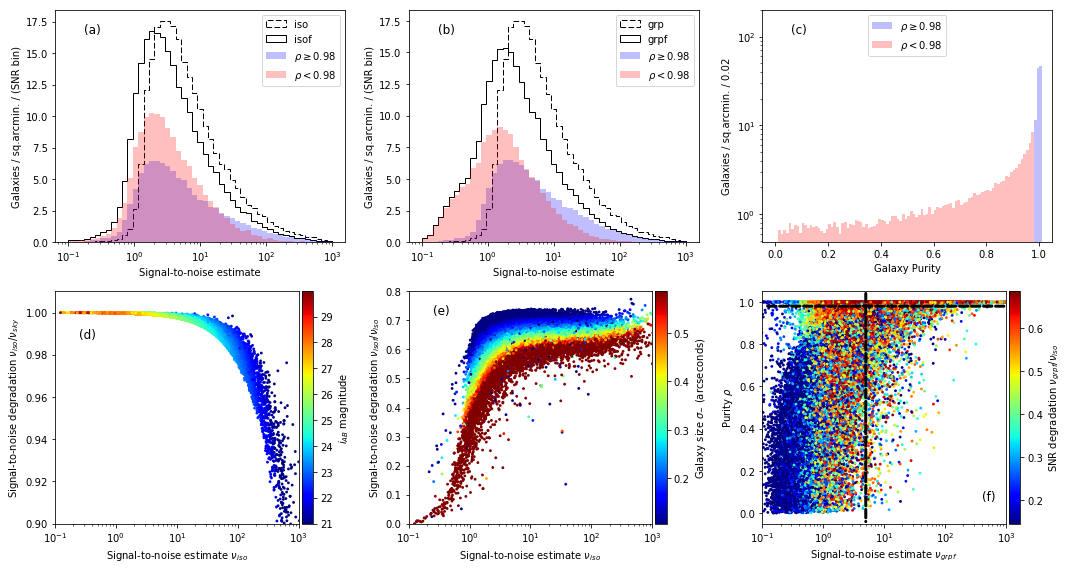

In [20]:
snr_plot(LSST_i,save='snr_lsst_i', detection_cut=5.)

Simulated area = 186.434 sq.arcmins.
Stellar sources simulated 0
Number of galaxies 44850
Found 44451 visible sources (238.4/sq.arcmin.)
Median snr_sky = 1.172
Median snr_iso = 1.171
Median snr_grp = 1.153
Median snr_isof = 0.651
Median snr_grpf = 0.468
Found 23369 blended sources (125.3/sq.arcmin.) with purity < 0.980 = 52.6% of visible sources
Fraction of visible galaxies with f_bulge < 0.1 is 89.2%


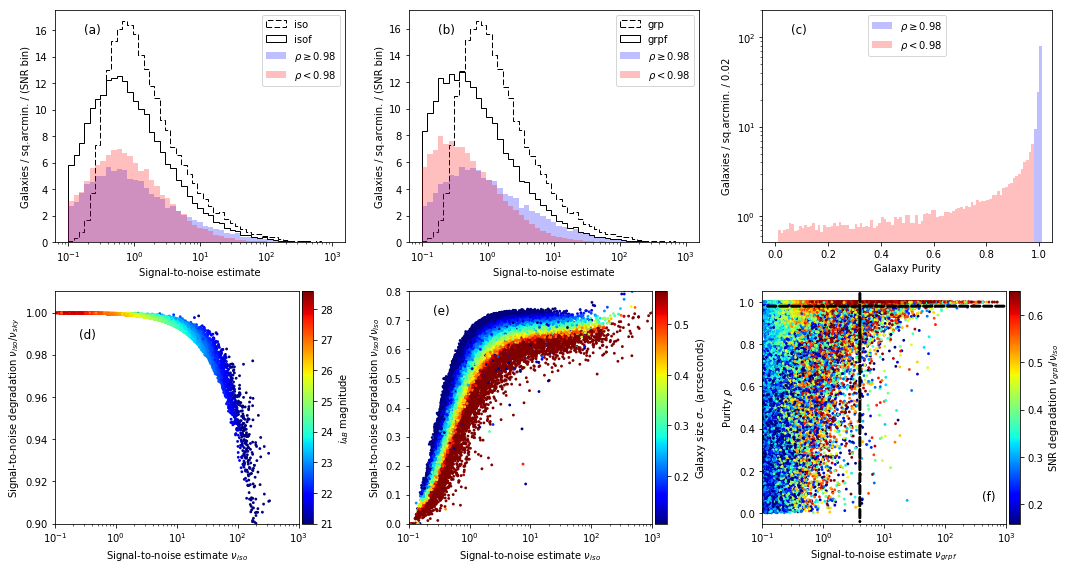

In [21]:
snr_plot(DES_i,detection_cut=4.,save='snr_des_i')

Simulated area = 67.342 sq.arcmins.
Stellar sources simulated 0
Number of galaxies 16426
Found 16290 visible sources (241.9/sq.arcmin.)
Median snr_sky = 2.974
Median snr_iso = 2.972
Median snr_grp = 2.971
Median snr_isof = 1.795
Median snr_grpf = 1.487
Found 6620 blended sources (98.3/sq.arcmin.) with purity < 0.980 = 40.6% of visible sources
Fraction of visible galaxies with f_bulge < 0.1 is 89.5%


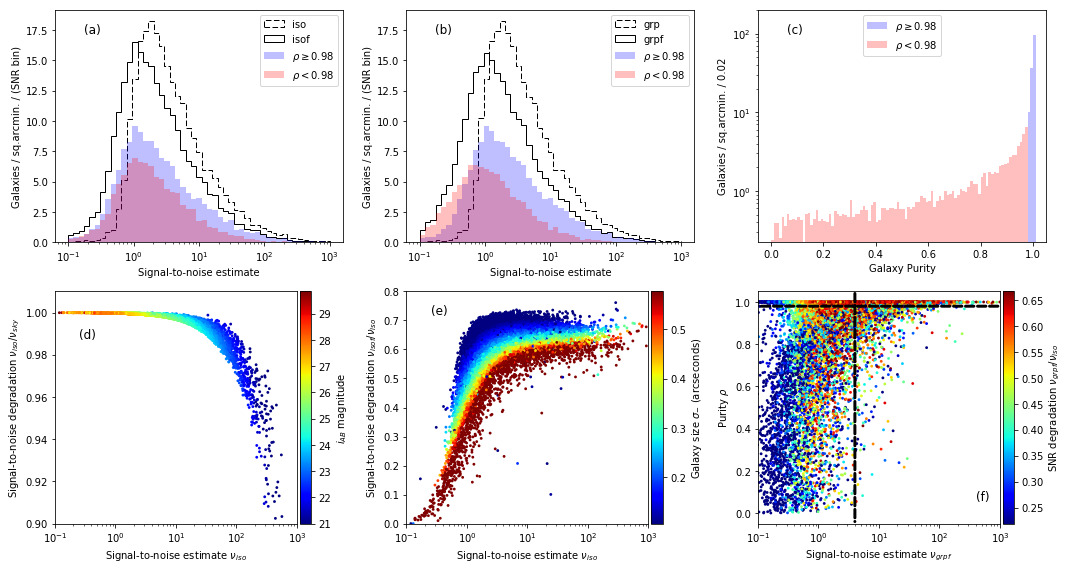

In [22]:
snr_plot(HSC_i,detection_cut=4.,save='snr_hsc_i')

## Samples

In [23]:
def make_samples(cat,isolation_cut,detection_cut,verbose=True):
    # Only use sources with centroids within the area and snr_iso > 0.
    bad_snr = (cat['snr_iso']<=0.)
    num_bad = np.count_nonzero(bad_snr)
    if (num_bad > 0) and verbose:
        print 'Dropped %d sources with snr_iso = 0 (max. snr_sky = %.3f)' % (
            num_bad,np.max(cat['snr_sky'][bad_snr]))
    #visible = np.logical_and(np.logical_not(bad_snr),cat['visible']>0)
    star = (cat['db_id']<10000000)
    #print 'Dropped %d sources with snr_iso = 0 (max. snr_sky = %.3f)' % (
    #    np.count_nonzero(bad_snr),np.max(cat['snr_sky'][bad_snr]))
    if verbose:
        print 'Stellar sources simulated %d' % (np.count_nonzero(star))
    gal = np.logical_not(star)
    big_emag = np.logical_or(np.absolute(cat['e1'])>10,np.absolute(cat['e2'])>10)
    emag = np.sqrt(cat['e1']**2+cat['e2']**2)
    no_emag = np.logical_or(np.isnan(emag),big_emag)
    gal2 = np.logical_and(gal,np.logical_not(no_emag))
    vis_aux = np.logical_and(cat['visible']>0,gal2)
    if verbose:
        print 'Number of galaxies %d' % (np.count_nonzero(gal2))
    visible = np.logical_and(np.logical_not(bad_snr),vis_aux)
    num_visible = np.count_nonzero(visible)
    # Undetected sources are visible but fail the detection cut.
    undetected = np.logical_and(visible,cat['snr_grpf']<detection_cut)
    num_undetected = np.count_nonzero(undetected)
    detected = np.logical_and(visible,cat['snr_grpf']>=detection_cut)
    num_detected = np.count_nonzero(detected)
    # Blended sources are visible, detected, and fail the purity cut.
    blended = np.logical_and(detected,cat['purity']<isolation_cut)
    num_blended = np.count_nonzero(blended)
    # Isolated sources are visible, detected, and pass the purity cut.
    isolated = np.logical_and(detected,cat['purity']>=isolation_cut)
    num_isolated = np.count_nonzero(isolated)
    # Print summary statistics.
    if verbose:
        print 'Visible sample fractions: undetected %.2f%%, blended %.2f%%, isolated %.2f%%' % (
            100.*num_undetected/num_visible,100.*num_blended/num_visible,100.*num_isolated/num_visible)
        print 'Detected sample fractions: blended %.2f%%, isolated %.2f%%' % (
            100.*num_blended/num_detected,100.*num_isolated/num_detected)
    return undetected,detected,blended,isolated

In [24]:
def samples_plot(results,isolation_cut=0.98,detection_cut=6.,save=None):
    hdr = results[0].header
    cat = astropy.table.Table.read(results,hdu=1)
    # Get our filter band.
    filter = hdr['FILTER_BAND'[-8:]].rstrip()
    # Calculate the simulated area in sq.arcmins.
    area = hdr['IMAGE_WIDTH'[-8:]]*hdr['IMAGE_HEIGHT'[-8:]]*hdr['PIXEL_SCALE'[-8:]]**2/3600.
    print 'Simulated area = %.3f sq.arcmins.' % area
    area_wgt = np.empty_like(cat['snr_sky'])
    area_wgt[:] = 1/area
    # Get our samples.
    undetected,detected,blended,isolated = make_samples(cat,isolation_cut,detection_cut)
    # Initialize figure.
    fig = plt.figure(figsize=(12,8))
    nrow,ncol = 2,3
    # redshift
    plt.subplot(nrow,ncol,1)
    zmax=5.
    nbins=25
    plt.hist(cat['z'][detected],bins=nbins,range=(0,zmax),histtype='step',color='black',
             weights=area_wgt[detected],label='Detected')
    plt.hist(cat['z'][isolated],bins=nbins,range=(0,zmax),histtype='step',color='blue',ls='dashed',
             weights=area_wgt[isolated],label='Isolated')
    plt.hist(cat['z'][blended],bins=nbins,range=(0,zmax),histtype='stepfilled',color='red',alpha=0.5,
             weights=area_wgt[blended],label='Blended')
    plt.xlabel('Catalog redshift')
    plt.ylabel('Galaxies / sq.arcmin. / ($\Delta z = %.1f$)' % (zmax/nbins))
    plt.annotate('(a)',xy=(0.4,0.9),xycoords='axes fraction',fontsize='large')
    plt.legend()
    # size
    plt.subplot(nrow,ncol,2)
    rmax=1.5
    nbins=30
    plt.hist(cat['sigma_m'][detected],bins=nbins,range=(0,rmax),histtype='step',color='black',
             weights=area_wgt[detected],label='Detected')
    plt.hist(cat['sigma_m'][isolated],bins=nbins,range=(0,rmax),histtype='step',color='blue',ls='dashed',
             weights=area_wgt[isolated],label='Isolated')
    plt.hist(cat['sigma_m'][blended],bins=nbins,range=(0,rmax),histtype='stepfilled',color='red',alpha=0.5,
             weights=area_wgt[blended],label='Blended')
    plt.xlim(0.,rmax)
    plt.xlabel('Catalog size $\sigma_{-} = |Q|^{1/4}$ (arcsec.)')
    plt.ylabel('Galaxies / sq. arcmin. / ($\Delta\sigma_{-}=%.1f$)' % (rmax/nbins))
    plt.annotate('(b)',xy=(0.4,0.9),xycoords='axes fraction',fontsize='large')
    plt.legend()
    # bulge fraction
    plt.subplot(nrow,ncol,3)
    nbins=29
    plt.hist(cat['f_bulge'][detected],bins=nbins,range=(-0.06,1.06),histtype='step',color='black',
            weights=area_wgt[detected],label='Detected')
    plt.hist(cat['f_bulge'][isolated],bins=nbins,range=(-0.06,1.06),histtype='step',color='blue',ls='dashed',
            weights=area_wgt[isolated],label='Isolated')
    plt.hist(cat['f_bulge'][blended],bins=nbins,range=(-0.06,1.06),histtype='stepfilled',color='red',alpha=0.5,
            weights=area_wgt[blended],label='Blended')
    plt.yscale('log')
    plt.xlim(-0.06,1.06)
    plt.ylim(1e-2,8e1)
    plt.xlabel('Bulge-to-total flux fraction')
    plt.ylabel('Galaxies / sq.armin. / %.2f' % (1./nbins))
    plt.annotate('(c)',xy=(0.4,0.9),xycoords='axes fraction',fontsize='large')
    plt.legend()
    # ellipticity magnitude
    plt.subplot(nrow,ncol,4)
    emag = np.sqrt(cat['e1']**2+cat['e2']**2)
    emax=0.68
    nbins=17
    plt.hist(emag[detected],bins=nbins,range=(0,emax),histtype='step',color='black',
        weights=area_wgt[detected],label='Detected')
    plt.hist(emag[isolated],bins=nbins,range=(0,emax),histtype='step',color='blue',ls='dashed',
        weights=area_wgt[isolated],label='Isolated')
    plt.hist(emag[blended],bins=nbins,range=(0,emax),histtype='stepfilled',color='red',alpha=0.5,
        weights=area_wgt[blended],label='Blended')
    plt.xlim(0,emax)
    plt.xlabel('Catalog ellipticity magnitude $|\epsilon|$')
    plt.ylabel('Galaxies / sq.arcmin. / ($\Delta\epsilon=%.2f$)' % (emax/nbins))
    plt.annotate('(d)',xy=(0.4,0.9),xycoords='axes fraction',fontsize='large')
    plt.legend()
    #
    plt.subplot(nrow,ncol,5)
    abmin,abmax=20.,27.
    nbins=14
    plt.hist(cat['ab_mag'][detected],bins=nbins,range=(abmin,abmax),histtype='step',color='black',
        weights=area_wgt[detected],label='Detected')
    plt.hist(cat['ab_mag'][isolated],bins=nbins,range=(abmin,abmax),histtype='step',color='blue',ls='dashed',
        weights=area_wgt[isolated],label='Isolated')
    plt.hist(cat['ab_mag'][blended],bins=nbins,range=(abmin,abmax),histtype='stepfilled',color='red',alpha=0.5,
        weights=area_wgt[blended],label='Blended')
    plt.ylim(0.,12.)
    plt.xlabel('Catalog $%s_{AB}$ magnitude' % filter)
    plt.ylabel('Galaxies / sq.arcmin. / (%.1f mag)' % ((abmax-abmin)/nbins))
    plt.annotate('(e)',xy=(0.85,0.9),xycoords='axes fraction',fontsize='large')
    plt.legend(loc='upper left')
    #
    plt.subplot(nrow,ncol,6)
    rimin,rimax = -0.6,+1.8
    nbins=12
    plt.hist(cat['ri_color'][detected],bins=nbins,range=(rimin,rimax),histtype='step',color='black',
        weights=area_wgt[detected],label='Detected')
    plt.hist(cat['ri_color'][isolated],bins=nbins,range=(rimin,rimax),histtype='step',color='blue',ls='dashed',
        weights=area_wgt[isolated],label='Isolated')
    plt.hist(cat['ri_color'][blended],bins=nbins,range=(rimin,rimax),histtype='stepfilled',color='red',alpha=0.5,
        weights=area_wgt[blended],label='Blended')
    plt.xlabel('Catalog color $(r-i)_{AB}$')
    plt.ylabel('Galaxies / sq.arcmin. / (%.1f mag)' % ((rimax-rimin)/nbins))
    plt.annotate('(f)',xy=(0.1,0.9),xycoords='axes fraction',fontsize='large')
    plt.legend()
    #
    plt.tight_layout();
    if save is not None:
        plt.savefig(save+'.pdf')
        plt.savefig(save+'.png')

Simulated area = 186.414 sq.arcmins.
Dropped 7 sources with snr_iso = 0 (max. snr_sky = 0.117)
Stellar sources simulated 0
Number of galaxies 45289
Visible sample fractions: undetected 71.02%, blended 10.80%, isolated 18.17%
Detected sample fractions: blended 37.28%, isolated 62.72%


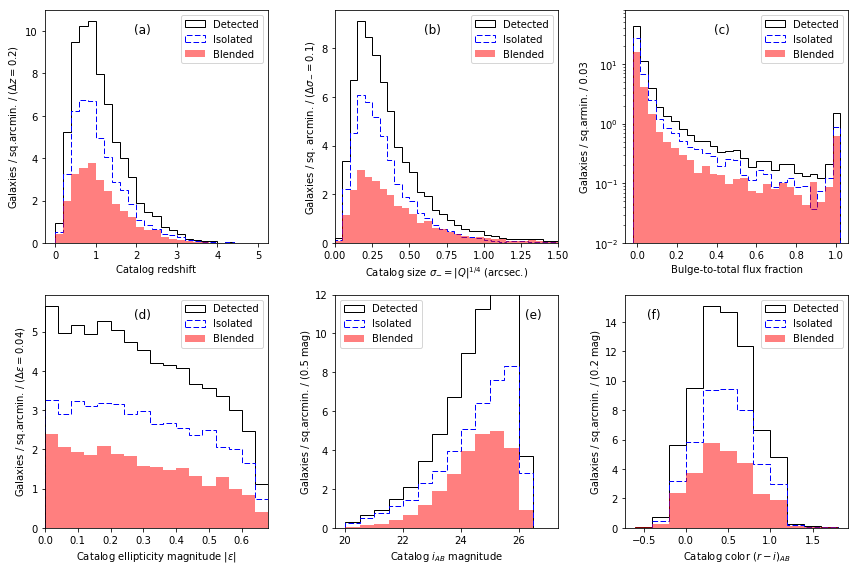

In [25]:
samples_plot(LSST_i,save='samples_lsst_i', detection_cut=5.)

Simulated area = 186.434 sq.arcmins.
Dropped 164 sources with snr_iso = 0 (max. snr_sky = 0.166)
Stellar sources simulated 0
Number of galaxies 44850
Visible sample fractions: undetected 89.39%, blended 2.77%, isolated 7.84%
Detected sample fractions: blended 26.10%, isolated 73.90%


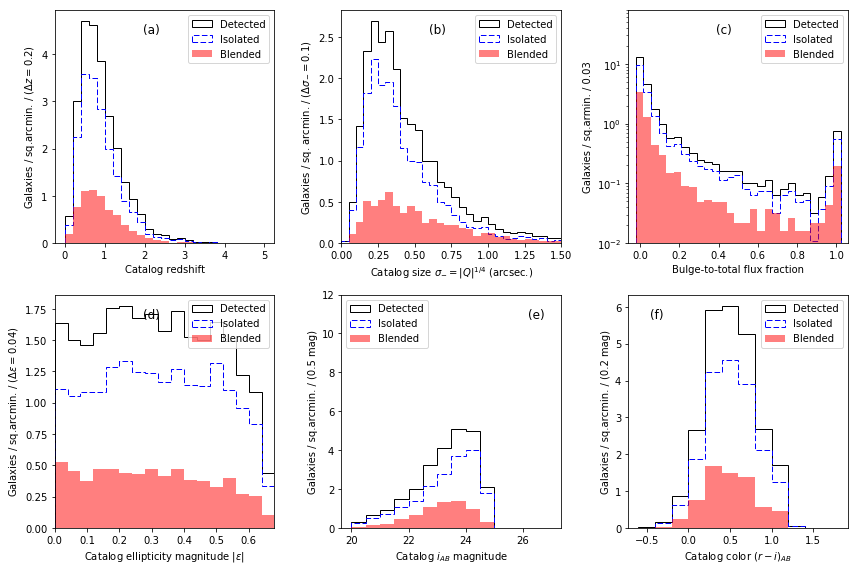

In [26]:
samples_plot(DES_i,save='samples_des_i', detection_cut=4.)

Simulated area = 67.342 sq.arcmins.
Dropped 5 sources with snr_iso = 0 (max. snr_sky = 0.130)
Stellar sources simulated 0
Number of galaxies 16426
Visible sample fractions: undetected 75.46%, blended 6.29%, isolated 18.25%
Detected sample fractions: blended 25.62%, isolated 74.38%


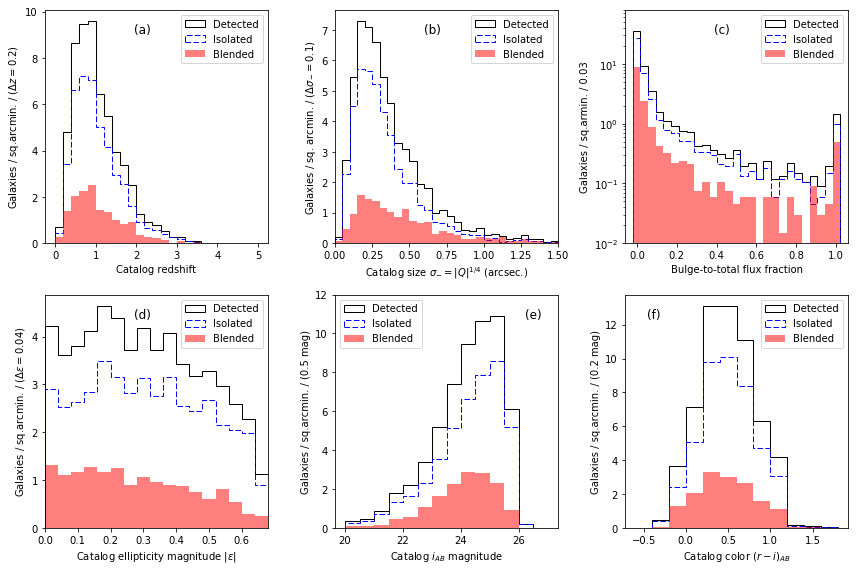

In [27]:
samples_plot(HSC_i,save='samples_hsc_i', detection_cut=4.)

## Shear Estimation

In [30]:
def shear_plot(results,match=None,isolation_cut=0.98,detection_cut=6.,save=None,correct_rpsf=True, fix_sigma_i=False, select_detected=False):
    hdr = results[0].header
    cat = astropy.table.Table.read(results,hdu=1)
    # Get our filter band.
    filter = hdr['FILTER_BAND'[-8:]].rstrip()
    # Calculate the simulated area in sq.arcmins.
    area = hdr['IMAGE_WIDTH'[-8:]]*hdr['IMAGE_HEIGHT'[-8:]]*hdr['PIXEL_SCALE'[-8:]]**2/3600.
    print 'Simulated area = %.3f sq.arcmins.' % area
    area_wgt = np.empty_like(cat['snr_sky'])
    area_wgt[:] = 1/area
    # Only use sources with centroids within the area and snr_iso > 0.
    bad_snr = (cat['snr_iso']<=0.)
    # Get our samples.
 
    if match!=None:
        detected2,matched2,indices2,distance2 = match
        print 1.0*np.count_nonzero(matched2)/len(matched2)
    undetected,detected,blended,isolated = make_samples(cat,isolation_cut,detection_cut)
 
    # Calculate the intrinsic shape noise variance of detected objects.
    intrinsic_var = 0.5*(np.var(cat['e1'][detected]) + np.var(cat['e2'][detected]))
    print 'Detected intrinsic shape-noise RMS = %.3f' % np.sqrt(intrinsic_var)
    # Calculate neff weights per object.
    wgt = 0.5*(intrinsic_var/(intrinsic_var+cat['dg1_grp']**2)+intrinsic_var/(intrinsic_var+cat['dg2_grp']**2))
    # Calculate |e| values per object.
    emag = np.sqrt(cat['e1']**2+cat['e2']**2)
    # Summary statistics.
    num_detected = np.count_nonzero(detected)
    for name in ('detected','isolated','blended'):
        sample = eval(name)
        num_sample = np.count_nonzero(sample)
        Neff = np.sum(wgt[sample])/area
        var_e = 0.5*(np.nanvar(cat['e1'][sample])+np.nanvar(cat['e2'][sample]))
        zavg = np.sum(wgt[sample]*cat['z'][sample])/np.sum(wgt[sample])
        print '%10s sample is %5.1f%% of detected with neff/area = %6.3f, RMS e = %6.4f, <z> = %.3f, <n> = %.3f' % (
            name,100.*num_sample/num_detected,Neff,np.sqrt(var_e),zavg,num_sample/area)
    # Calculate sigma_i,12 and the pessimistic, fiducial and optimistic scenarios
    sm12 = np.sqrt(0.5*cat['dg1_grp']**2+0.5*cat['dg2_grp']**2)
    sm = np.sqrt((cat['dg1_grp']**2*cat['dg2_grp']**2+intrinsic_var*sm12**2)/(intrinsic_var+sm12**2))
    pes = sm < 0.5*np.sqrt(intrinsic_var)
    fid = sm < np.sqrt(intrinsic_var)
    op = sm < 2.*np.sqrt(intrinsic_var)
    # Calculate R to compare with Chang et al. 2013
    r_psf = hdr['PSF_SIGP']
    if correct_rpsf:
        r_psf = r_psf/(2.*np.sqrt(2*np.log(2)))
    R = cat['sigma_p']**2/r_psf**2
    # Use the value from the catalog or fix it to match Chang et al. 2013
    if fix_sigma_i:
        intrinsic_var=0.26**2
    # Formula of Bernstein and Jain 2002 with coefficients from Chang et al. 2013
    a= 1.58
    b = 5.03
    c = 0.39
    sm_chang = a/cat['snr_iso']*(1+(b/R)**c)
    pes2 = sm_chang < 0.5*np.sqrt(intrinsic_var)
    fid2 = sm_chang < np.sqrt(intrinsic_var)
    op2 = sm_chang < 2.*np.sqrt(intrinsic_var)
    wgt_c = intrinsic_var/(intrinsic_var+sm_chang**2)
    if select_detected:
        pes2 = np.logical_and(pes2,detected)
        pes = np.logical_and(pes,detected)
        fid2 = np.logical_and(fid2,detected)
        fid = np.logical_and(fid,detected)
        op2 = np.logical_and(op2,detected)
        op = np.logical_and(op,detected)
    print 'Pessimistic neff (Chang fitting formula): ', np.sum(wgt_c[pes2])/area
    print 'Fiducial neff (Chang fitting formula): ', np.sum(wgt_c[fid2])/area
    print 'Optimistic neff (Chang fitting formula): ', np.sum(wgt_c[op2])/area
    print 'Ratio of errors Chang/Fisher: ', np.mean(sm_chang[detected]/sm[detected])
    print 'Pessimistic neff: ', np.sum(wgt[pes])/area, ' Number of sources ', np.count_nonzero(pes)
    print 'Fiducial neff: ',np.sum(wgt[fid])/area, ' Number of sources ', np.count_nonzero(fid)/area
    print 'Optimistic neff: ',np.sum(wgt[op])/area, ' Number of sources ', np.count_nonzero(op)/area
    def make_plot(figlabel,what,nbins,rng,xlabel,binformat,loc='upper right',logx=False,logy=False,accumdir=None):
        if logx:
            bins=np.logspace(np.log10(rng[0]),np.log10(rng[1]),nbins+1,endpoint=True)
        else:
            bins=np.linspace(rng[0],rng[1],nbins+1,endpoint=True)
        plt.hist(what[detected],weights=area_wgt[detected],
                 color='black',histtype='step',ls='dotted',label='Unweighted',bins=bins)
        if logx:
            plt.xscale('log')
        plt.xlim(*rng)
        if logy:
            plt.yscale('log')
            ymin,ymax = plt.gca().get_ylim()
            plt.ylim(1e-4*ymax,ymax) # always show 4 decades
        plt.gca().autoscale(False)
        plt.hist(what[detected],weights=area_wgt[detected]*wgt[detected],
                 color='blue',alpha=0.25,histtype='stepfilled',label='Isolated',bins=bins)
        plt.hist(what[blended],weights=area_wgt[blended]*wgt[blended],
                 facecolor='red',lw=0,histtype='stepfilled',label='Blended',bins=bins)
        plt.xlabel(xlabel)
        try:
            binlabel = binformat % ((rng[1]-rng[0])/nbins)
        except TypeError:
            binlabel = binformat # ok if format does not need any interpolation
        plt.ylabel('Galaxies / sq.arcmin. / (%s)' % binlabel)
        plt.annotate(figlabel,xy=(0.5,0.9),xycoords='axes fraction',fontsize='large',horizontalalignment='center')
        plt.legend(loc = loc)
        if accumdir in ('up','down'):
            detected_accum = accumulate(what,bins,detected,area_wgt*wgt,accumdir)
            isolated_accum = accumulate(what,bins,isolated,area_wgt*wgt,accumdir)
            return bins,detected_accum,isolated_accum
            
    def accumulate(what,bins,sample,weights,direction):
        bincounts,binedges = np.histogram(what[sample],bins=bins,weights=weights[sample])
        assert np.array_equal(bins,binedges)
        cummulative = np.zeros_like(bins)
        if direction == 'up':
            cummulative[1:] = np.cumsum(bincounts)
            underflow = (what[sample] <= bins[0])
            cummulative += np.sum(weights[sample][underflow])
        elif direction == 'down':
            cummulative[:-1] = np.cumsum(bincounts[::-1])[::-1]
            overflow = (what[sample] > bins[-1])
            cummulative += np.sum(weights[sample][overflow])
        else:
            raise RuntimeError('invalid direction "%s".' % direction)
        return cummulative
    
    fig = plt.figure(figsize=(15,15))
    nrow,ncol = 3,3
    #
    plt.subplot(nrow,ncol,1)
    make_plot('(a)',cat['z'],20,(0.,4.),'Catalog redshift $z$','$\Delta z=%.2f$')
    #
    plt.subplot(nrow,ncol,2)
    x,y1,y2 = make_plot('(b)',cat['ab_mag'],28,(20.,27.),'Catalog magnitude $%s_{AB}$' % filter,'%.1f mag',
        loc='upper left',accumdir='up')
    #
    plt.subplot(nrow,ncol,3)
    plt.plot(x,y1,'k-',label='Detected')
    plt.plot(x,y2,'b-',label='Isolated')
    plt.plot(x,y1-y2,'r-',label='Blended')
    plt.xlim(x[0],x[-1])
    plt.xlabel('Maximum magnitude $%s_{AB}$' % filter)
    plt.ylabel('Integrated $N_{eff}$ (Galaxies / sq.arcmin.)')
    plt.annotate('(c)',xy=(0.5,0.9),xycoords='axes fraction',fontsize='large',horizontalalignment='center')
    plt.legend(loc='upper left')
    #
    plt.subplot(nrow,ncol,4)
    make_plot('(d)',emag,17,(0.,0.68),'Catalog ellipticity magnitude $|\epsilon|$','$\Delta\epsilon=%.2f$')
    #
    plt.subplot(nrow,ncol,5)
    x,y1,y2 = make_plot('(e)',cat['sigma_m'],30,(0.,1.5),'Catalog size $\sigma_{-} = |Q|^{1/4}$ (arcsec.)',
        '$\Delta\sigma_{-}=%.1f$',accumdir='down')
    #
    plt.subplot(nrow,ncol,6)
    plt.plot(x,y1,'k-',label='Detected')
    plt.plot(x,y2,'b-',label='Isolated')
    plt.plot(x,y1-y2,'r-',label='Blended')
    plt.xlim(x[0],x[-1])
    plt.xlabel('Minimum catalog size $\sigma_{-}$ (arcsec.)')
    plt.ylabel('Integrated $N_{eff}$ (Galaxies / sq.arcmin.)')
    plt.annotate('(f)',xy=(0.5,0.9),xycoords='axes fraction',fontsize='large',horizontalalignment='center')
    plt.legend()
    #
    plt.subplot(nrow,ncol,7)
    ##make_plot('(g)',cat['f_bulge'],29,(-0.06,1.06),'Bulge-to-total flux fraction','$%.2f$',logy=True)
    ##make_plot('(g)',cat['beta'],20,(-0.5*np.pi,0.5*np.pi),'Unsheared Position Angle $\\beta$ (rad)','$\Delta\\beta=%.3f$')
    make_plot('(g)',cat['ri_color'],24,(-0.6,+1.8),'Catalog color $(r-i)_{AB}$','%.1f mag')
    #
    plt.subplot(nrow,ncol,8)
    x,y1,y2 = make_plot('(h)',cat['snr_grpf'],40,(detection_cut,200*detection_cut),
        'Signal-to-noise ratio $\\nu_{grpf}$','SNR bin',logx=True,accumdir='down')
    #
    plt.subplot(nrow,ncol,9)
    plt.plot(x,y1,'k-',label='Detected')
    plt.plot(x,y2,'b-',label='Isolated')
    plt.plot(x,y1-y2,'r-',label='Blended')
    plt.xlim(x[0],x[-1])
    plt.ylim(0,None)
    plt.xscale('log')
    plt.xlabel('Minimum signal-to-noise ratio $\\nu_{grpf}$')
    plt.ylabel('Integrated $N_{eff}$ (Galaxies / sq.arcmin.)')
    plt.annotate('(i)',xy=(0.5,0.9),xycoords='axes fraction',fontsize='large',horizontalalignment='center')
    plt.legend()
    #
    plt.tight_layout();
    if save is not None:
        plt.savefig(save+'.pdf')
        plt.savefig(save+'.png')

## For numbers in Table 5 (and LSST r-band Table 4)

Simulated area = 186.414 sq.arcmins.
Dropped 13 sources with snr_iso = 0 (max. snr_sky = 0.128)
Stellar sources simulated 0
Number of galaxies 45315
Visible sample fractions: undetected 69.05%, blended 12.31%, isolated 18.64%
Detected sample fractions: blended 39.78%, isolated 60.22%
Detected intrinsic shape-noise RMS = 0.241
  detected sample is 100.0% of detected with neff/area = 42.800, RMS e = 0.2408, <z> = 1.190, <n> = 74.716
  isolated sample is  60.2% of detected with neff/area = 25.619, RMS e = 0.2452, <z> = 1.158, <n> = 44.997
   blended sample is  39.8% of detected with neff/area = 17.181, RMS e = 0.2339, <z> = 1.237, <n> = 29.719
Pessimistic neff (Chang fitting formula):  25.880629546
Fiducial neff (Chang fitting formula):  37.0601395844
Optimistic neff (Chang fitting formula):  43.8752581249
Ratio of errors Chang/Fisher:  0.964323
Pessimistic neff:  25.8644393762  Number of sources  5146
Fiducial neff:  36.3291642861  Number of sources  43.4464216232
Optimistic neff:  41.46

/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: divide by zero encountered in divide


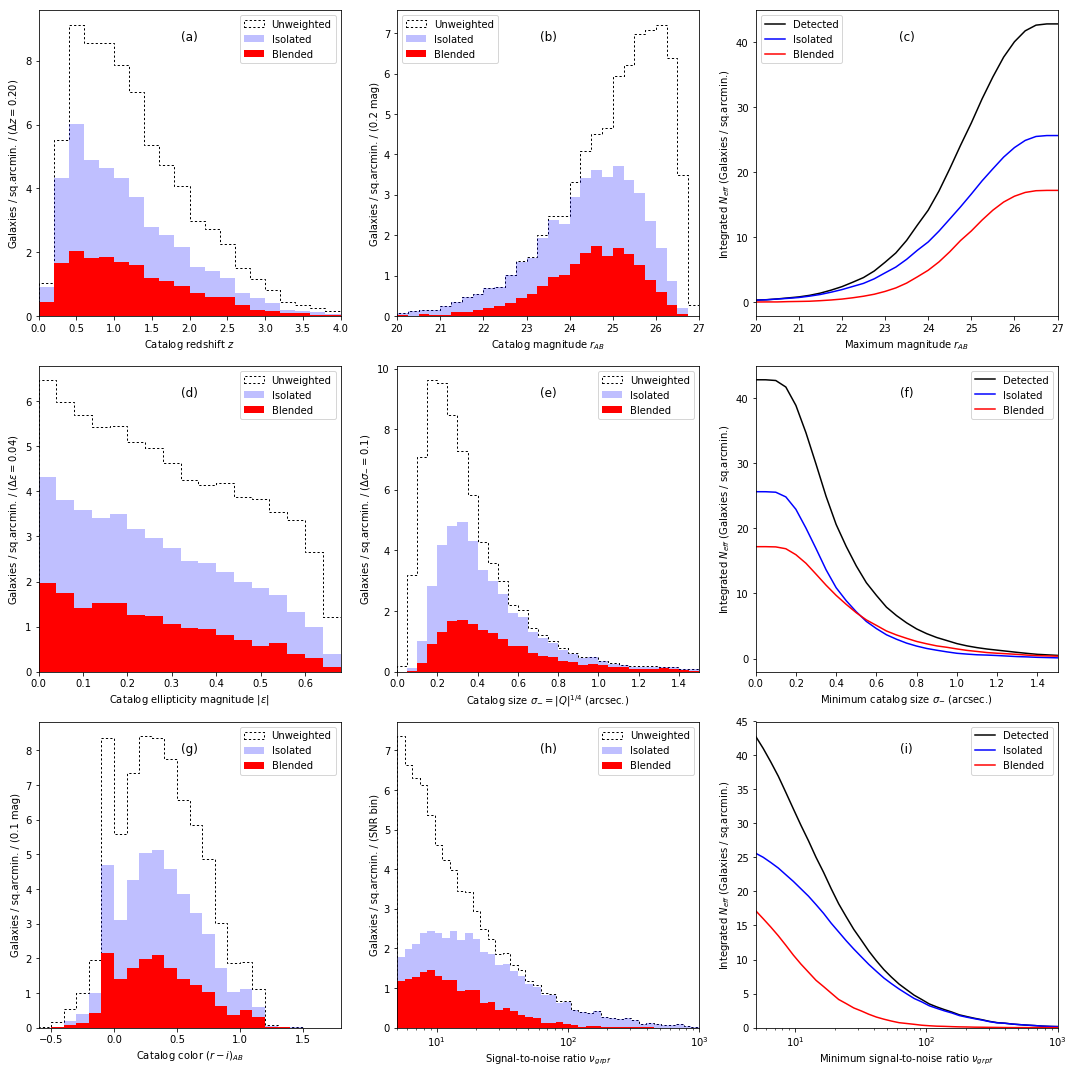

In [31]:
shear_plot(LSST_r,save='LSST_r', detection_cut=5.,correct_rpsf=True,select_detected=True)

## To calculate $N_{eff}$ using Chang's prescription (see how the change in zeropoints affect): Use Chang fitting formula numbers

Simulated area = 186.414 sq.arcmins.
Dropped 13 sources with snr_iso = 0 (max. snr_sky = 0.128)
Stellar sources simulated 0
Number of galaxies 45315
Visible sample fractions: undetected 69.05%, blended 12.31%, isolated 18.64%
Detected sample fractions: blended 39.78%, isolated 60.22%
Detected intrinsic shape-noise RMS = 0.241
  detected sample is 100.0% of detected with neff/area = 42.800, RMS e = 0.2408, <z> = 1.190
  isolated sample is  60.2% of detected with neff/area = 25.619, RMS e = 0.2452, <z> = 1.158
   blended sample is  39.8% of detected with neff/area = 17.181, RMS e = 0.2339, <z> = 1.237
Pessimistic neff (Chang fitting formula):  19.5197682478
Fiducial neff (Chang fitting formula):  28.8113226998
Optimistic neff (Chang fitting formula):  34.9600799382
Ratio of errors Chang/Fisher:  1.48576
Pessimistic neff:  25.8644393762  Number of sources  5146
Fiducial neff:  36.3291642861  Number of sources  8099
Optimistic neff:  41.4651885512  Number of sources  10861


/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: divide by zero encountered in divide


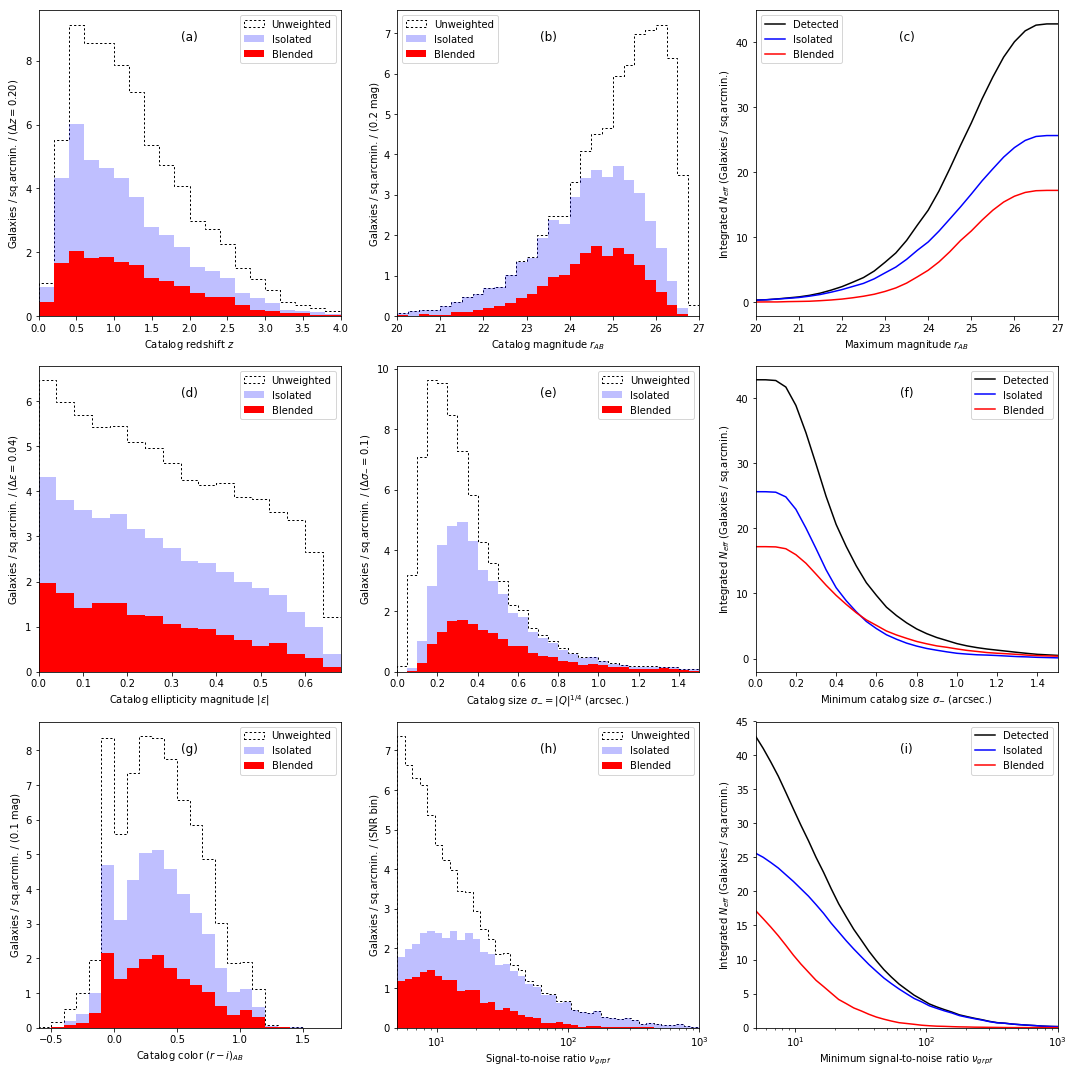

In [51]:
shear_plot(LSST_r,detection_cut=5.,correct_rpsf=False,fix_sigma_i=True,select_detected=True)

## Numbers in Table 4

Simulated area = 186.414 sq.arcmins.
Dropped 7 sources with snr_iso = 0 (max. snr_sky = 0.117)
Stellar sources simulated 0
Number of galaxies 45289
Visible sample fractions: undetected 71.02%, blended 10.80%, isolated 18.17%
Detected sample fractions: blended 37.28%, isolated 62.72%
Detected intrinsic shape-noise RMS = 0.242
  detected sample is 100.0% of detected with neff/area = 41.146, RMS e = 0.2421, <z> = 1.069
  isolated sample is  62.7% of detected with neff/area = 25.693, RMS e = 0.2459, <z> = 1.038
   blended sample is  37.3% of detected with neff/area = 15.454, RMS e = 0.2356, <z> = 1.121
Pessimistic neff (Chang fitting formula):  26.2219039723
Fiducial neff (Chang fitting formula):  39.3919012276
Optimistic neff (Chang fitting formula):  49.5126668829
Ratio of errors Chang/Fisher:  0.999058
Pessimistic neff:  25.8913950529  Number of sources  5155
Fiducial neff:  38.1075814948  Number of sources  8645
Optimistic neff:  47.1963750897  Number of sources  13785


/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: divide by zero encountered in divide


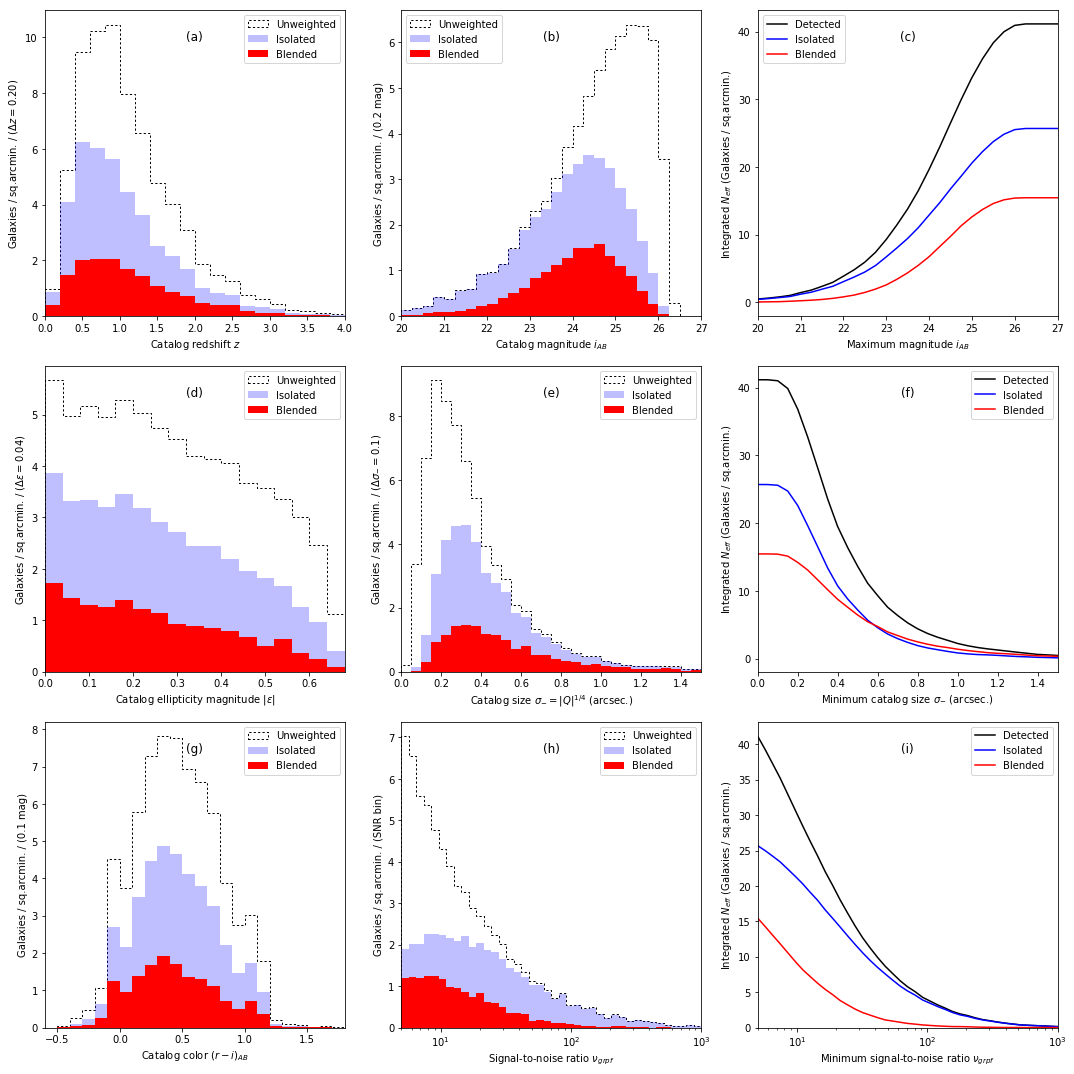

In [58]:
shear_plot(LSST_i,save='LSST_i', detection_cut=5.)

Simulated area = 186.434 sq.arcmins.
Dropped 164 sources with snr_iso = 0 (max. snr_sky = 0.166)
Stellar sources simulated 0
Number of galaxies 44850
Visible sample fractions: undetected 89.39%, blended 2.77%, isolated 7.84%
Detected sample fractions: blended 26.10%, isolated 73.90%
Detected intrinsic shape-noise RMS = 0.257
  detected sample is 100.0% of detected with neff/area = 12.781, RMS e = 0.2571, <z> = 0.869
  isolated sample is  73.9% of detected with neff/area =  9.219, RMS e = 0.2602, <z> = 0.851
   blended sample is  26.1% of detected with neff/area =  3.562, RMS e = 0.2482, <z> = 0.916
Pessimistic neff (Chang fitting formula):  7.08851573332
Fiducial neff (Chang fitting formula):  11.5181923054
Optimistic neff (Chang fitting formula):  15.2348659679
Ratio of errors Chang/Fisher:  0.945809
Pessimistic neff:  6.67146757366  Number of sources  1337
Fiducial neff:  10.797203891  Number of sources  2527
Optimistic neff:  14.064328206  Number of sources  4384


/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: divide by zero encountered in divide


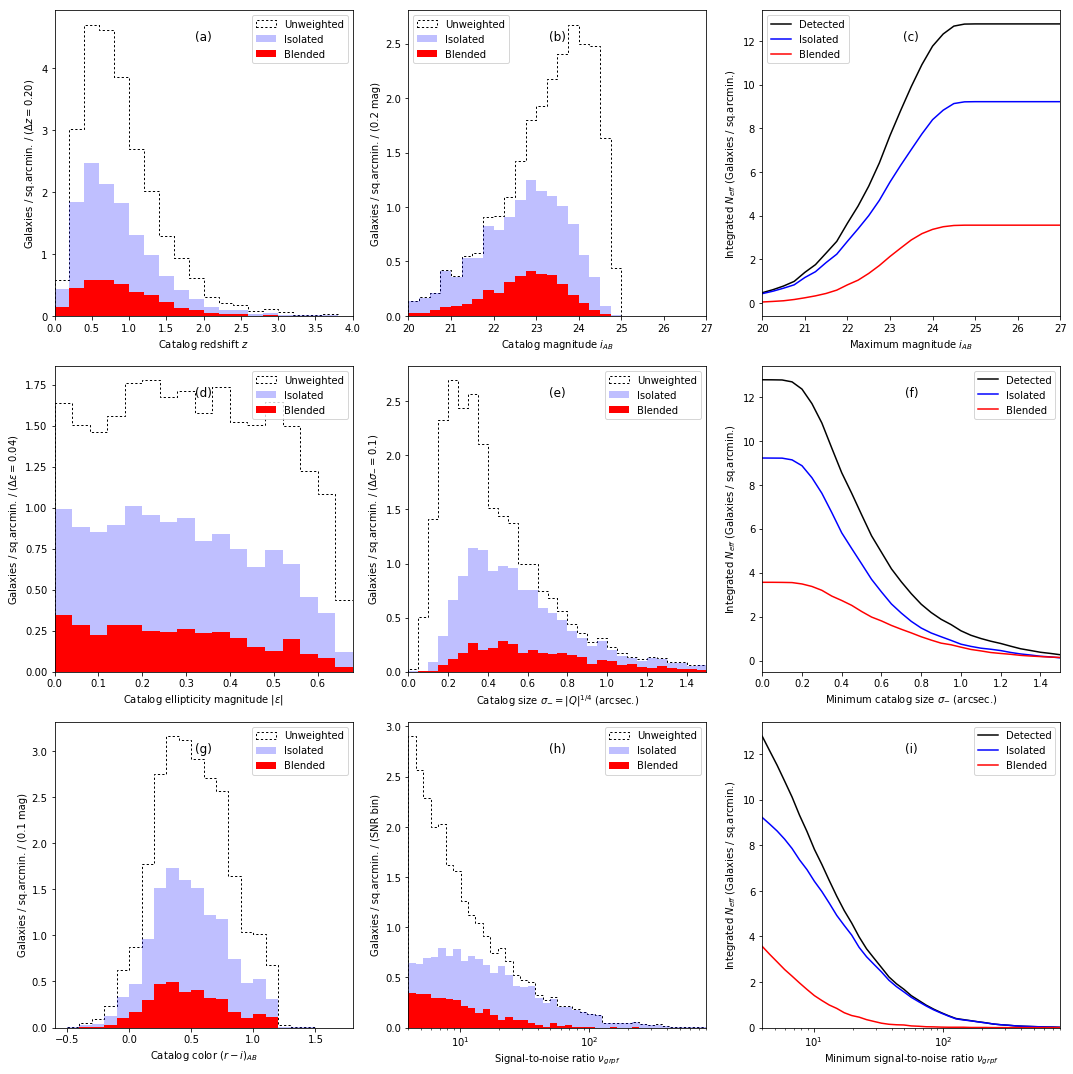

In [59]:
shear_plot(DES_i,save='DES_i',detection_cut=4.)

Simulated area = 186.434 sq.arcmins.
Dropped 73 sources with snr_iso = 0 (max. snr_sky = 0.144)
Stellar sources simulated 0
Number of galaxies 44927
Visible sample fractions: undetected 90.35%, blended 2.61%, isolated 7.05%
Detected sample fractions: blended 27.03%, isolated 72.97%
Detected intrinsic shape-noise RMS = 0.255
  detected sample is 100.0% of detected with neff/area = 11.497, RMS e = 0.2547, <z> = 0.948
  isolated sample is  73.0% of detected with neff/area =  8.145, RMS e = 0.2592, <z> = 0.921
   blended sample is  27.0% of detected with neff/area =  3.352, RMS e = 0.2421, <z> = 1.015
Pessimistic neff (Chang fitting formula):  6.25994889808
Fiducial neff (Chang fitting formula):  10.4308672224
Optimistic neff (Chang fitting formula):  14.0314105882
Ratio of errors Chang/Fisher:  0.932664
Pessimistic neff:  5.68344338187  Number of sources  1141
Fiducial neff:  9.55851826615  Number of sources  2248
Optimistic neff:  12.6056339364  Number of sources  3972


/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: divide by zero encountered in divide


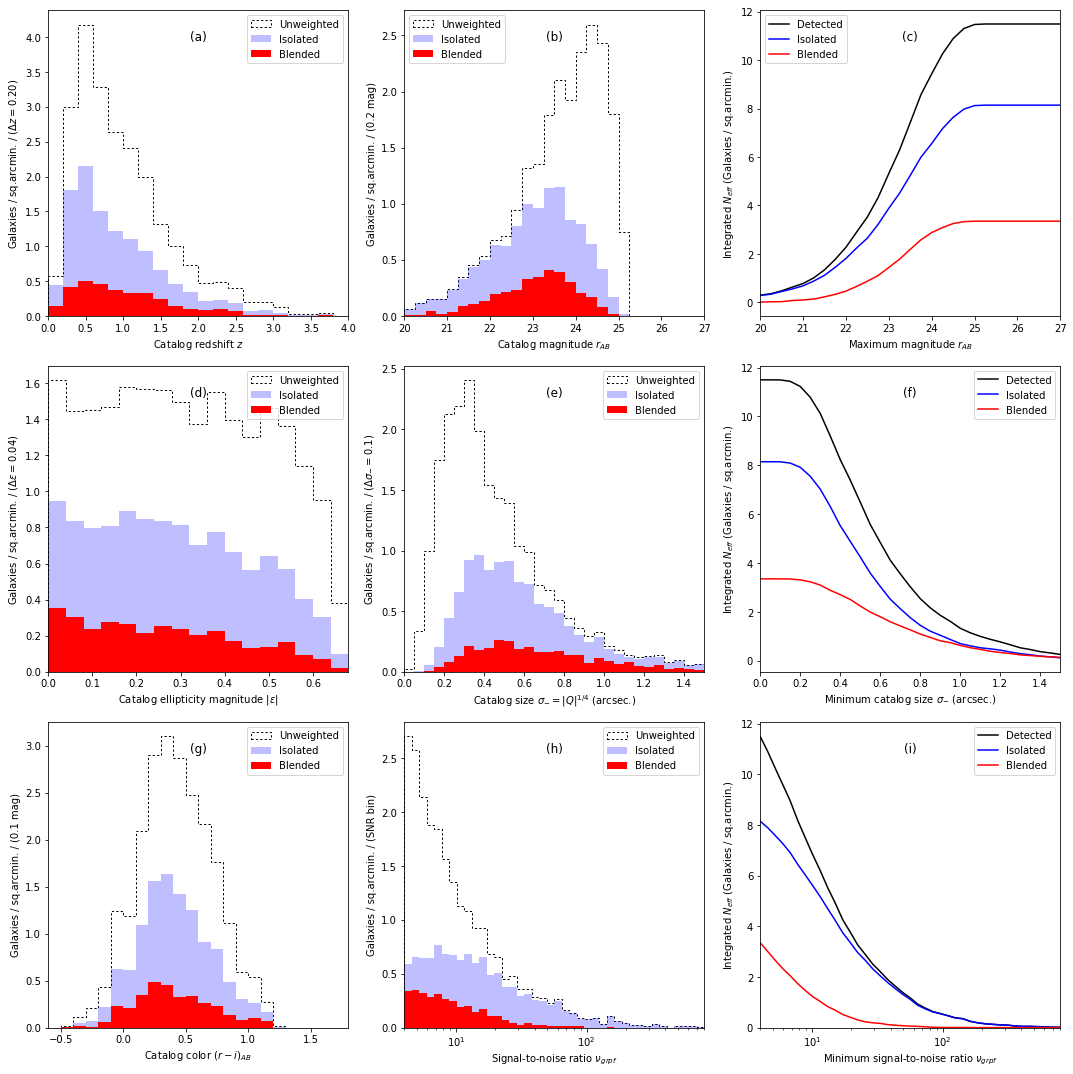

In [60]:
shear_plot(DES_r,save='DES_r',detection_cut=4.)

Simulated area = 67.342 sq.arcmins.
Dropped 5 sources with snr_iso = 0 (max. snr_sky = 0.130)
Stellar sources simulated 0
Number of galaxies 16426
Visible sample fractions: undetected 75.46%, blended 6.29%, isolated 18.25%
Detected sample fractions: blended 25.62%, isolated 74.38%
Detected intrinsic shape-noise RMS = 0.249
  detected sample is 100.0% of detected with neff/area = 36.212, RMS e = 0.2485, <z> = 1.020
  isolated sample is  74.4% of detected with neff/area = 26.372, RMS e = 0.2540, <z> = 1.004
   blended sample is  25.6% of detected with neff/area =  9.840, RMS e = 0.2317, <z> = 1.061
Pessimistic neff (Chang fitting formula):  19.3104692525
Fiducial neff (Chang fitting formula):  30.324735943
Optimistic neff (Chang fitting formula):  38.6370497411
Ratio of errors Chang/Fisher:  1.12246
Pessimistic neff:  21.7394392928  Number of sources  1568
Fiducial neff:  33.1142311432  Number of sources  2747
Optimistic neff:  41.4260772659  Number of sources  4457


/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: divide by zero encountered in divide


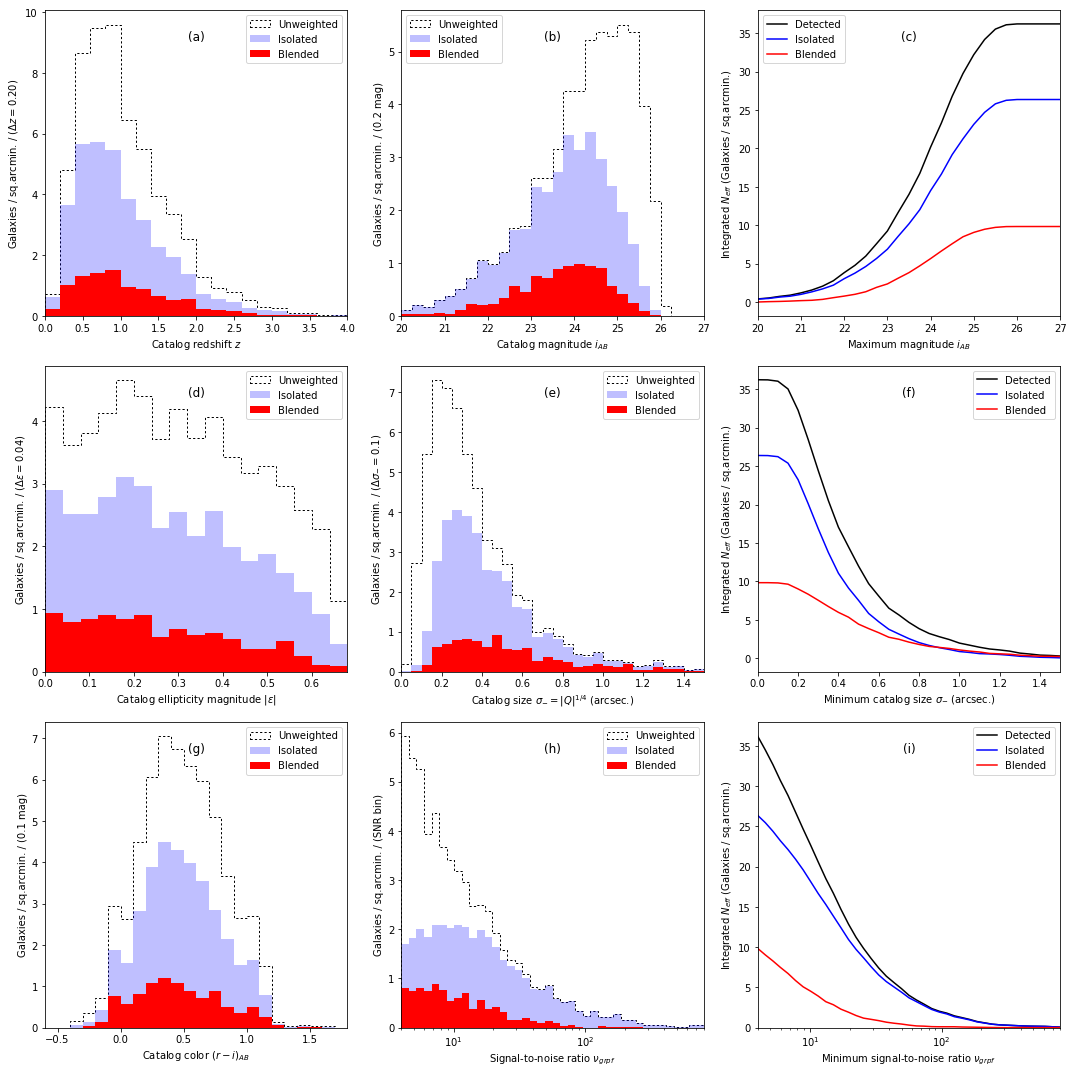

In [61]:
shear_plot(HSC_i,save='HSC_i',detection_cut=4.)

Simulated area = 67.342 sq.arcmins.
Dropped 17 sources with snr_iso = 0 (max. snr_sky = 0.128)
Stellar sources simulated 0
Number of galaxies 16418
Visible sample fractions: undetected 80.97%, blended 4.80%, isolated 14.23%
Detected sample fractions: blended 25.20%, isolated 74.80%
Detected intrinsic shape-noise RMS = 0.250
  detected sample is 100.0% of detected with neff/area = 26.474, RMS e = 0.2505, <z> = 1.081
  isolated sample is  74.8% of detected with neff/area = 19.199, RMS e = 0.2567, <z> = 1.072
   blended sample is  25.2% of detected with neff/area =  7.276, RMS e = 0.2311, <z> = 1.107
Pessimistic neff (Chang fitting formula):  13.3992417089
Fiducial neff (Chang fitting formula):  22.1535876058
Optimistic neff (Chang fitting formula):  29.0700825009
Ratio of errors Chang/Fisher:  1.07864
Pessimistic neff:  14.9341206273  Number of sources  1085
Fiducial neff:  23.5069930637  Number of sources  1975
Optimistic neff:  30.0635972421  Number of sources  3299


/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: divide by zero encountered in divide


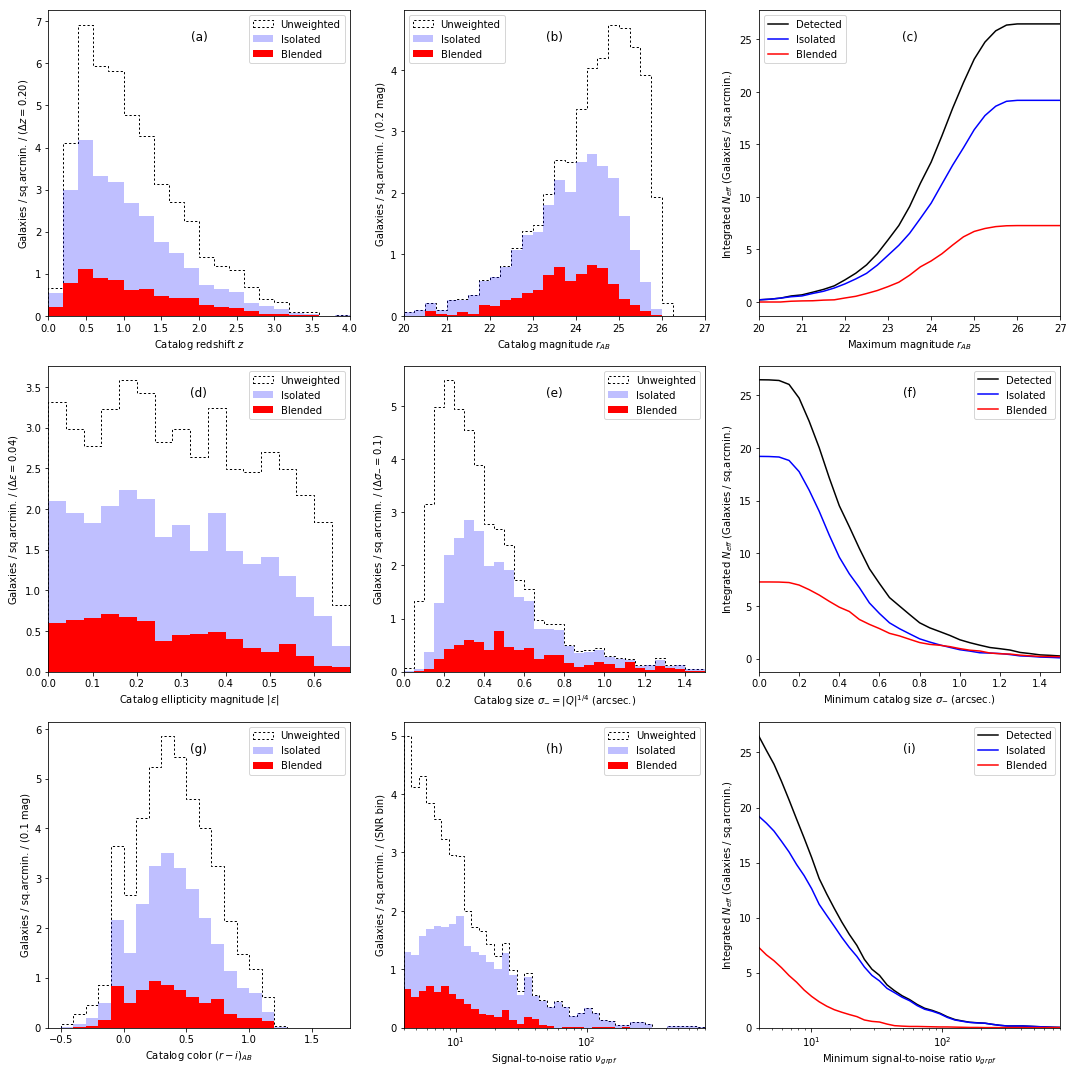

In [62]:
shear_plot(HSC_r,save='HSC_r',detection_cut=4.)

## Numbers in Table 6

Simulated area = 186.434 sq.arcmins.
Dropped 648 sources with snr_iso = 0 (max. snr_sky = 128246.625)
Stellar sources simulated 484
Number of galaxies 44850
Visible sample fractions: undetected 90.38%, blended 2.53%, isolated 7.10%
Detected sample fractions: blended 26.26%, isolated 73.74%
Detected intrinsic shape-noise RMS = 0.257
  detected sample is 100.0% of detected with neff/area = 11.466, RMS e = 0.2571, <z> = 0.875
  isolated sample is  73.7% of detected with neff/area =  8.233, RMS e = 0.2606, <z> = 0.858
   blended sample is  26.3% of detected with neff/area =  3.233, RMS e = 0.2469, <z> = 0.920
Pessimistic neff (Chang fitting formula):  7.08841751868
Fiducial neff (Chang fitting formula):  11.5177942087
Optimistic neff (Chang fitting formula):  15.2329134609
Ratio of errors Chang/Fisher:  0.945299
Pessimistic neff:  5.8998554066  Number of sources  1184
Fiducial neff:  9.64069314366  Number of sources  2266
Optimistic neff:  12.6149905175  Number of sources  3956
Simulated a

/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: divide by zero encountered in divide


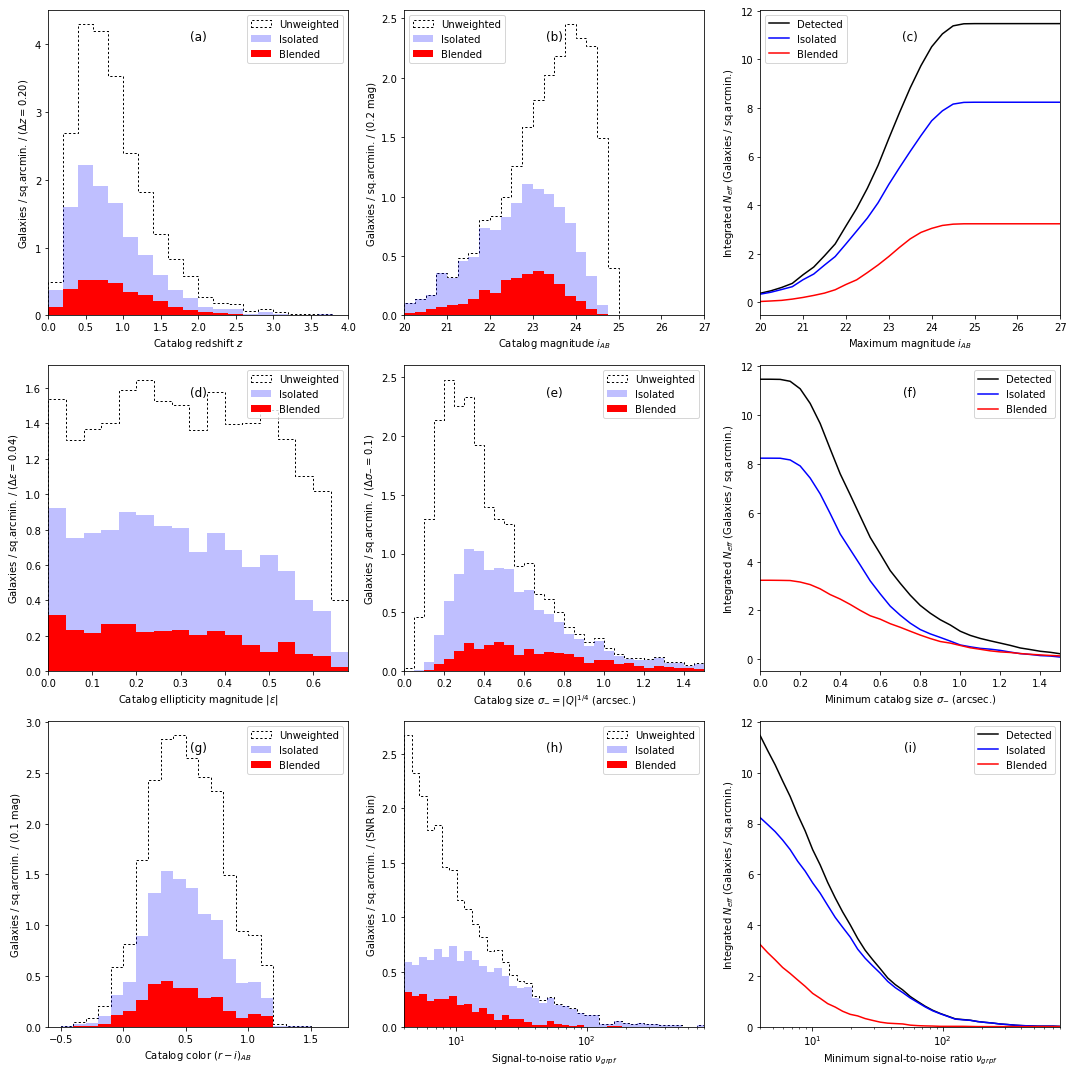

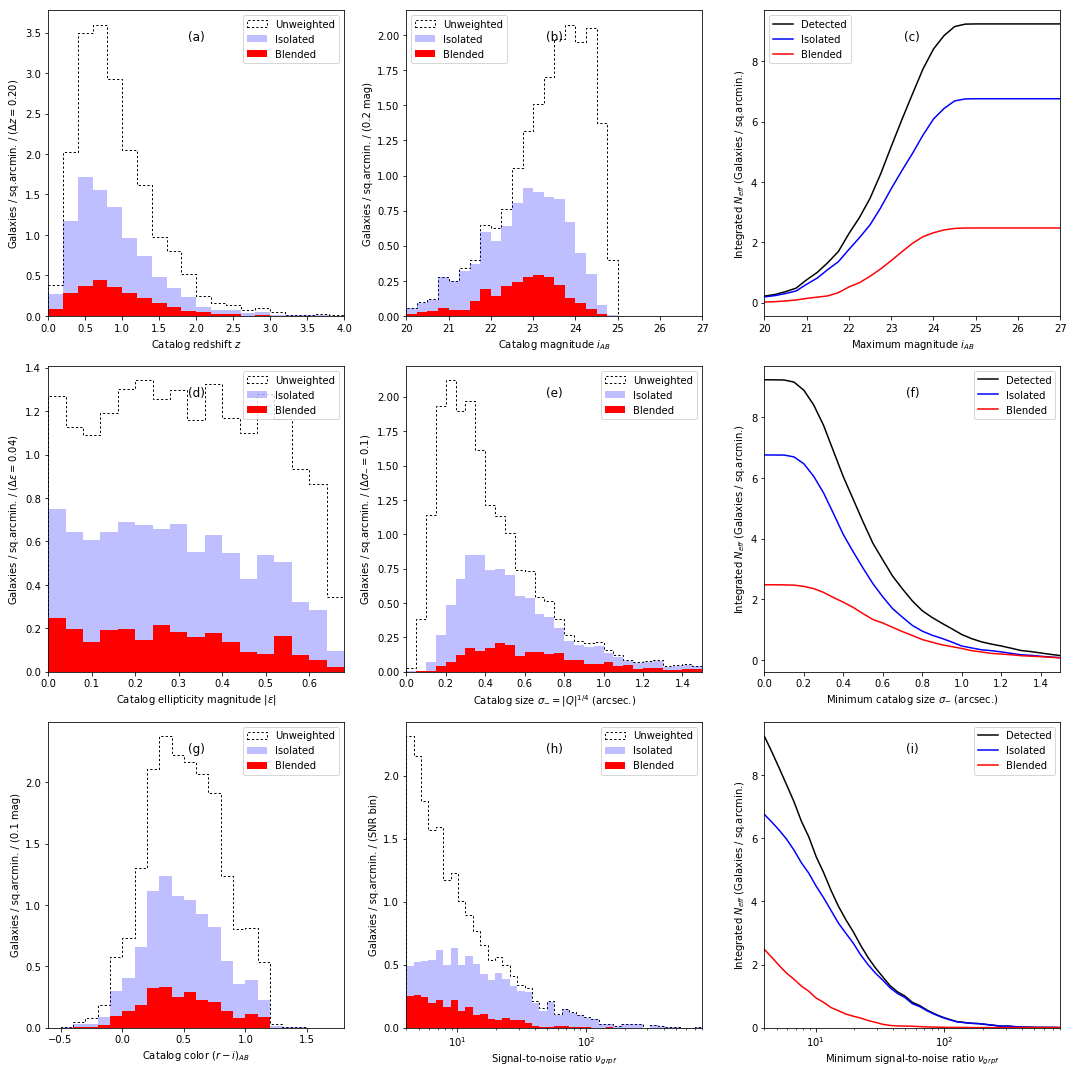

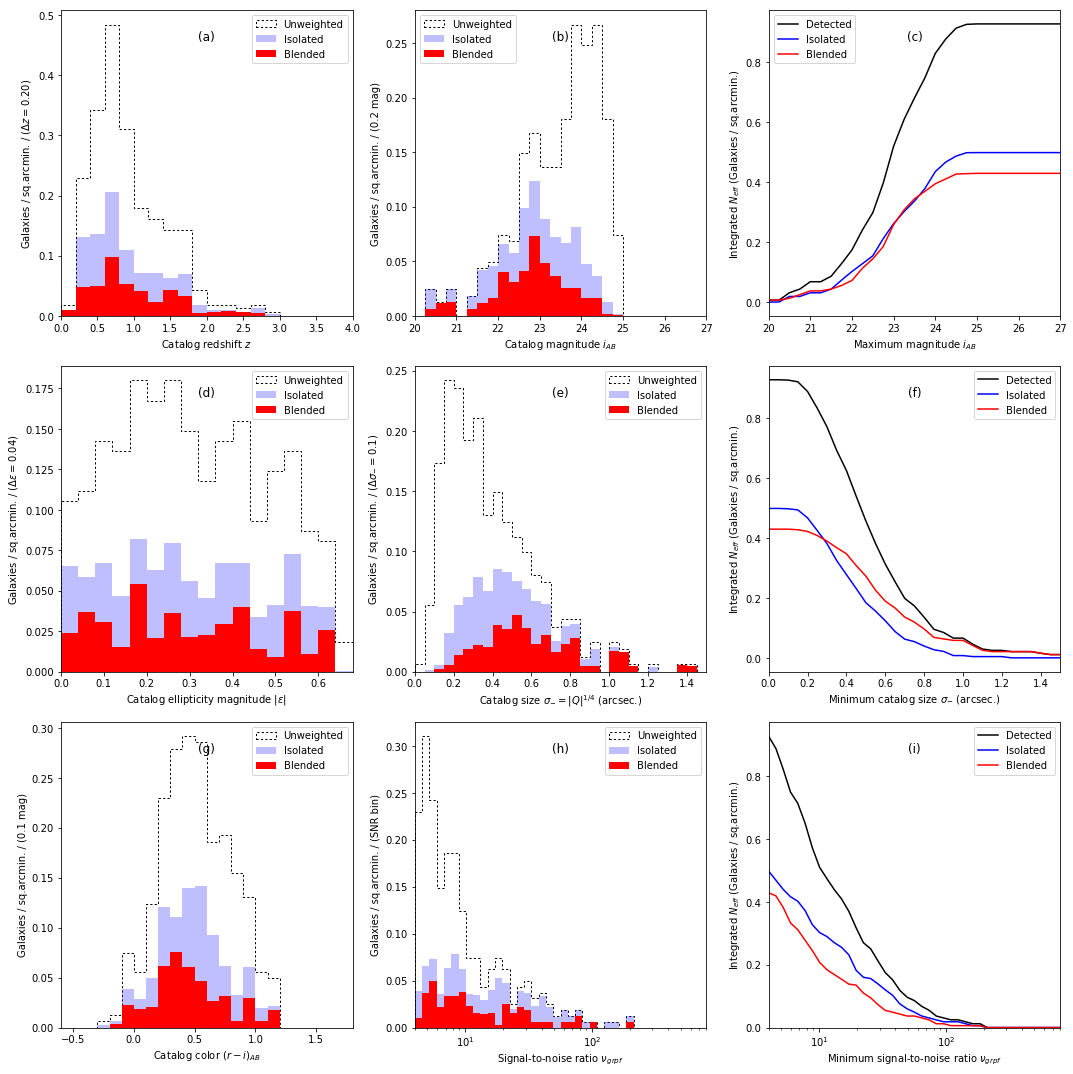

In [52]:
shear_plot(DES_i_low,save='DES_i_low',detection_cut=4.)
shear_plot(DES_i_medium,save='DES_i_medium',detection_cut=4.)
shear_plot(DES_i_high,save='DES_i_high',detection_cut=4.)

Simulated area = 186.434 sq.arcmins.
Dropped 530 sources with snr_iso = 0 (max. snr_sky = 27556.893)
Stellar sources simulated 457
Number of galaxies 44927
Visible sample fractions: undetected 91.04%, blended 2.40%, isolated 6.56%
Detected sample fractions: blended 26.75%, isolated 73.25%
Detected intrinsic shape-noise RMS = 0.255
  detected sample is 100.0% of detected with neff/area = 10.557, RMS e = 0.2548, <z> = 0.953
  isolated sample is  73.2% of detected with neff/area =  7.515, RMS e = 0.2594, <z> = 0.925
   blended sample is  26.8% of detected with neff/area =  3.042, RMS e = 0.2418, <z> = 1.023
Pessimistic neff (Chang fitting formula):  6.26478302253
Fiducial neff (Chang fitting formula):  10.43578974
Optimistic neff (Chang fitting formula):  14.0364771539
Ratio of errors Chang/Fisher:  0.930912
Pessimistic neff:  5.12964312551  Number of sources  1031
Fiducial neff:  8.72462361423  Number of sources  2057
Optimistic neff:  11.607160362  Number of sources  3685
Simulated area

/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: divide by zero encountered in divide


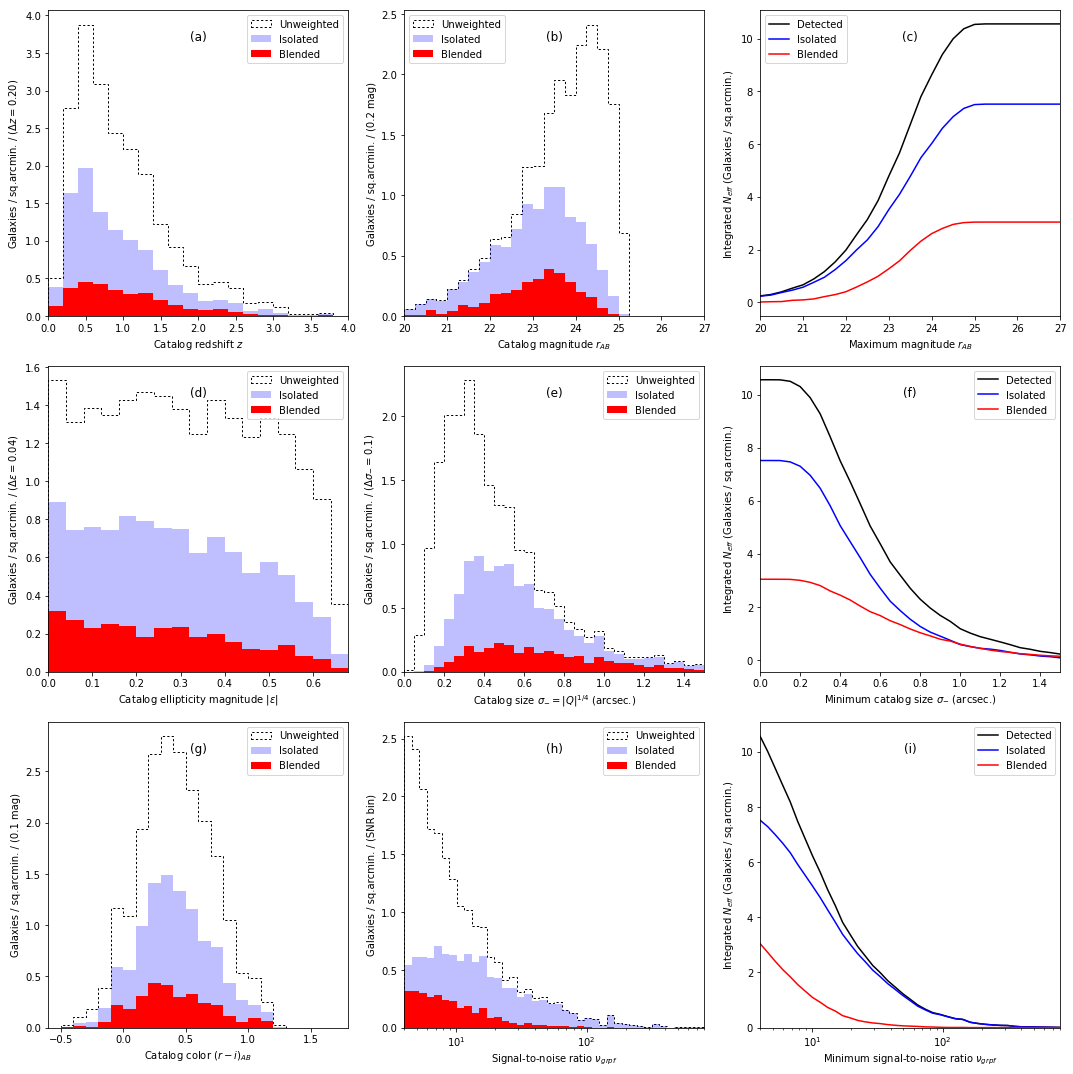

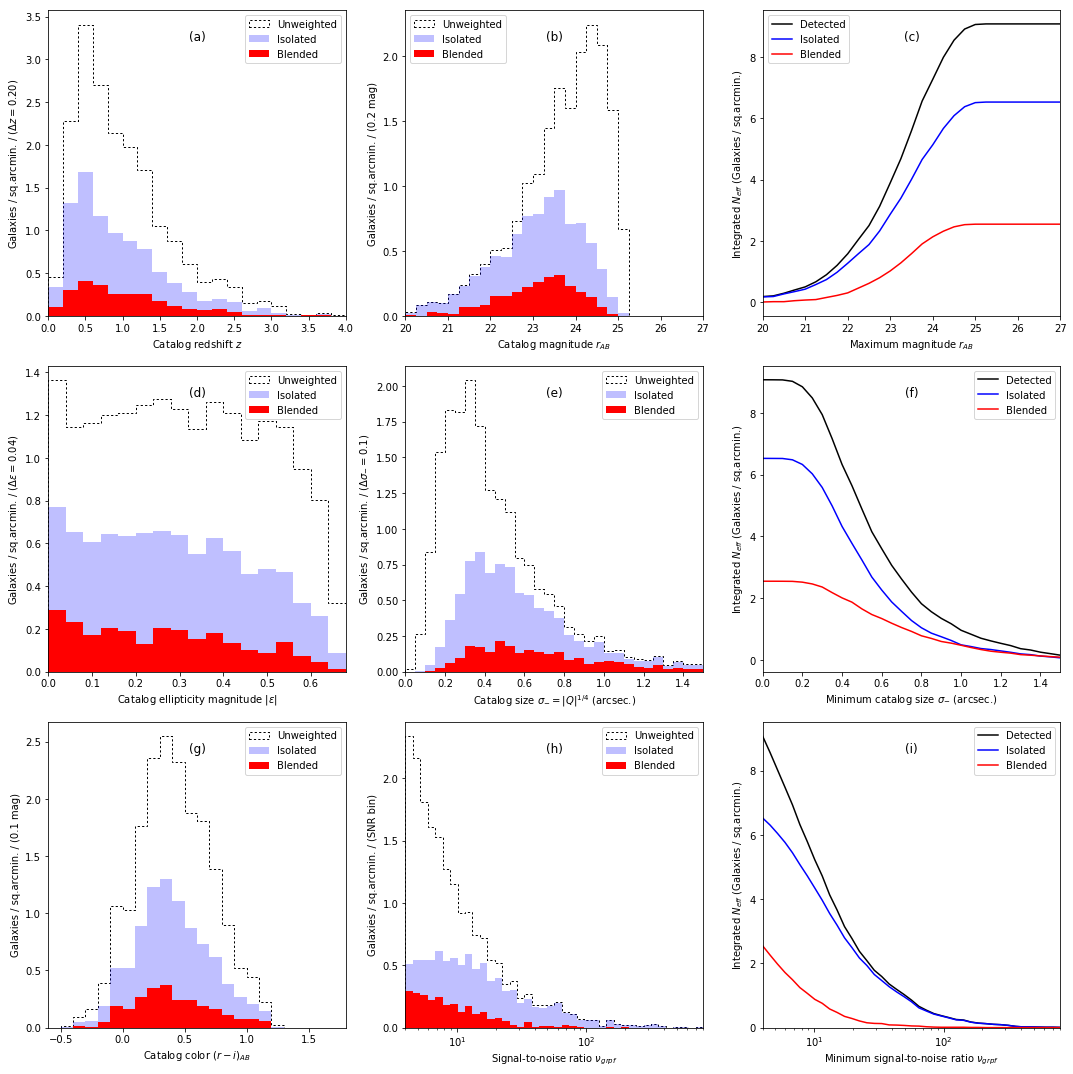

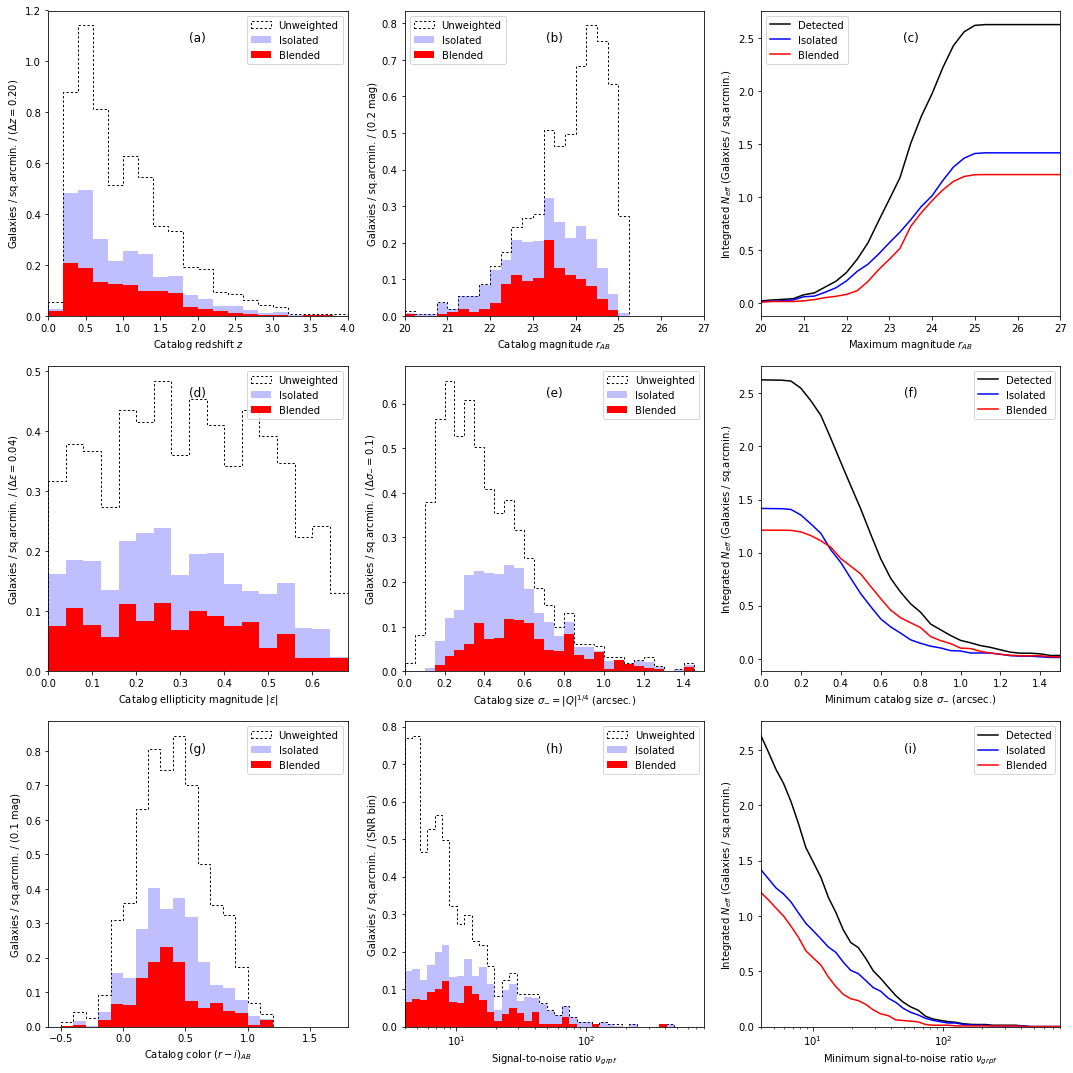

In [53]:
shear_plot(DES_r_low,save='DES_r_low',detection_cut=4.)
shear_plot(DES_r_medium,save='DES_r_medium',detection_cut=4.)
shear_plot(DES_r_high,save='DES_r_high',detection_cut=4.)

Simulated area = 67.342 sq.arcmins.
Dropped 165 sources with snr_iso = 0 (max. snr_sky = 208839.656)
Stellar sources simulated 160
Number of galaxies 16426
Visible sample fractions: undetected 76.26%, blended 6.21%, isolated 17.54%
Detected sample fractions: blended 26.14%, isolated 73.86%
Detected intrinsic shape-noise RMS = 0.249
  detected sample is 100.0% of detected with neff/area = 34.909, RMS e = 0.2490, <z> = 1.019
  isolated sample is  73.9% of detected with neff/area = 25.286, RMS e = 0.2543, <z> = 1.006
   blended sample is  26.1% of detected with neff/area =  9.623, RMS e = 0.2330, <z> = 1.052
Pessimistic neff (Chang fitting formula):  19.3745009021
Fiducial neff (Chang fitting formula):  30.3948582488
Optimistic neff (Chang fitting formula):  38.6896360324
Ratio of errors Chang/Fisher:  1.12109
Pessimistic neff:  20.9174272814  Number of sources  1509
Fiducial neff:  31.9095138319  Number of sources  2648
Optimistic neff:  39.9552272781  Number of sources  4303
Simulated a

/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: divide by zero encountered in divide
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: overflow encountered in multiply



Dropped 400 sources with snr_iso = 0 (max. snr_sky = 390097.344)
Stellar sources simulated 396
Number of galaxies 16426
Visible sample fractions: undetected 77.73%, blended 5.91%, isolated 16.36%
Detected sample fractions: blended 26.52%, isolated 73.48%
Detected intrinsic shape-noise RMS = 0.248
  detected sample is 100.0% of detected with neff/area = 32.463, RMS e = 0.2484, <z> = 1.031
  isolated sample is  73.5% of detected with neff/area = 23.220, RMS e = 0.2539, <z> = 1.012
   blended sample is  26.5% of detected with neff/area =  9.242, RMS e = 0.2321, <z> = 1.079
Pessimistic neff (Chang fitting formula):  19.3089447758
Fiducial neff (Chang fitting formula):  30.3187576738
Optimistic neff (Chang fitting formula):  38.624603775
Ratio of errors Chang/Fisher:  1.12243
Pessimistic neff:  18.9739459913  Number of sources  1370
Fiducial neff:  29.4173604835  Number of sources  2451
Optimistic neff:  37.0294572689  Number of sources  4017
Simulated area = 67.342 sq.arcmins.
Dropped 435

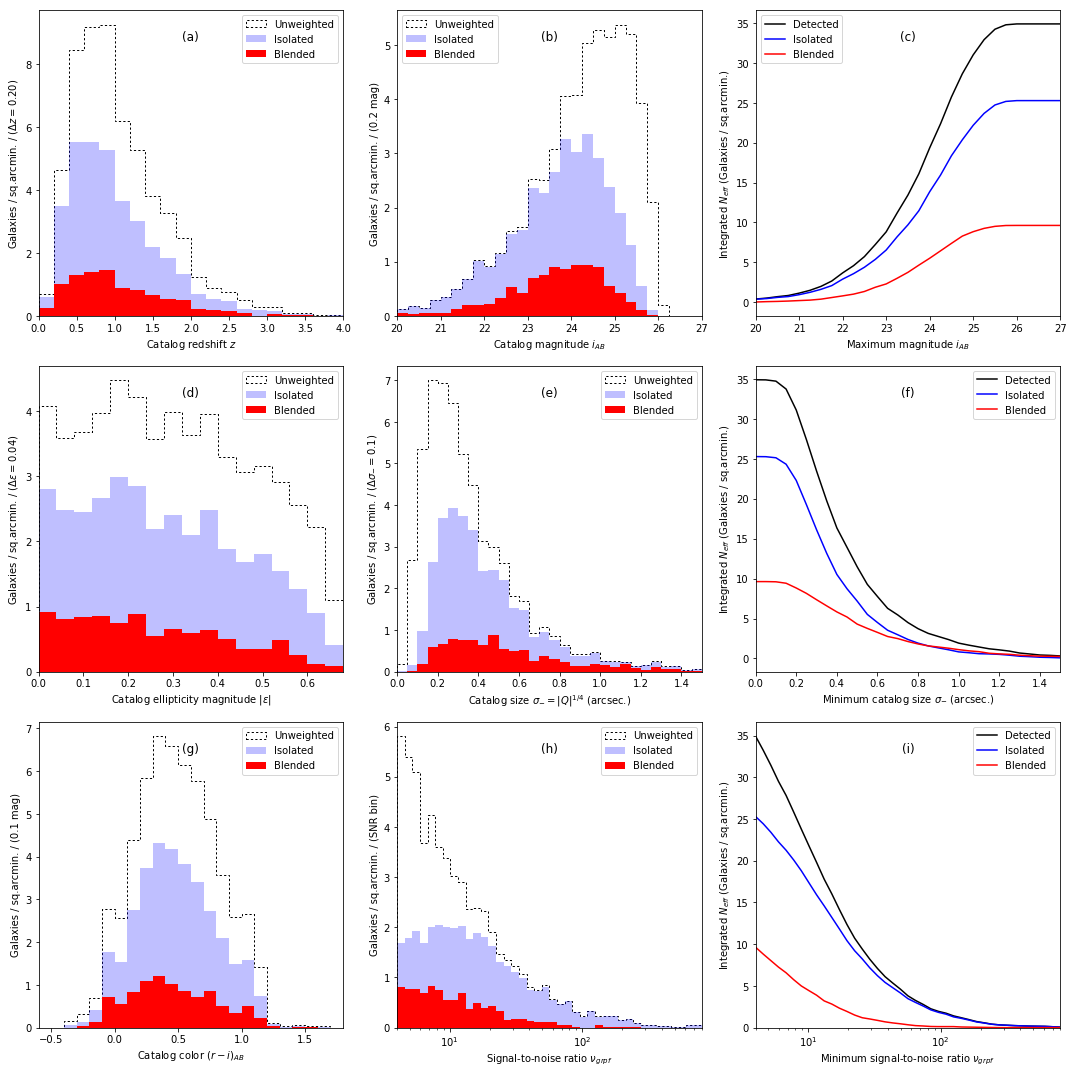

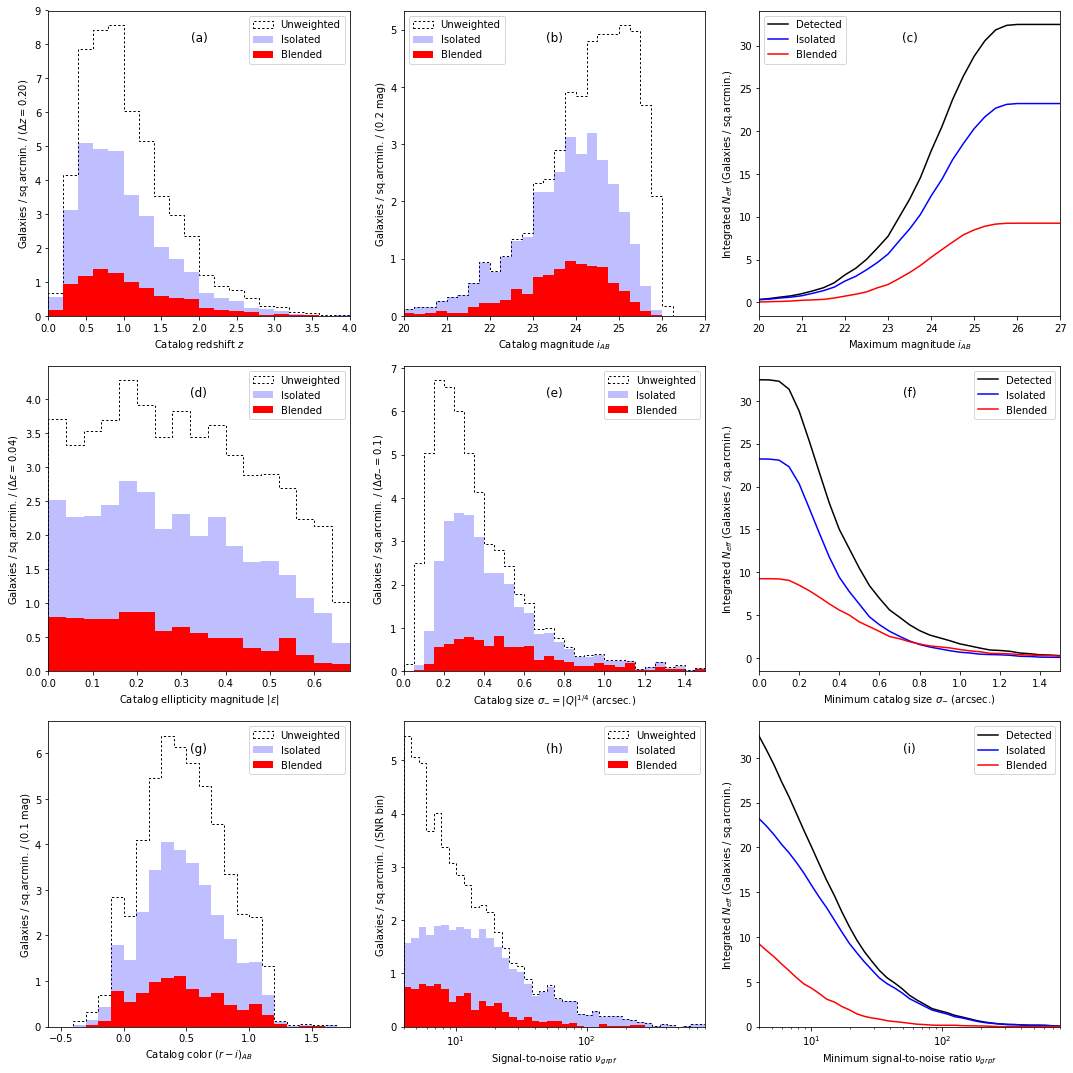

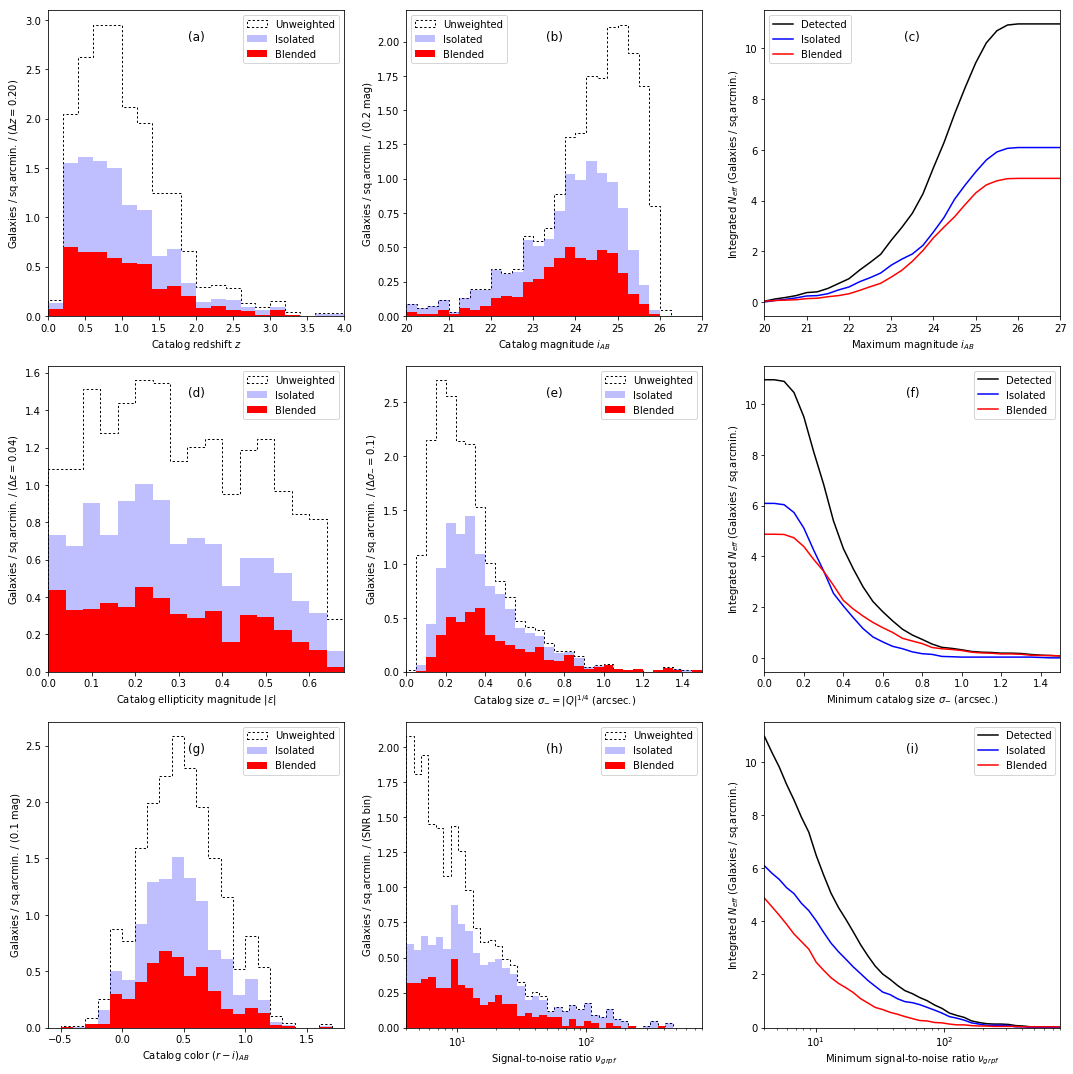

In [54]:
shear_plot(HSC_i_low,save='HSC_i_low',detection_cut=4.)
shear_plot(HSC_i_medium,save='HSC_i_medium',detection_cut=4.)
shear_plot(HSC_i_high,save='HSC_i_high',detection_cut=4.)

Simulated area = 67.342 sq.arcmins.
Dropped 176 sources with snr_iso = 0 (max. snr_sky = 33643.137)
Stellar sources simulated 159
Number of galaxies 16418
Visible sample fractions: undetected 81.28%, blended 4.77%, isolated 13.95%
Detected sample fractions: blended 25.48%, isolated 74.52%
Detected intrinsic shape-noise RMS = 0.251
  detected sample is 100.0% of detected with neff/area = 26.006, RMS e = 0.2508, <z> = 1.080
  isolated sample is  74.5% of detected with neff/area = 18.802, RMS e = 0.2568, <z> = 1.072
   blended sample is  25.5% of detected with neff/area =  7.204, RMS e = 0.2320, <z> = 1.100
Pessimistic neff (Chang fitting formula):  13.4370318746
Fiducial neff (Chang fitting formula):  22.1701483903
Optimistic neff (Chang fitting formula):  29.09870496
Ratio of errors Chang/Fisher:  1.07763
Pessimistic neff:  14.6575504511  Number of sources  1065
Fiducial neff:  23.0735268566  Number of sources  1939
Optimistic neff:  29.5447820885  Number of sources  3246
Simulated area

/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: divide by zero encountered in divide


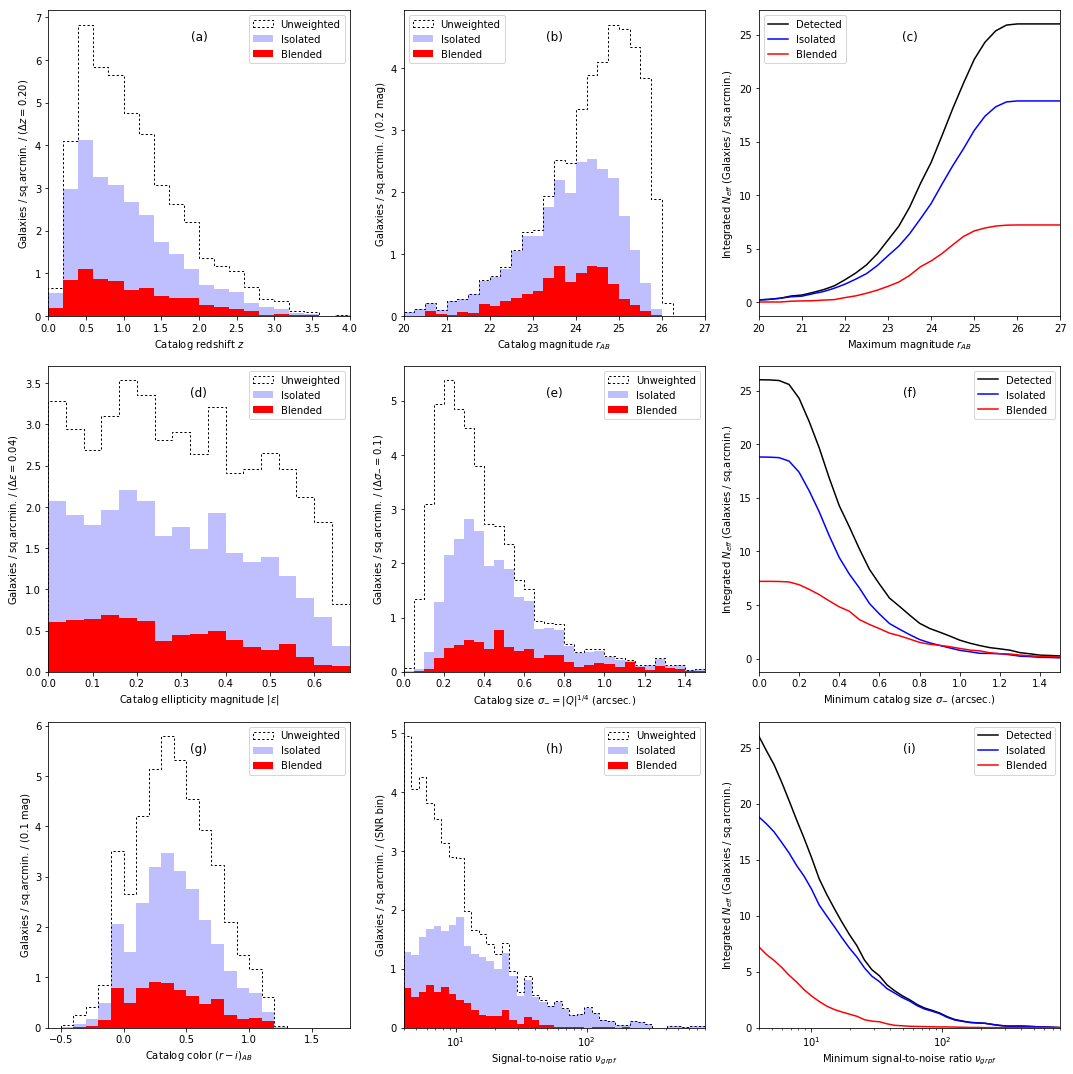

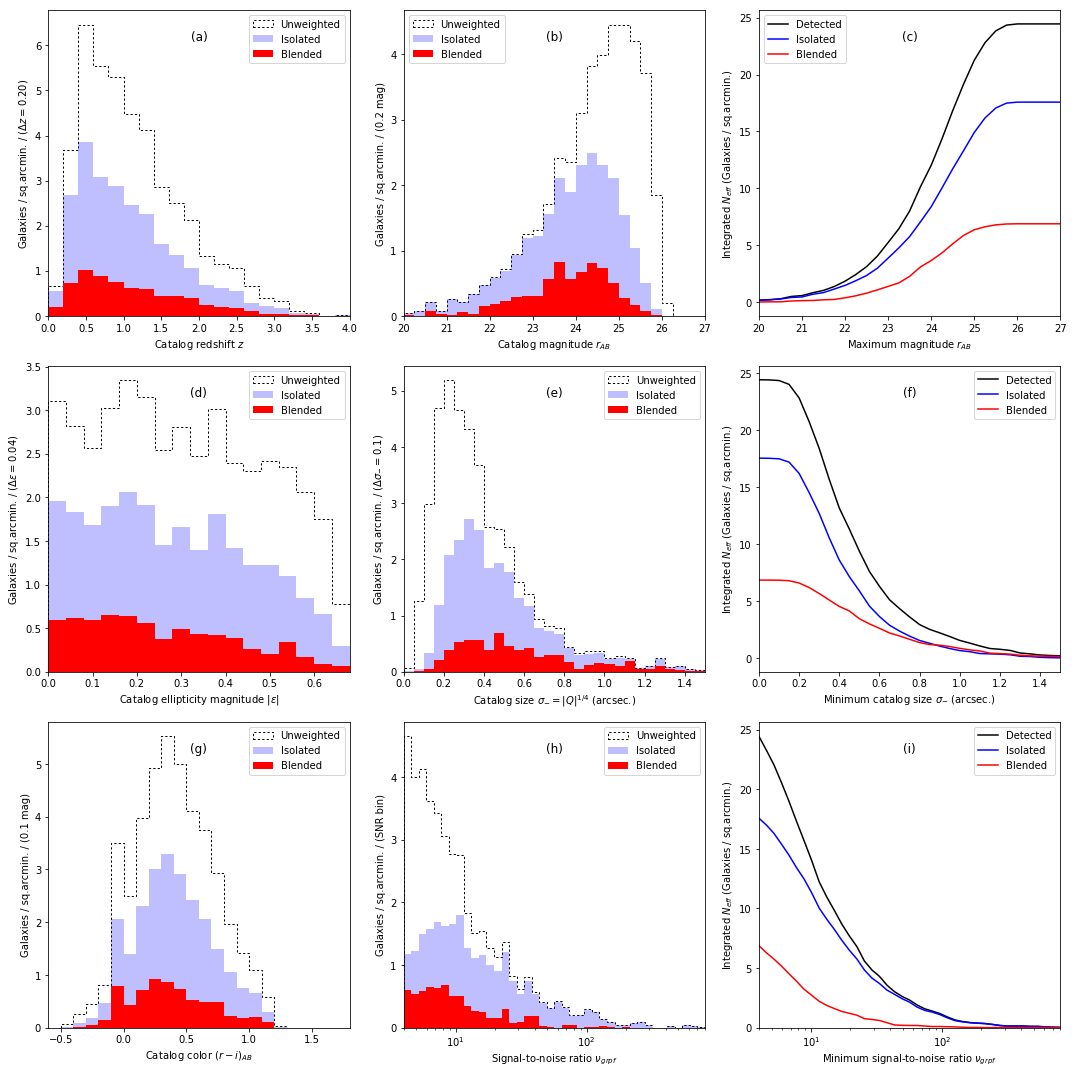

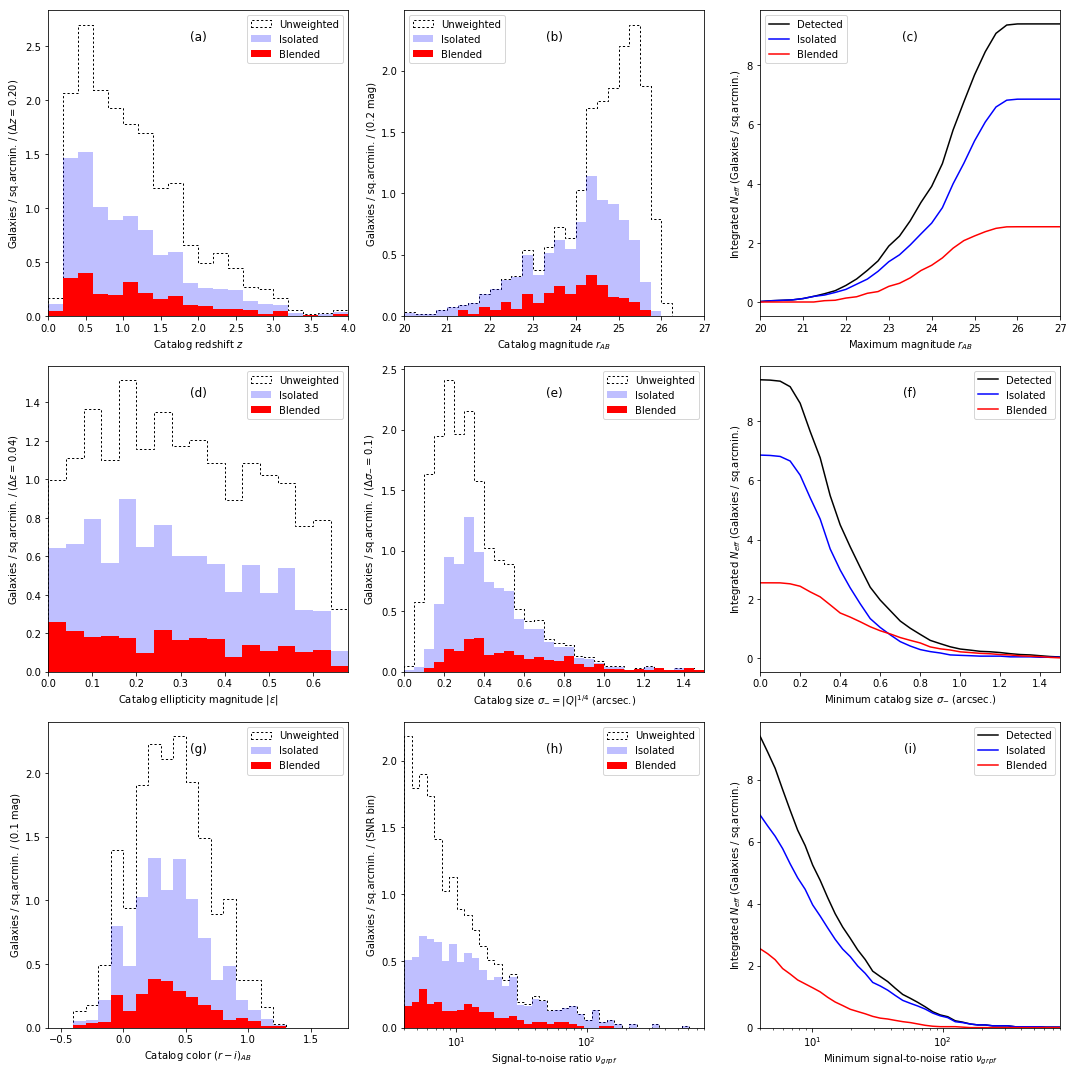

In [55]:
shear_plot(HSC_r_low,save='HSC_r_low',detection_cut=4.)
shear_plot(HSC_r_medium,save='HSC_r_medium',detection_cut=4.)
shear_plot(HSC_r_high,save='HSC_r_high',detection_cut=4.)

Simulated area = 186.414 sq.arcmins.
Dropped 491 sources with snr_iso = 0 (max. snr_sky = 461977.969)
Stellar sources simulated 485
Number of galaxies 45289
Visible sample fractions: undetected 74.61%, blended 9.46%, isolated 15.93%
Detected sample fractions: blended 37.27%, isolated 62.73%
Detected intrinsic shape-noise RMS = 0.243
  detected sample is 100.0% of detected with neff/area = 35.597, RMS e = 0.2426, <z> = 1.074
  isolated sample is  62.7% of detected with neff/area = 22.211, RMS e = 0.2464, <z> = 1.039
   blended sample is  37.3% of detected with neff/area = 13.386, RMS e = 0.2362, <z> = 1.133
Pessimistic neff (Chang fitting formula):  26.2458762154
Fiducial neff (Chang fitting formula):  39.4495530054
Optimistic neff (Chang fitting formula):  49.5797011536
Ratio of errors Chang/Fisher:  0.998742
Pessimistic neff:  22.1398411668  Number of sources  4413
Fiducial neff:  32.7347475104  Number of sources  7443
Optimistic neff:  40.6498153461  Number of sources  11925
Simulate

/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: divide by zero encountered in divide


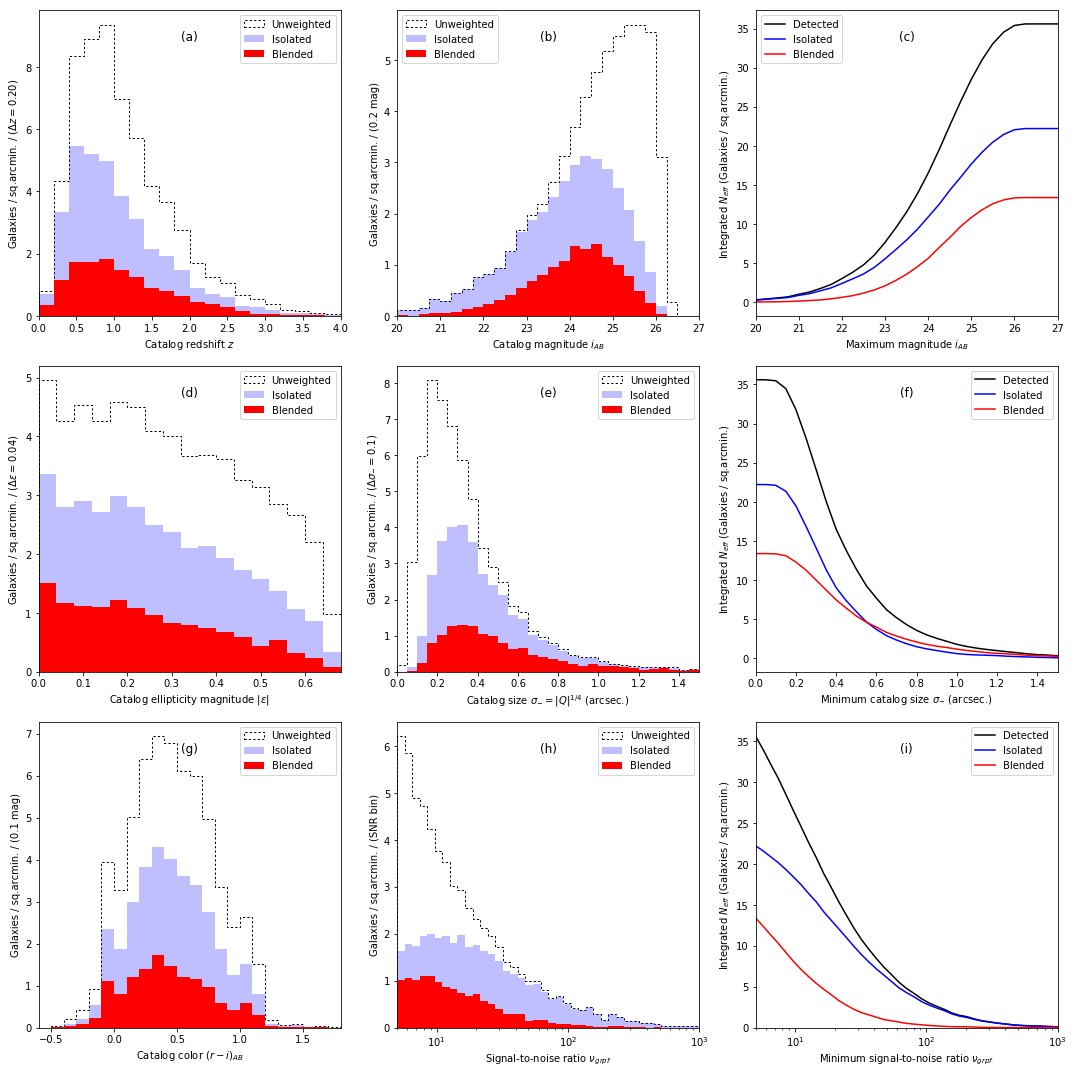

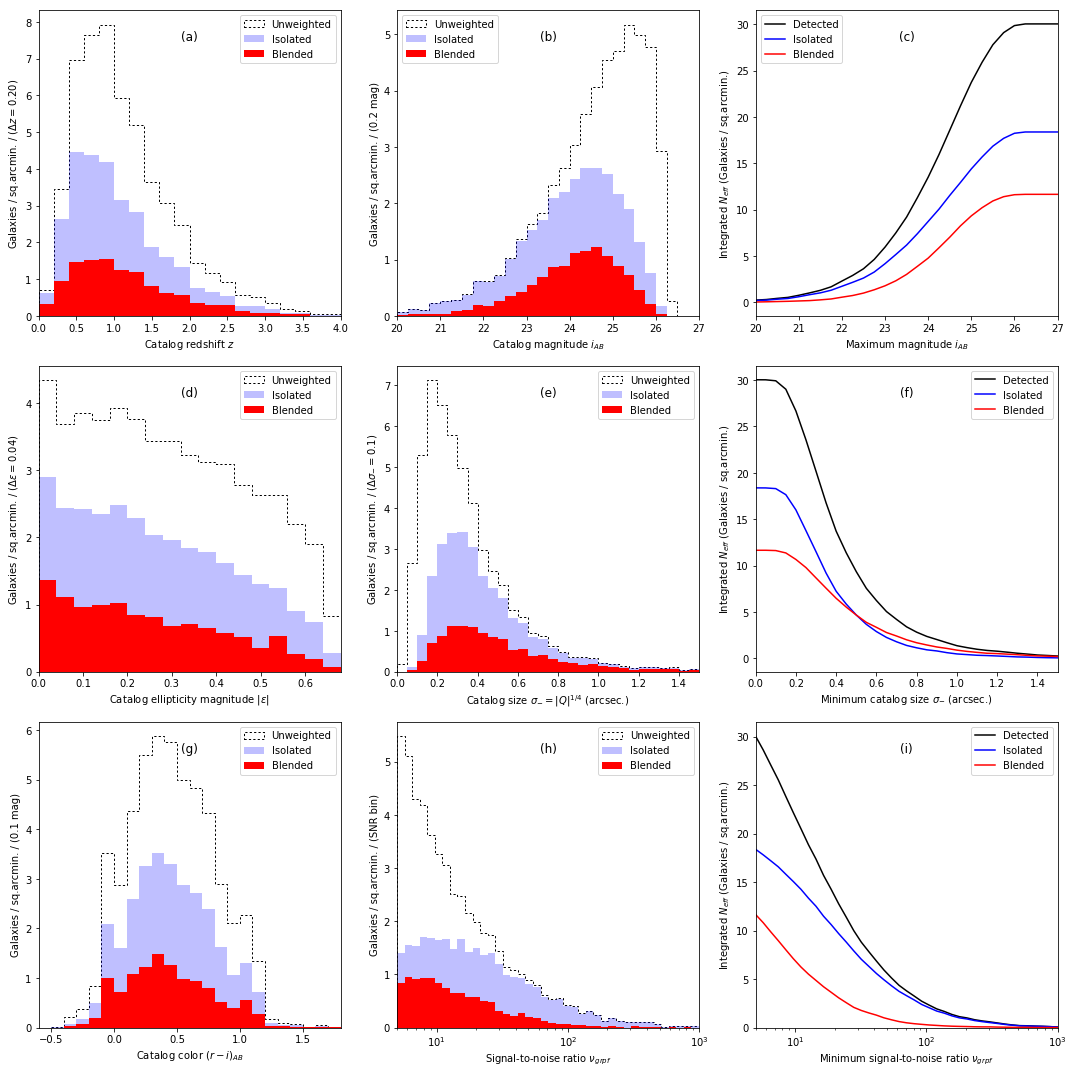

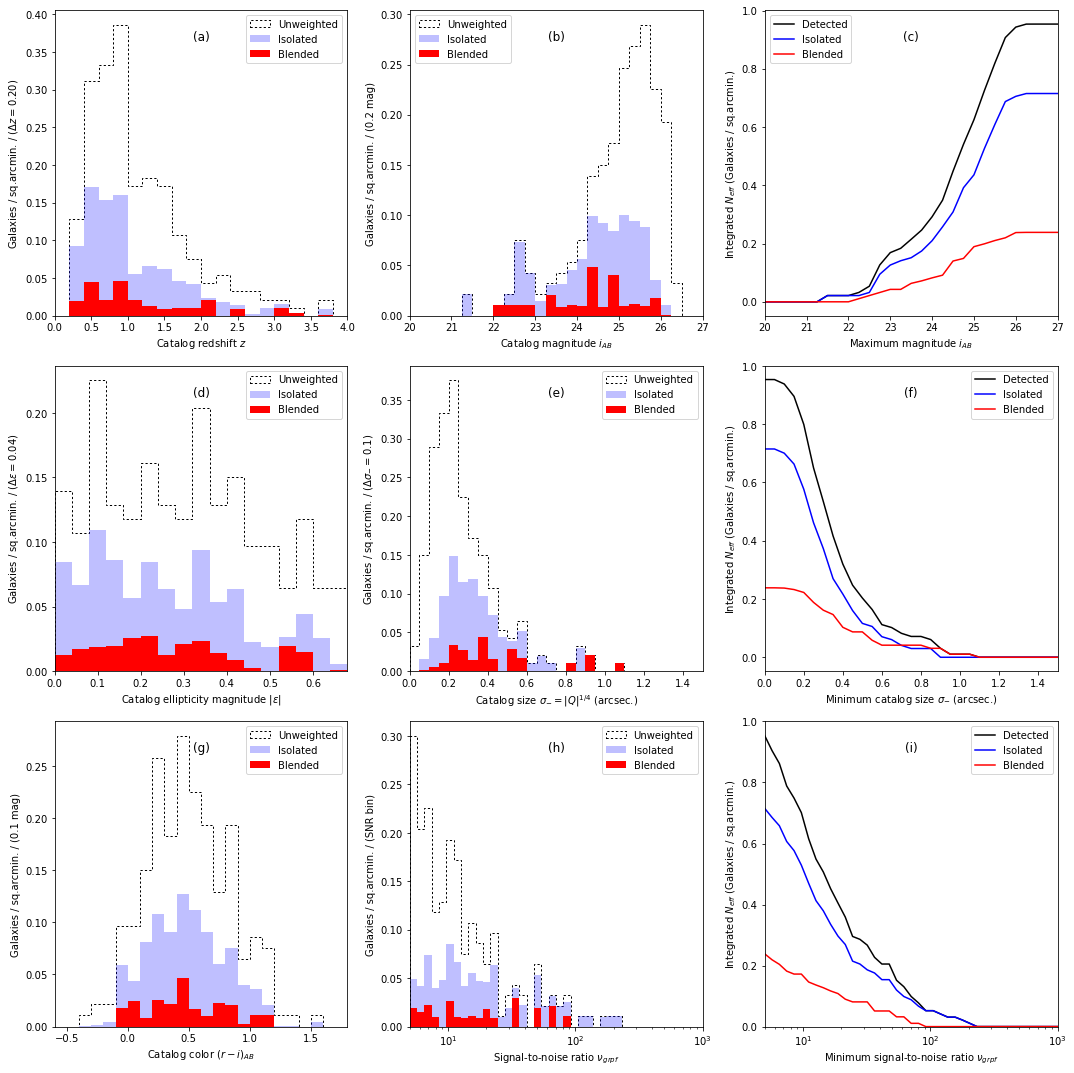

In [56]:
shear_plot(LSST_i_low,save='LSST_i_low',detection_cut=5.)
shear_plot(LSST_i_medium,save='LSST_i_medium',detection_cut=5.)
shear_plot(LSST_i_high,save='LSST_i_high',detection_cut=5.)

Simulated area = 186.414 sq.arcmins.
Dropped 496 sources with snr_iso = 0 (max. snr_sky = 143690.078)
Stellar sources simulated 483
Number of galaxies 45315
Visible sample fractions: undetected 74.49%, blended 9.39%, isolated 16.13%
Detected sample fractions: blended 36.79%, isolated 63.21%
Detected intrinsic shape-noise RMS = 0.242
  detected sample is 100.0% of detected with neff/area = 34.702, RMS e = 0.2419, <z> = 1.198
  isolated sample is  63.2% of detected with neff/area = 21.593, RMS e = 0.2458, <z> = 1.167
   blended sample is  36.8% of detected with neff/area = 13.110, RMS e = 0.2351, <z> = 1.250
Pessimistic neff (Chang fitting formula):  27.9357569525
Fiducial neff (Chang fitting formula):  42.1920488589
Optimistic neff (Chang fitting formula):  53.4648599569
Ratio of errors Chang/Fisher:  0.958135
Pessimistic neff:  21.207438258  Number of sources  4230
Fiducial neff:  31.7476107739  Number of sources  7242
Optimistic neff:  39.7106178571  Number of sources  11744
Simulated

/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: divide by zero encountered in divide


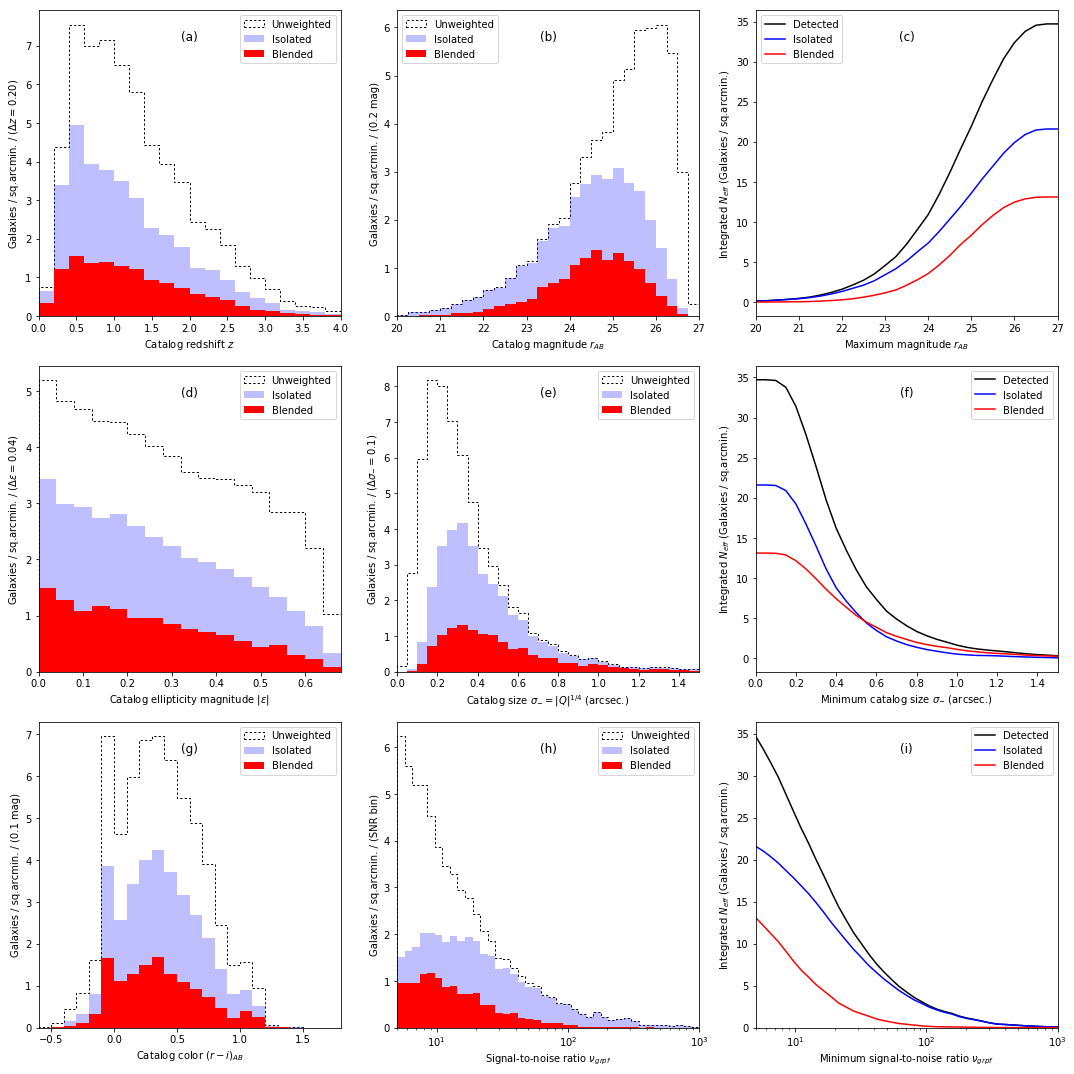

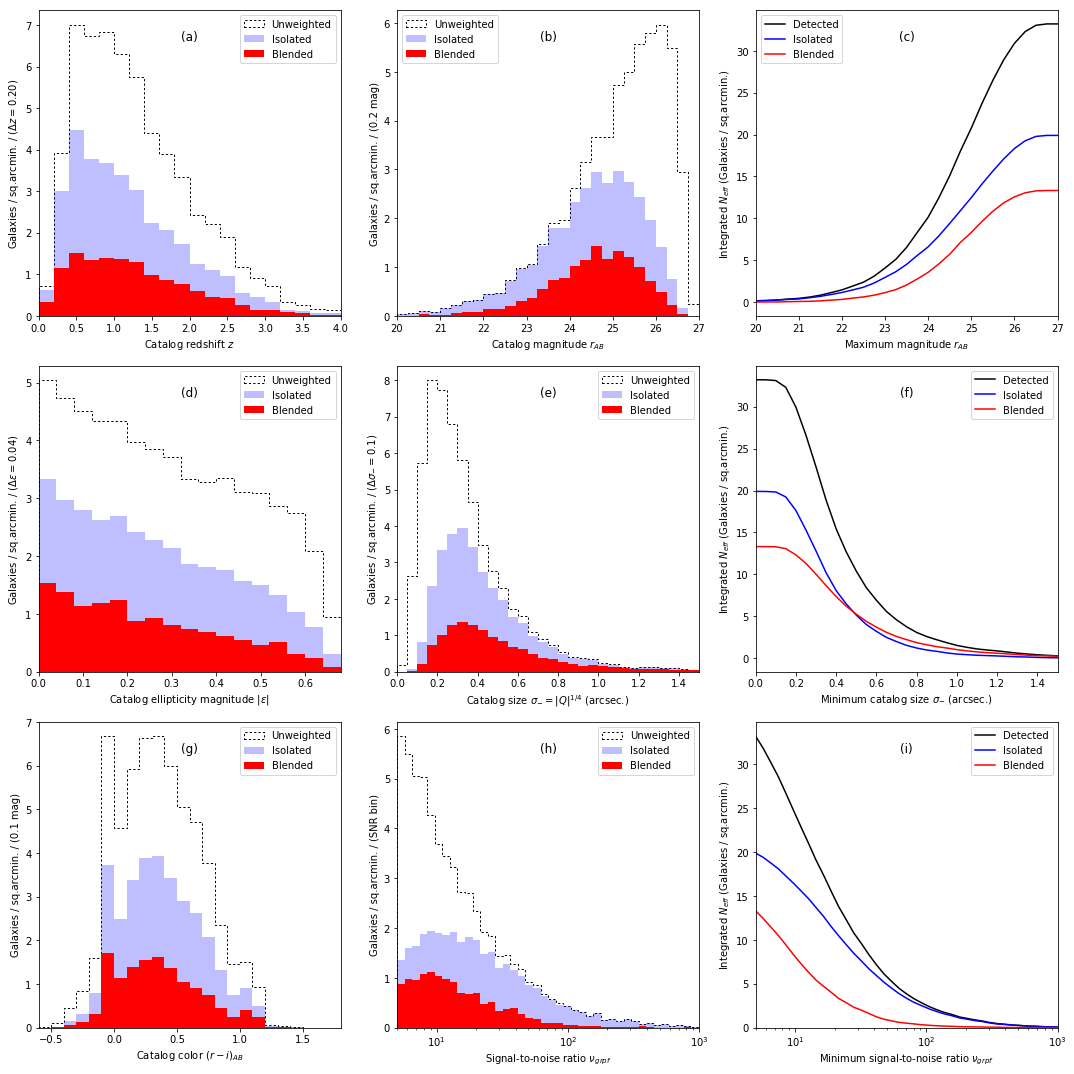

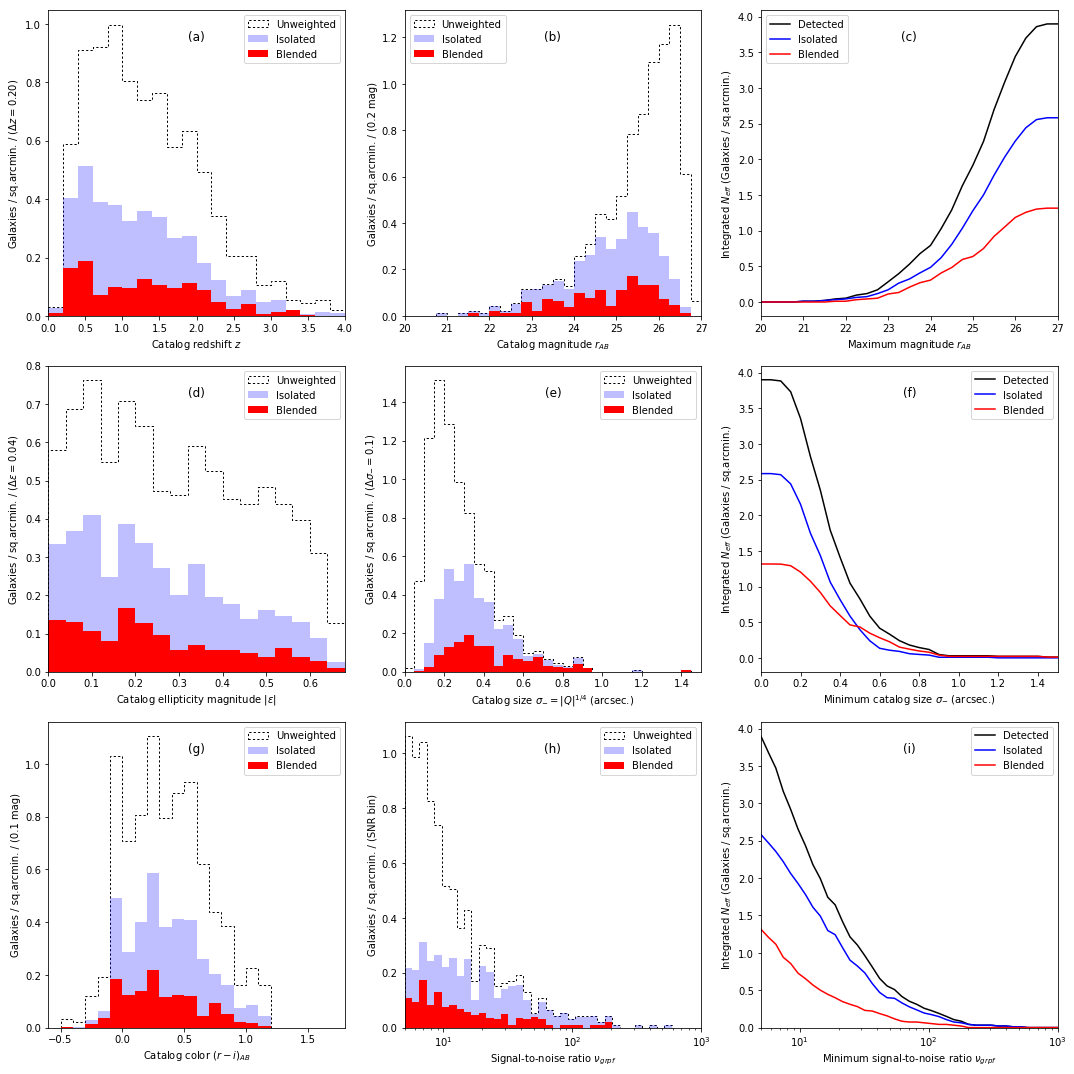

In [63]:
shear_plot(LSST_r_low,save='LSST_r_low',detection_cut=5.)
shear_plot(LSST_r_medium,save='LSST_r_medium',detection_cut=5.)
shear_plot(LSST_r_high,save='LSST_r_high',detection_cut=5.)

Simulated area = 186.414 sq.arcmins.
Dropped 1783 sources with snr_iso = 0 (max. snr_sky = 150115.938)
Stellar sources simulated 1770
Number of galaxies 45315
Visible sample fractions: undetected 77.85%, blended 8.71%, isolated 13.44%
Detected sample fractions: blended 39.31%, isolated 60.69%
Detected intrinsic shape-noise RMS = 0.242
  detected sample is 100.0% of detected with neff/area = 29.520, RMS e = 0.2422, <z> = 1.213
  isolated sample is  60.7% of detected with neff/area = 17.669, RMS e = 0.2467, <z> = 1.178
   blended sample is  39.3% of detected with neff/area = 11.851, RMS e = 0.2350, <z> = 1.265
Pessimistic neff (Chang fitting formula):  27.9691326432
Fiducial neff (Chang fitting formula):  42.2285991954
Optimistic neff (Chang fitting formula):  53.5017403308
Ratio of errors Chang/Fisher:  0.965766
Pessimistic neff:  17.731821863  Number of sources  3541
Fiducial neff:  26.5613553347  Number of sources  6063
Optimistic neff:  33.5158884991  Number of sources  9993


/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: divide by zero encountered in divide


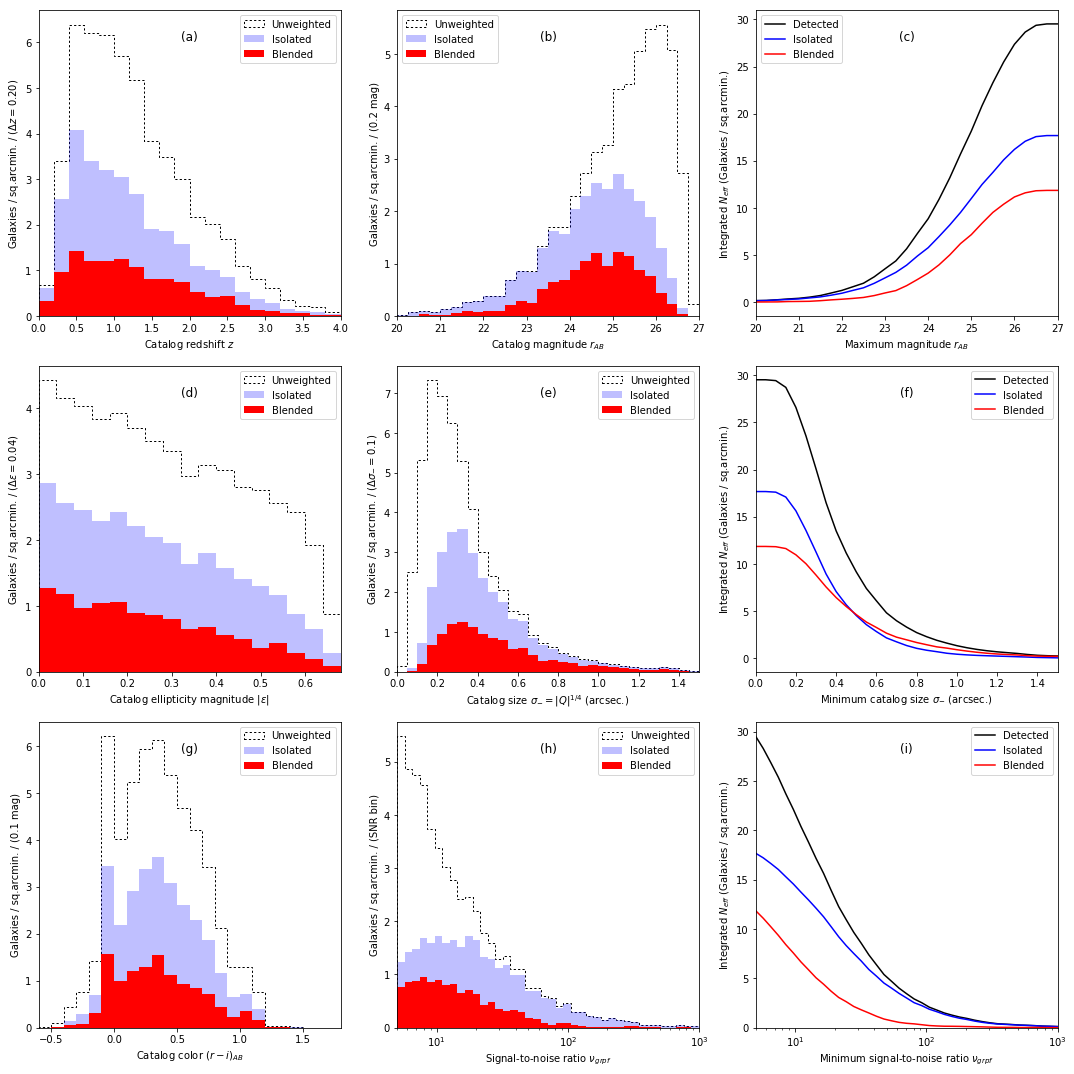

In [66]:
shear_plot(LSST_r_10,detection_cut=5)

Simulated area = 186.414 sq.arcmins.
Dropped 3731 sources with snr_iso = 0 (max. snr_sky = 148959.016)
Stellar sources simulated 3718
Number of galaxies 45315
Visible sample fractions: undetected 81.04%, blended 8.30%, isolated 10.67%
Detected sample fractions: blended 43.75%, isolated 56.25%
Detected intrinsic shape-noise RMS = 0.241
  detected sample is 100.0% of detected with neff/area = 24.759, RMS e = 0.2409, <z> = 1.226
  isolated sample is  56.3% of detected with neff/area = 13.694, RMS e = 0.2465, <z> = 1.195
   blended sample is  43.7% of detected with neff/area = 11.065, RMS e = 0.2334, <z> = 1.264
Pessimistic neff (Chang fitting formula):  27.8258230537
Fiducial neff (Chang fitting formula):  42.0349772321
Optimistic neff (Chang fitting formula):  53.286011098
Ratio of errors Chang/Fisher:  0.968349
Pessimistic neff:  14.5142606925  Number of sources  2905
Fiducial neff:  22.0056652324  Number of sources  5041
Optimistic neff:  27.8039174736  Number of sources  8349


/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: divide by zero encountered in divide


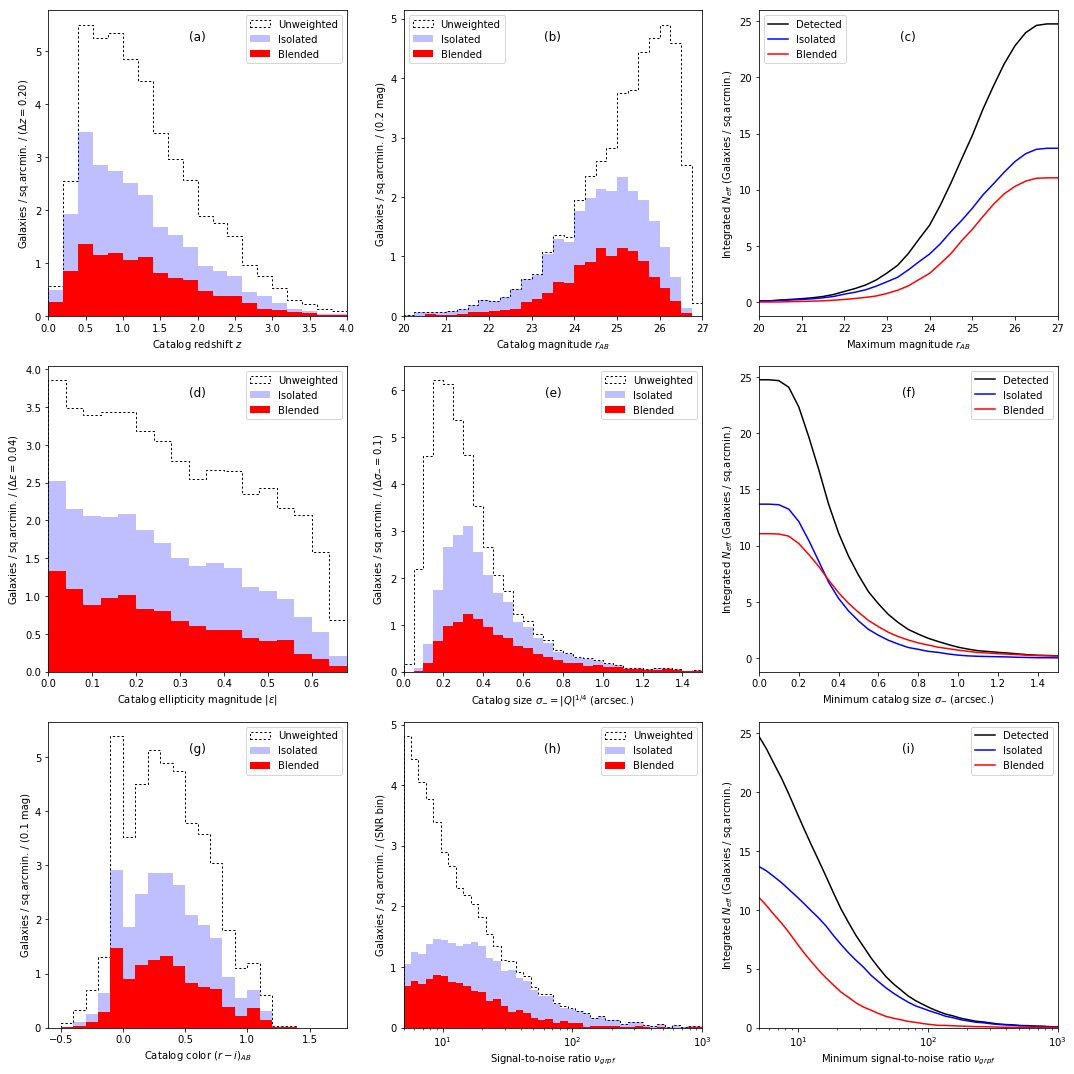

In [67]:
shear_plot(LSST_r_20,detection_cut=5)

Simulated area = 186.414 sq.arcmins.
Dropped 5369 sources with snr_iso = 0 (max. snr_sky = 143227.625)
Stellar sources simulated 5357
Number of galaxies 45315
Visible sample fractions: undetected 83.76%, blended 7.54%, isolated 8.70%
Detected sample fractions: blended 46.41%, isolated 53.59%
Detected intrinsic shape-noise RMS = 0.243
  detected sample is 100.0% of detected with neff/area = 20.956, RMS e = 0.2434, <z> = 1.237
  isolated sample is  53.6% of detected with neff/area = 11.078, RMS e = 0.2485, <z> = 1.186
   blended sample is  46.4% of detected with neff/area =  9.878, RMS e = 0.2374, <z> = 1.295
Pessimistic neff (Chang fitting formula):  28.1078269472
Fiducial neff (Chang fitting formula):  42.3967270763
Optimistic neff (Chang fitting formula):  53.7068140693
Ratio of errors Chang/Fisher:  0.968248
Pessimistic neff:  12.1068183216  Number of sources  2419
Fiducial neff:  18.4509590326  Number of sources  4235
Optimistic neff:  23.70010101  Number of sources  7203


/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: divide by zero encountered in divide


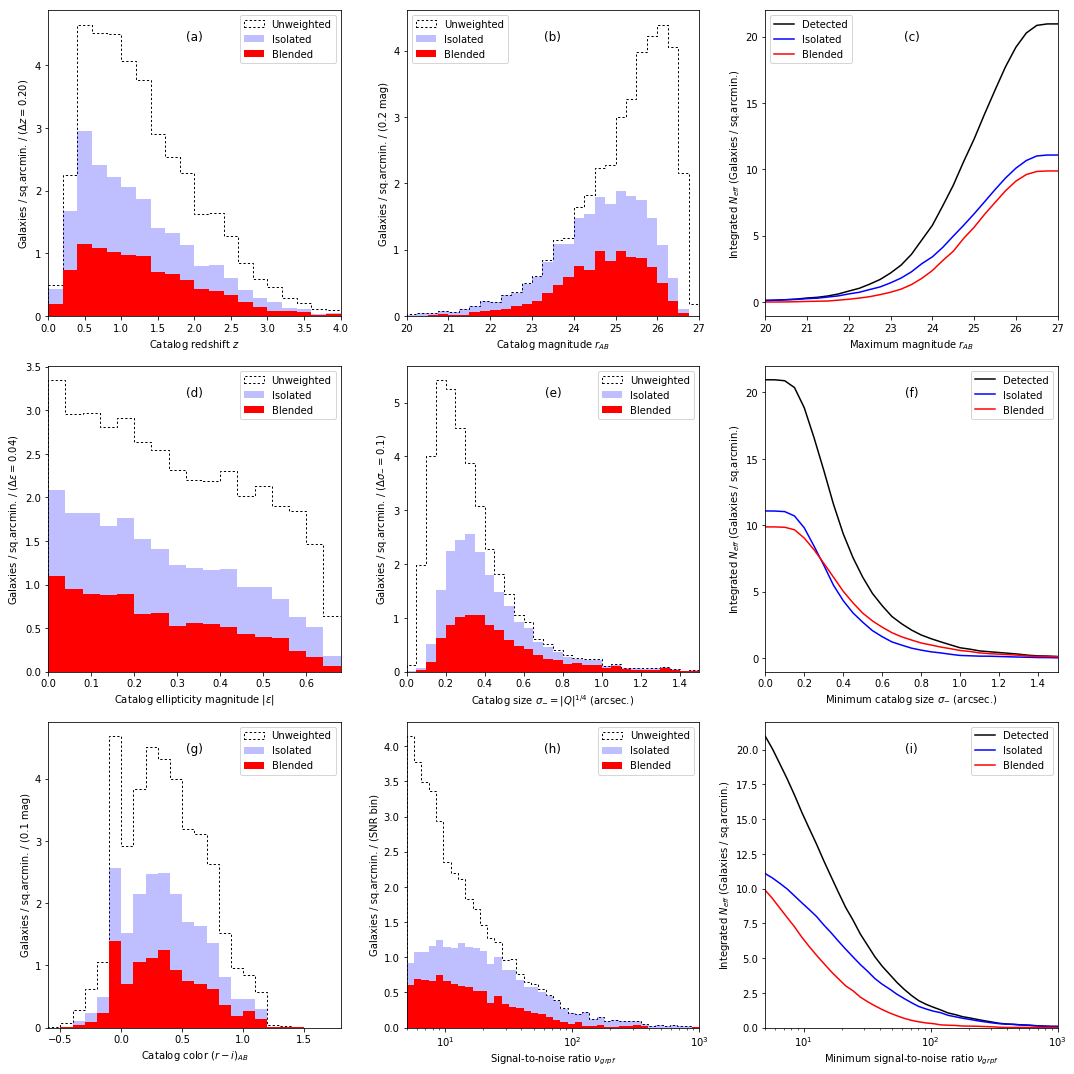

In [68]:
shear_plot(LSST_r_30,detection_cut=5)

Simulated area = 186.414 sq.arcmins.
Dropped 1787 sources with snr_iso = 0 (max. snr_sky = 612606.000)
Stellar sources simulated 1779
Number of galaxies 45289
Visible sample fractions: undetected 86.14%, blended 4.03%, isolated 9.83%
Detected sample fractions: blended 29.09%, isolated 70.91%
Detected intrinsic shape-noise RMS = 0.243
  detected sample is 100.0% of detected with neff/area = 18.298, RMS e = 0.2432, <z> = 1.107
  isolated sample is  70.9% of detected with neff/area = 12.665, RMS e = 0.2471, <z> = 1.084
   blended sample is  29.1% of detected with neff/area =  5.633, RMS e = 0.2336, <z> = 1.158
Pessimistic neff (Chang fitting formula):  26.2924481649
Fiducial neff (Chang fitting formula):  39.5276173367
Optimistic neff (Chang fitting formula):  49.6772141196
Ratio of errors Chang/Fisher:  0.985002
Pessimistic neff:  10.5431651173  Number of sources  2115
Fiducial neff:  16.419608728  Number of sources  3799
Optimistic neff:  21.0362981306  Number of sources  6415
Simulated

/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: divide by zero encountered in divide


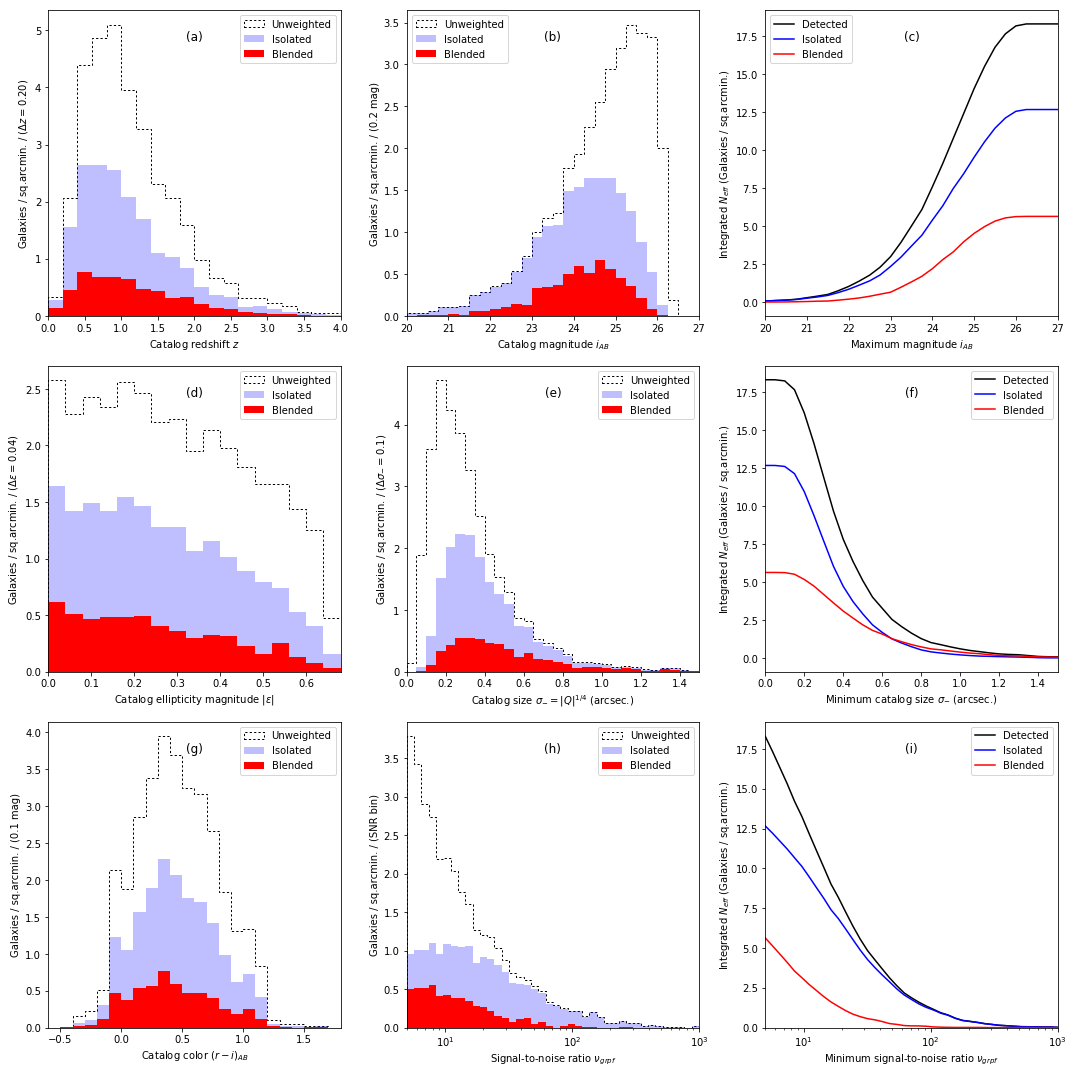

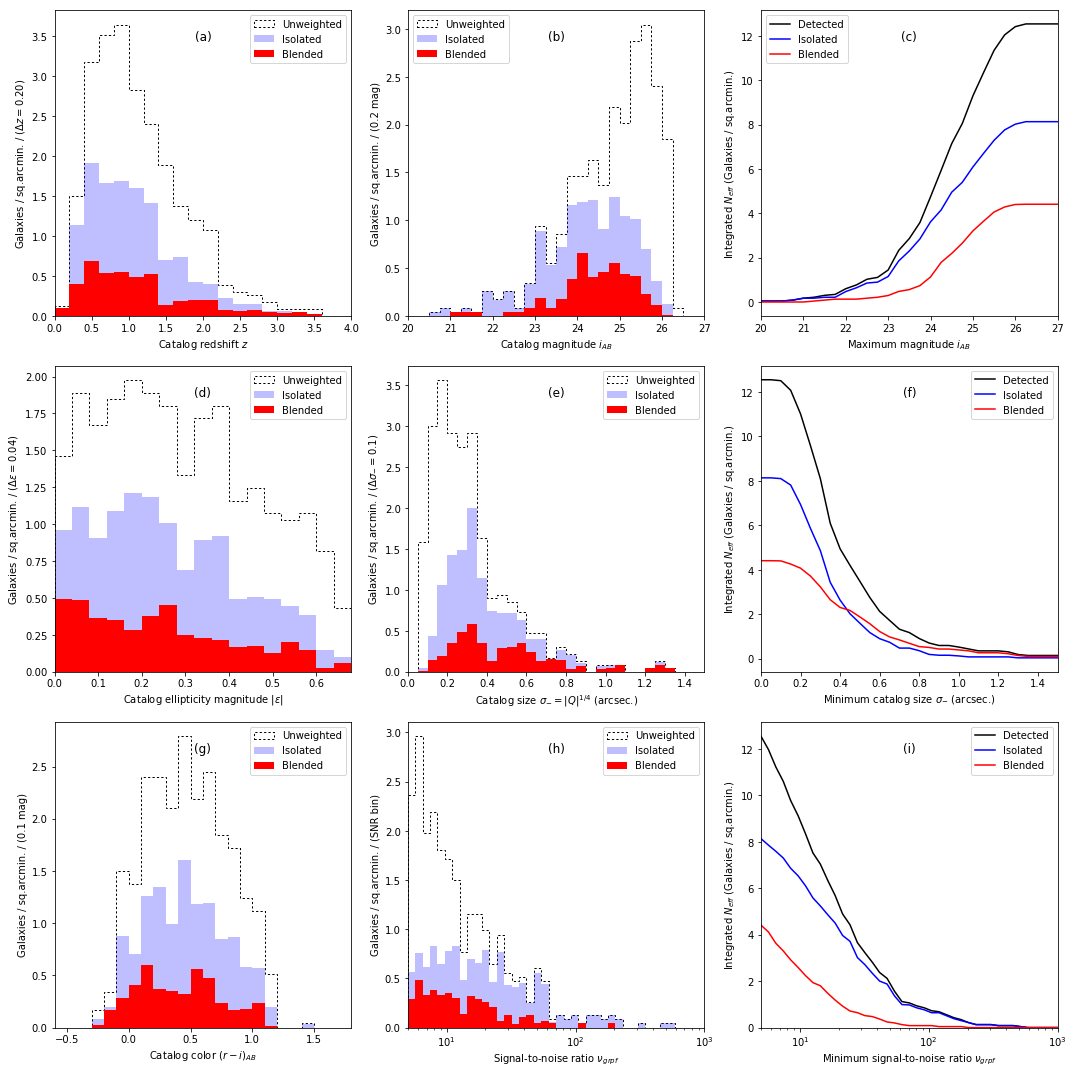

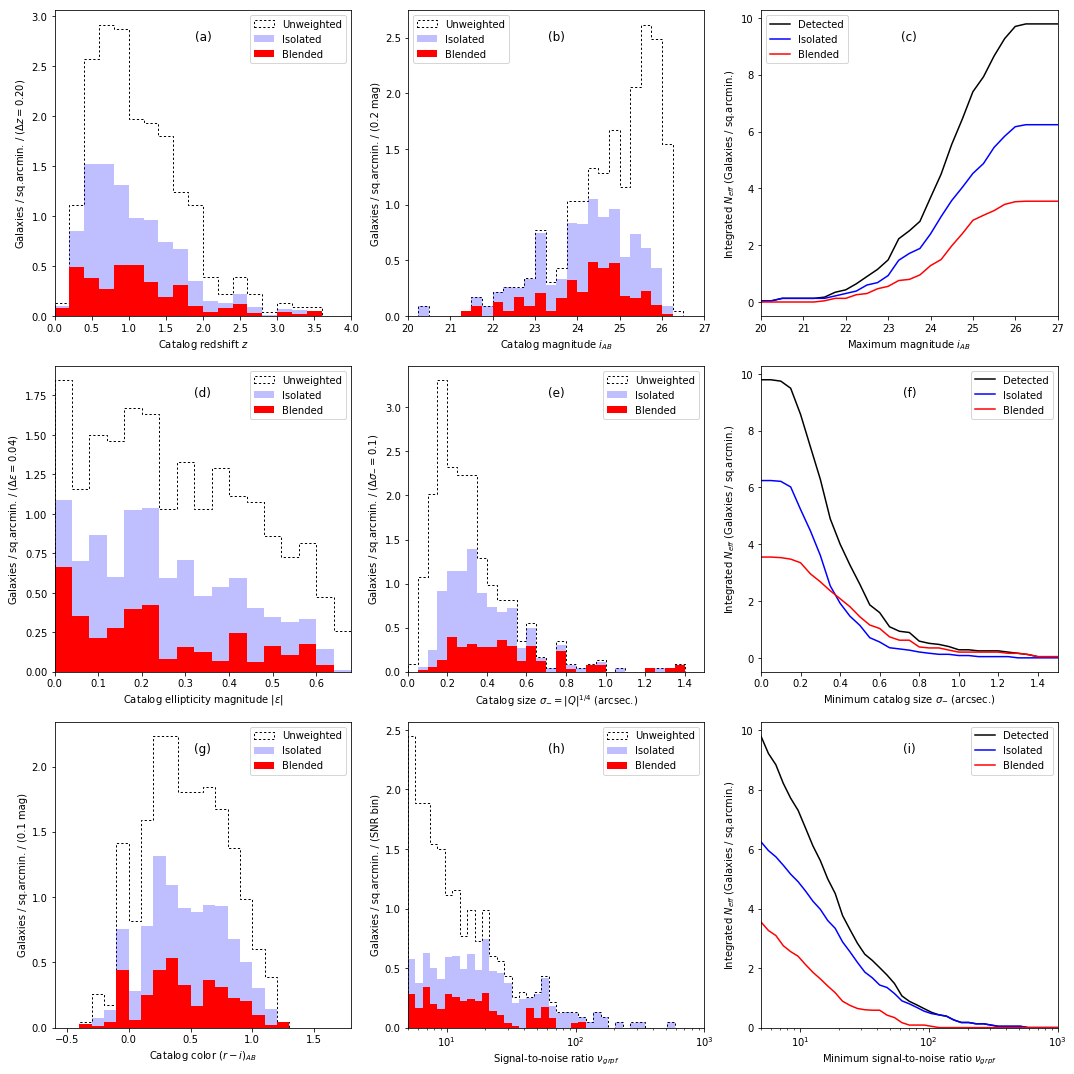

In [69]:
shear_plot(LSST_i_10,detection_cut=5)
shear_plot(LSST_i_20,detection_cut=5)
shear_plot(LSST_i_30,detection_cut=5)

Simulated area = 67.342 sq.arcmins.
Dropped 680 sources with snr_iso = 0 (max. snr_sky = 55715.559)
Stellar sources simulated 663
Number of galaxies 16418
Visible sample fractions: undetected 82.74%, blended 4.34%, isolated 12.92%
Detected sample fractions: blended 25.14%, isolated 74.86%
Detected intrinsic shape-noise RMS = 0.251
  detected sample is 100.0% of detected with neff/area = 23.612, RMS e = 0.2511, <z> = 1.092
  isolated sample is  74.9% of detected with neff/area = 17.133, RMS e = 0.2577, <z> = 1.088
   blended sample is  25.1% of detected with neff/area =  6.479, RMS e = 0.2303, <z> = 1.103
Pessimistic neff (Chang fitting formula):  13.4393249342
Fiducial neff (Chang fitting formula):  22.19471585
Optimistic neff (Chang fitting formula):  29.1226542906
Ratio of errors Chang/Fisher:  1.07826
Pessimistic neff:  13.0605205545  Number of sources  951
Fiducial neff:  20.7975247366  Number of sources  1758
Optimistic neff:  26.8056997578  Number of sources  2973
Simulated area 

/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: divide by zero encountered in divide


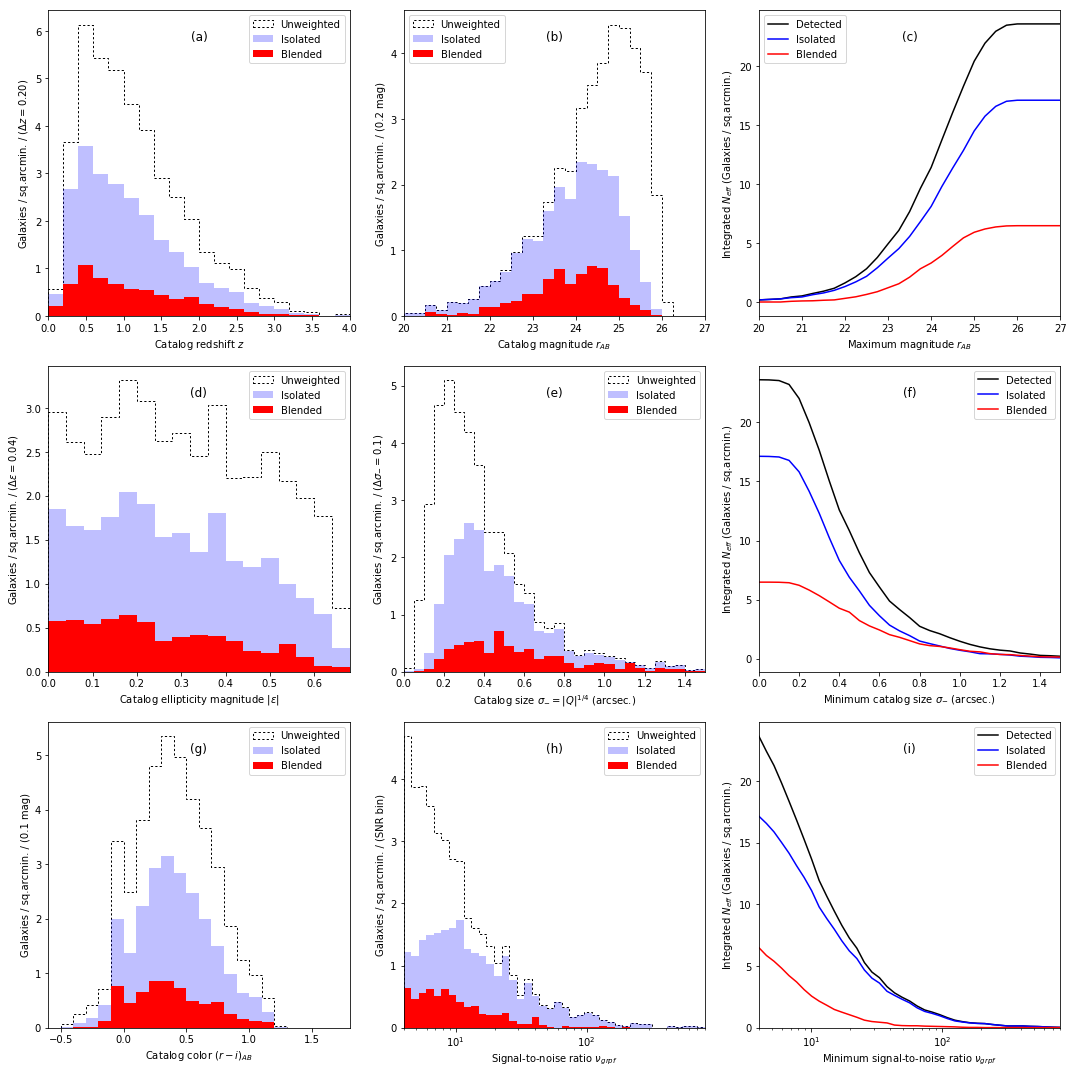

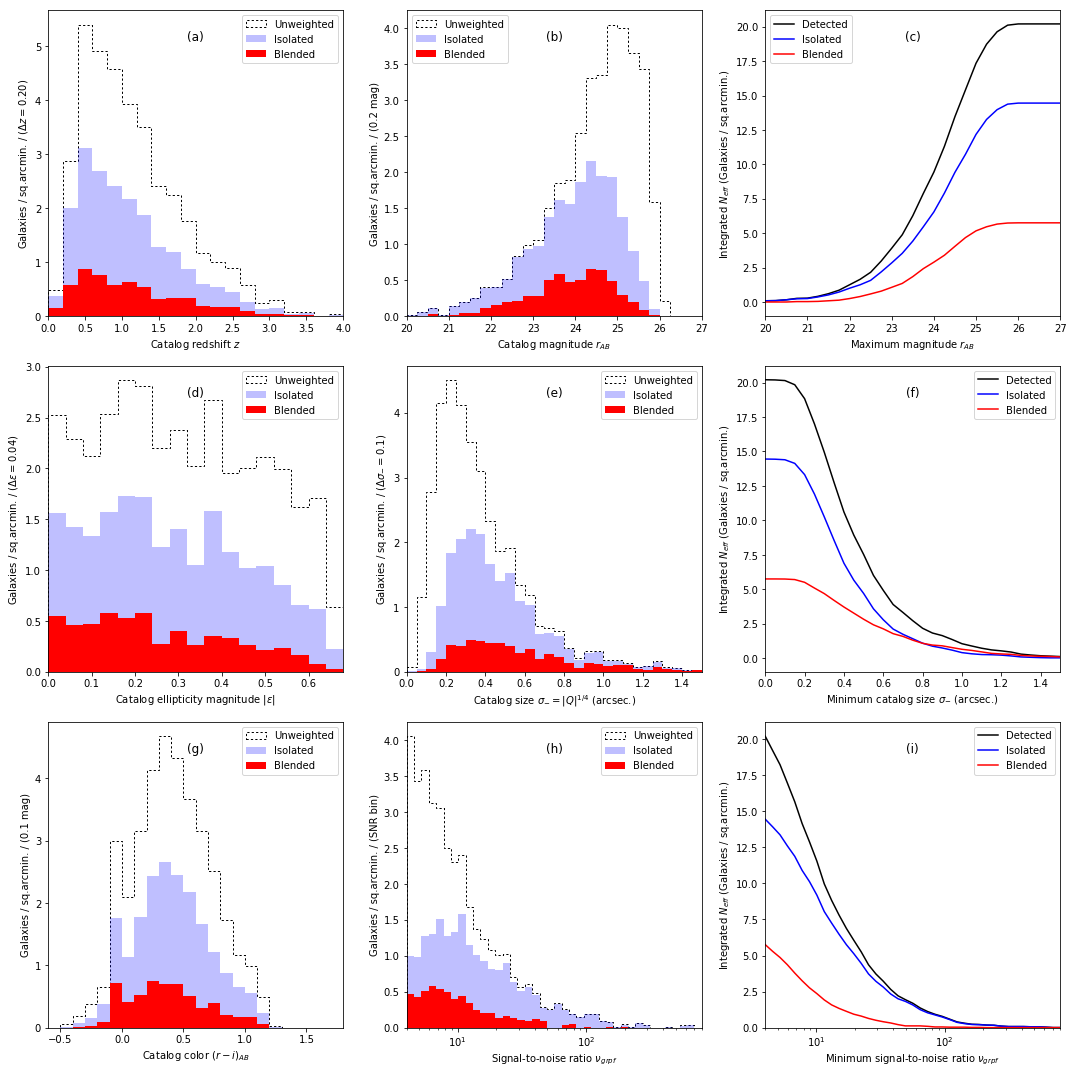

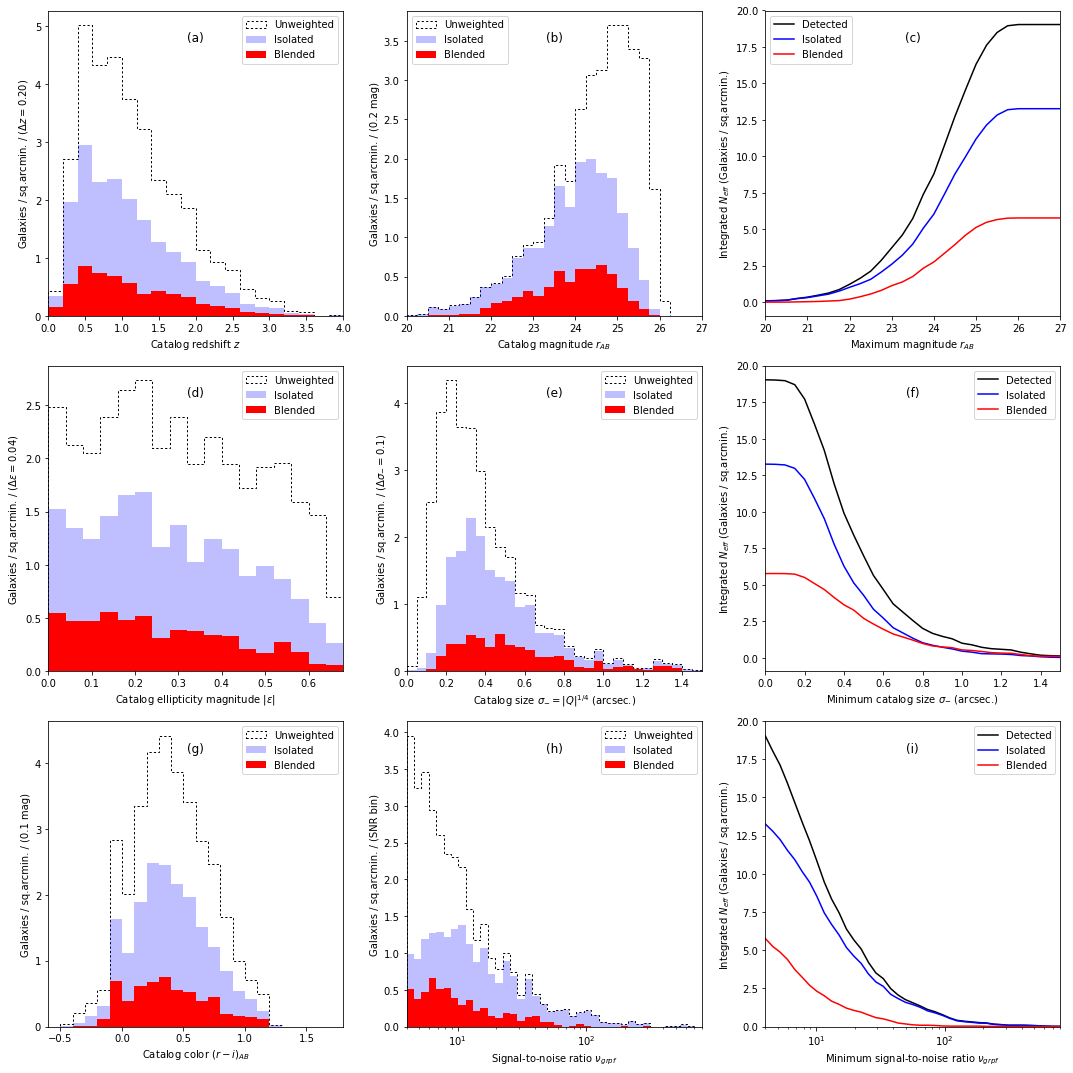

In [71]:
shear_plot(HSC_r_10,detection_cut=4)
shear_plot(HSC_r_20,detection_cut=4)
shear_plot(HSC_r_30,detection_cut=4)

Simulated area = 67.342 sq.arcmins.
Dropped 674 sources with snr_iso = 0 (max. snr_sky = 345854.094)
Stellar sources simulated 667
Number of galaxies 16426
Visible sample fractions: undetected 81.07%, blended 4.13%, isolated 14.80%
Detected sample fractions: blended 21.80%, isolated 78.20%
Detected intrinsic shape-noise RMS = 0.250
  detected sample is 100.0% of detected with neff/area = 27.210, RMS e = 0.2496, <z> = 1.039
  isolated sample is  78.2% of detected with neff/area = 20.773, RMS e = 0.2559, <z> = 1.024
   blended sample is  21.8% of detected with neff/area =  6.437, RMS e = 0.2253, <z> = 1.088
Pessimistic neff (Chang fitting formula):  19.3928236264
Fiducial neff (Chang fitting formula):  30.4795437489
Optimistic neff (Chang fitting formula):  38.7807566009
Ratio of errors Chang/Fisher:  1.11604
Pessimistic neff:  15.4559231028  Number of sources  1119
Fiducial neff:  24.5163833906  Number of sources  2054
Optimistic neff:  31.2001989014  Number of sources  3432
Simulated a

/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: divide by zero encountered in divide


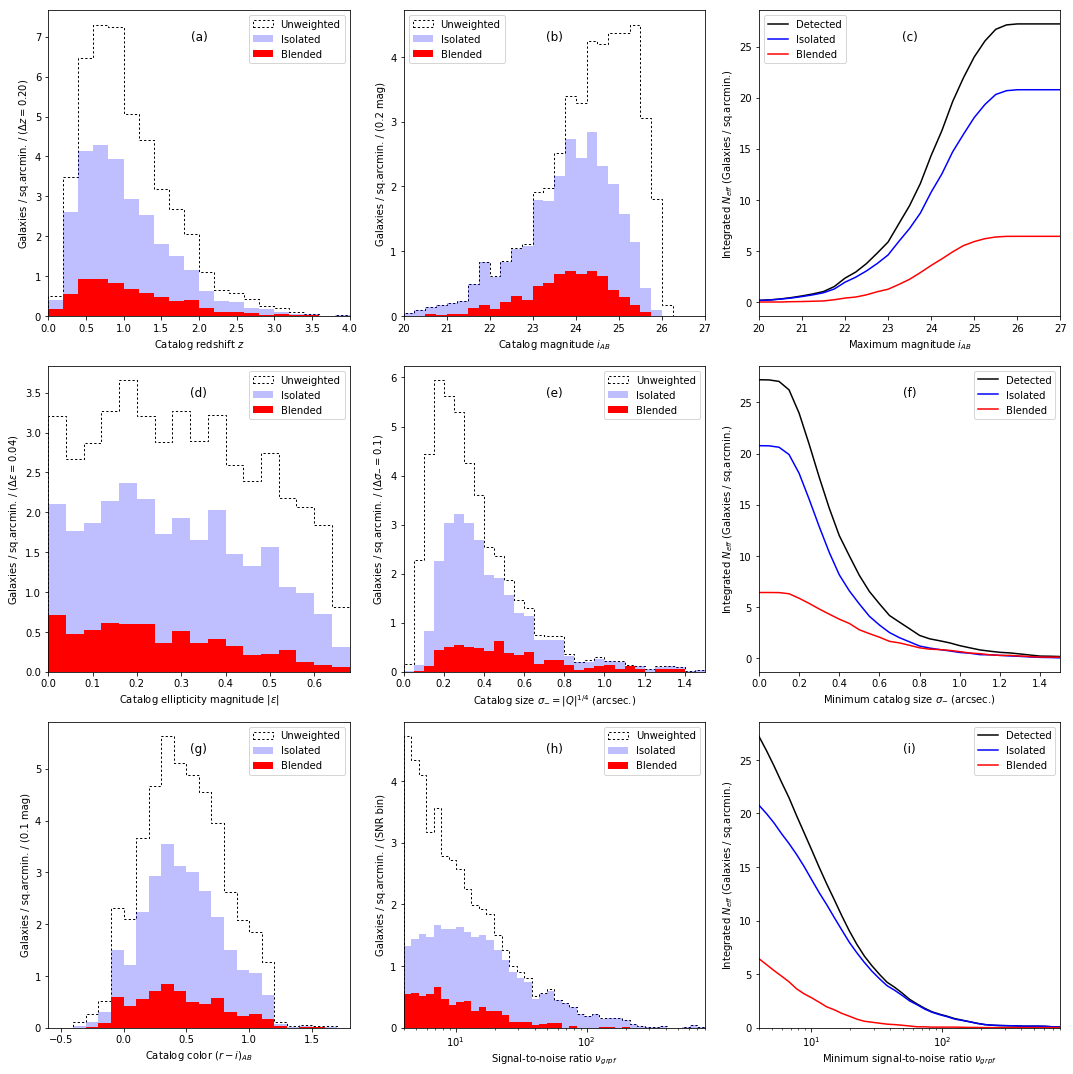

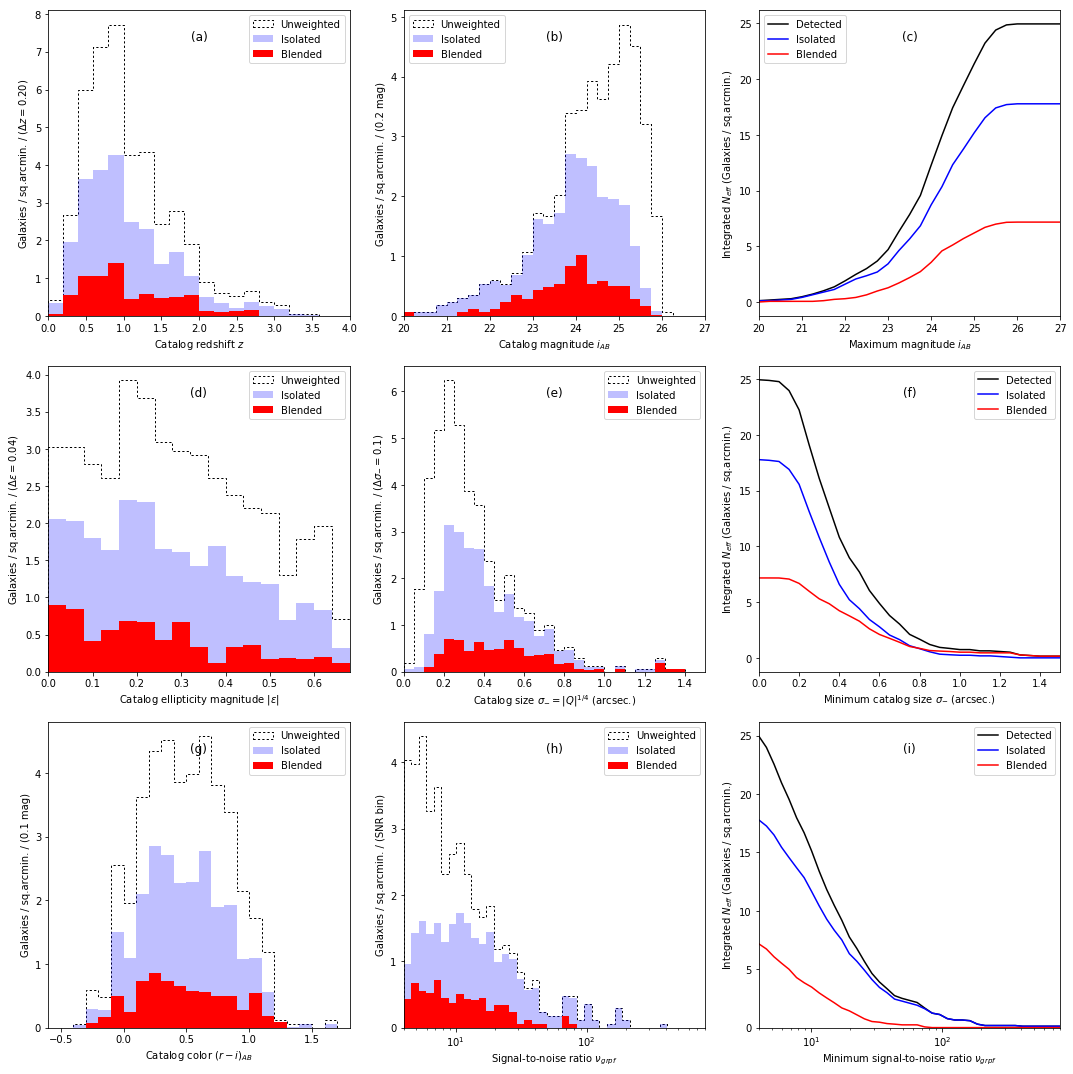

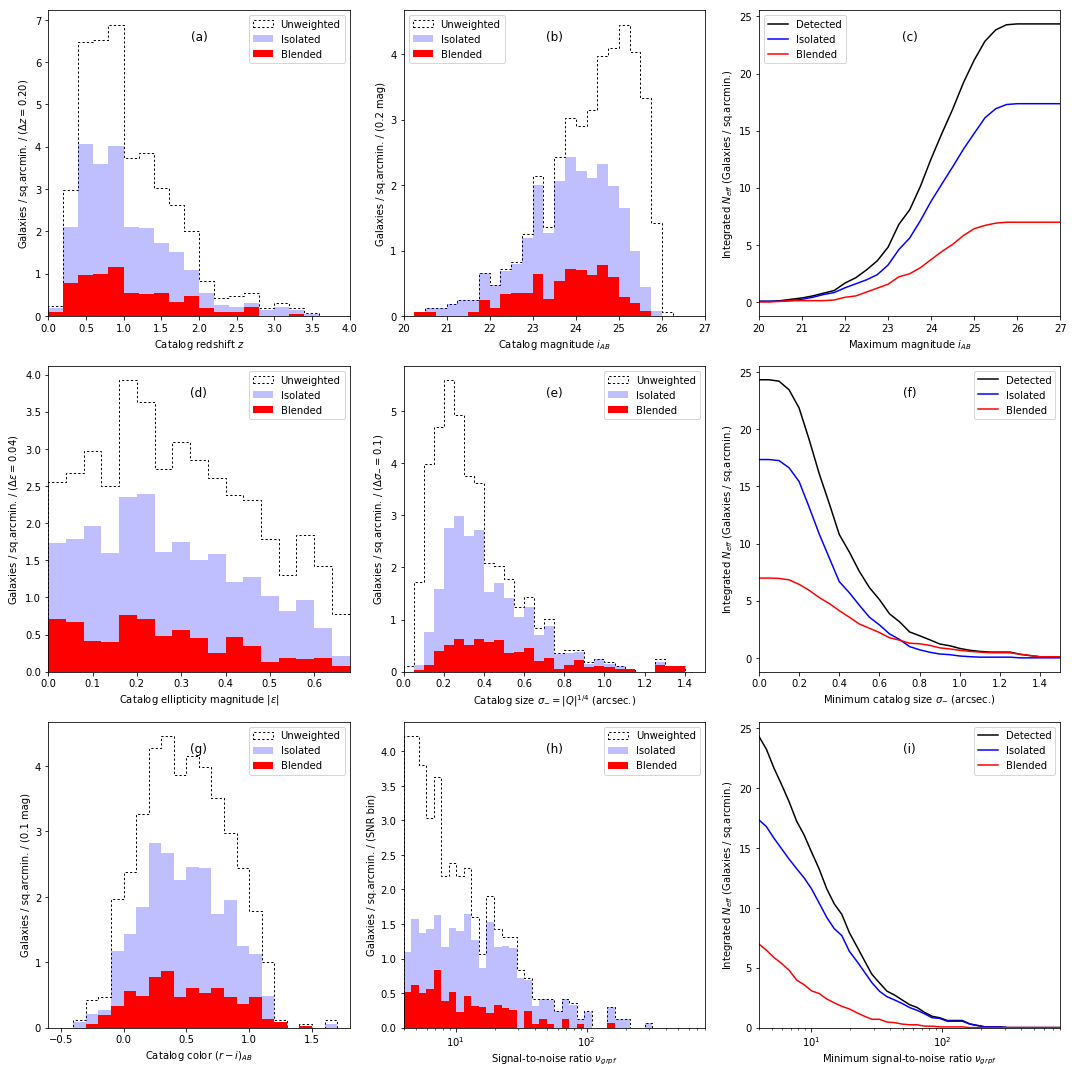

In [72]:
shear_plot(HSC_i_10,detection_cut=4)
shear_plot(HSC_i_20,detection_cut=4)
shear_plot(HSC_i_30,detection_cut=4)

Simulated area = 186.434 sq.arcmins.
Dropped 1769 sources with snr_iso = 0 (max. snr_sky = 28789.242)
Stellar sources simulated 1699
Number of galaxies 44927
Visible sample fractions: undetected 93.16%, blended 1.60%, isolated 5.24%
Detected sample fractions: blended 23.38%, isolated 76.62%
Detected intrinsic shape-noise RMS = 0.256
  detected sample is 100.0% of detected with neff/area =  7.592, RMS e = 0.2559, <z> = 0.988
  isolated sample is  76.6% of detected with neff/area =  5.632, RMS e = 0.2605, <z> = 0.963
   blended sample is  23.4% of detected with neff/area =  1.960, RMS e = 0.2401, <z> = 1.062
Pessimistic neff (Chang fitting formula):  6.28146903465
Fiducial neff (Chang fitting formula):  10.4676335445
Optimistic neff (Chang fitting formula):  14.0892694858
Ratio of errors Chang/Fisher:  0.920191
Pessimistic neff:  3.36256700789  Number of sources  681
Fiducial neff:  6.1116729506  Number of sources  1472
Optimistic neff:  8.29681047556  Number of sources  2707
Simulated a

/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: divide by zero encountered in divide


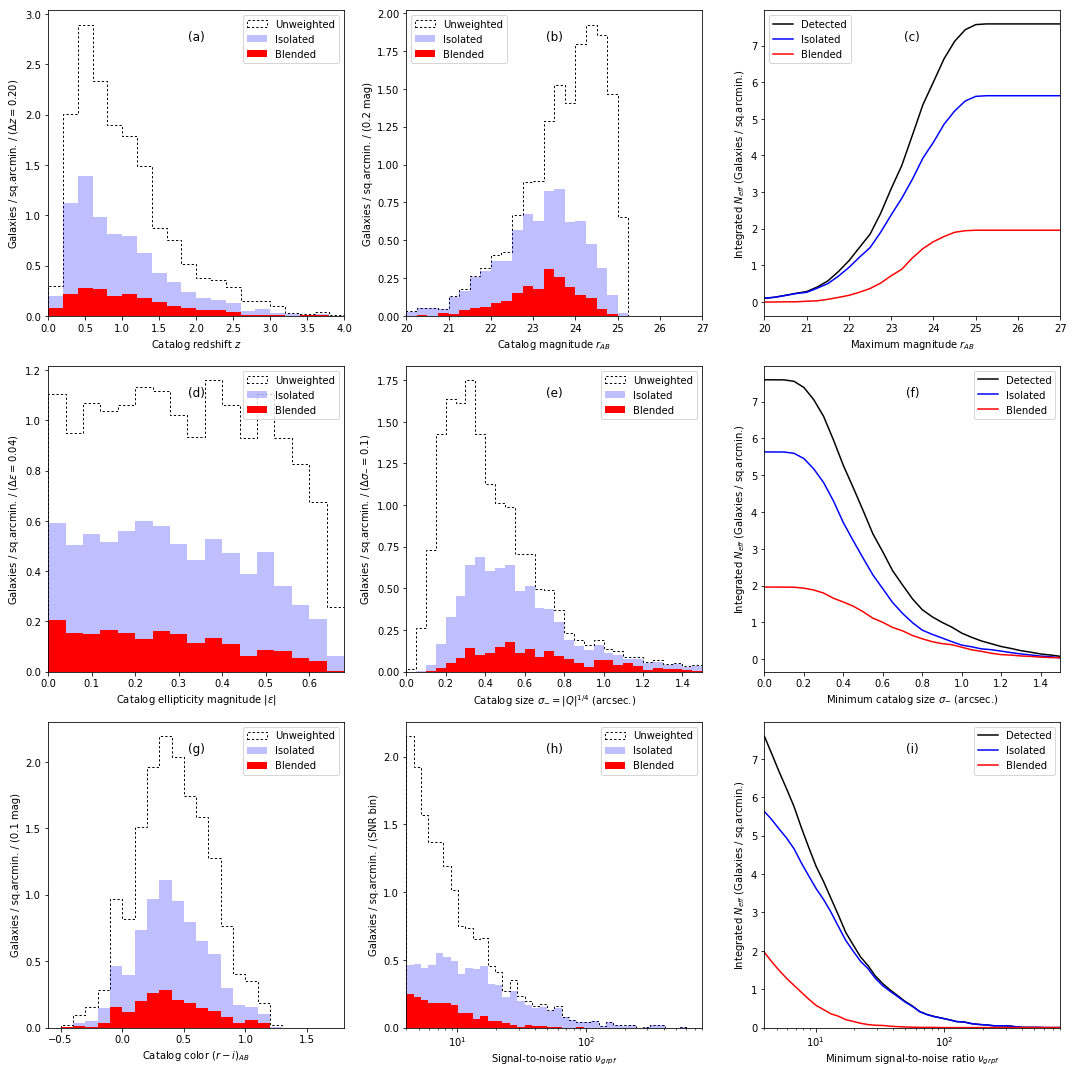

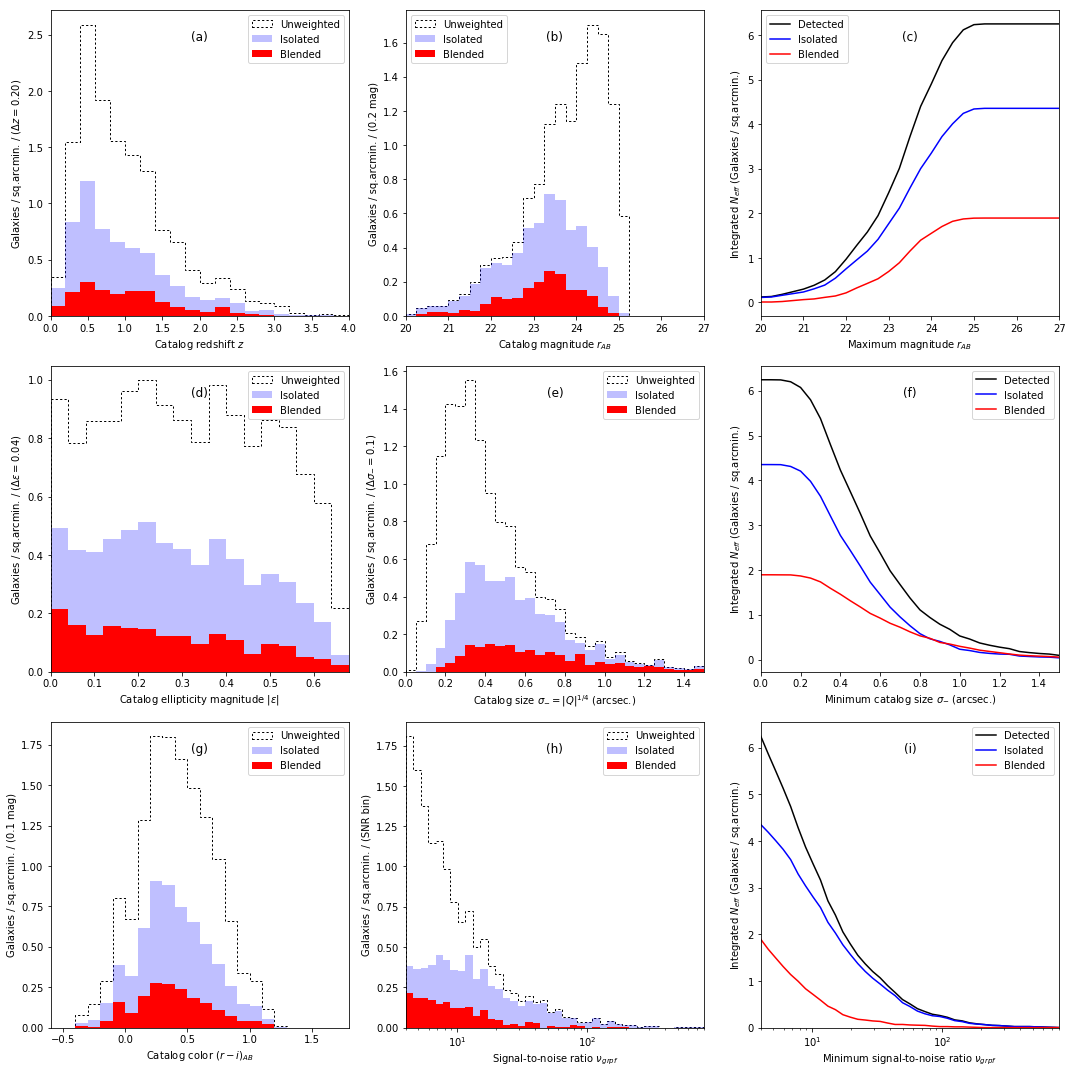

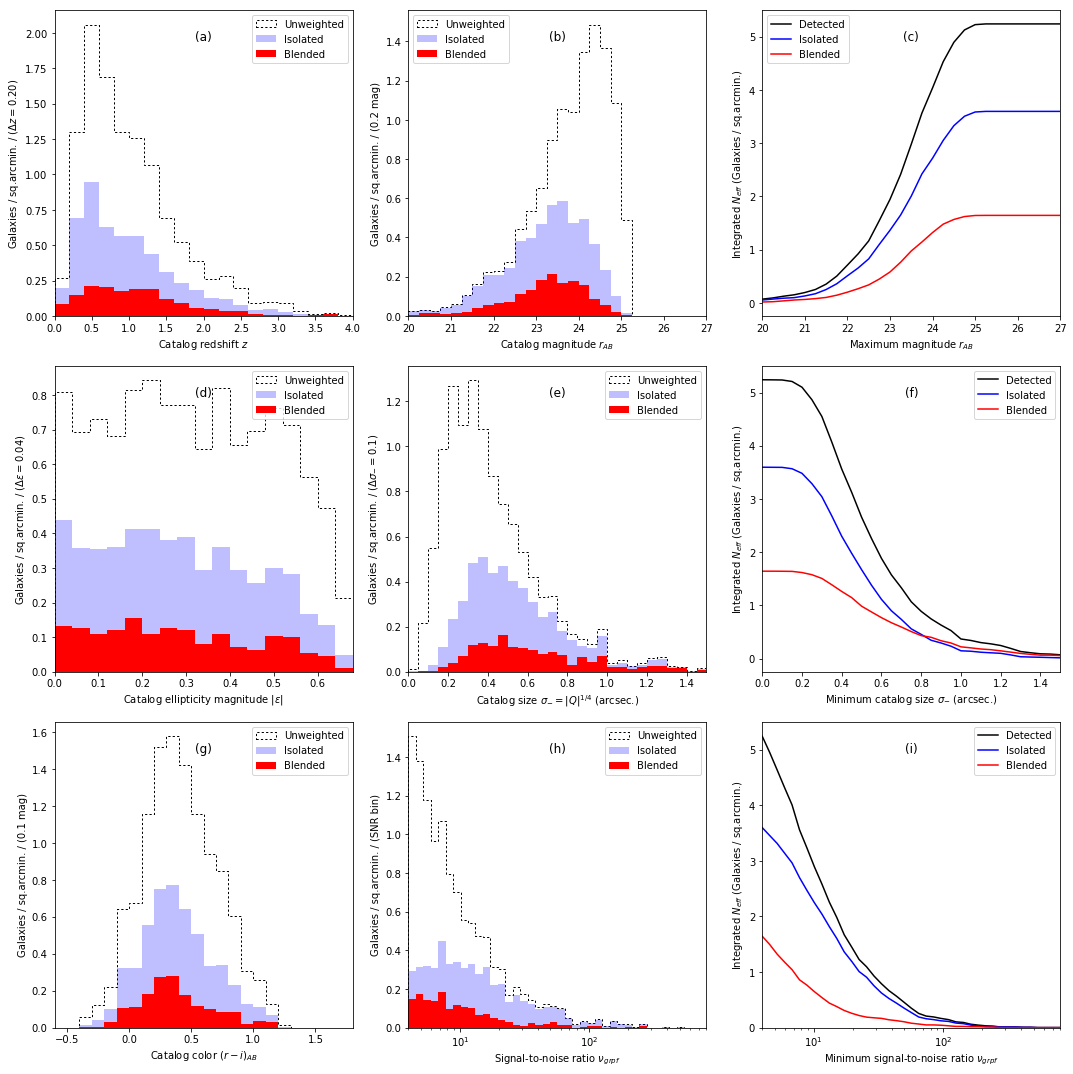

In [73]:
shear_plot(DES_r_10,detection_cut=4)
shear_plot(DES_r_20,detection_cut=4)
shear_plot(DES_r_30,detection_cut=4)

Simulated area = 186.434 sq.arcmins.
Dropped 1937 sources with snr_iso = 0 (max. snr_sky = 133981.828)
Stellar sources simulated 1774
Number of galaxies 44850
Visible sample fractions: undetected 93.46%, blended 1.42%, isolated 5.12%
Detected sample fractions: blended 21.78%, isolated 78.22%
Detected intrinsic shape-noise RMS = 0.259
  detected sample is 100.0% of detected with neff/area =  7.326, RMS e = 0.2589, <z> = 0.910
  isolated sample is  78.2% of detected with neff/area =  5.570, RMS e = 0.2623, <z> = 0.893
   blended sample is  21.8% of detected with neff/area =  1.756, RMS e = 0.2460, <z> = 0.965
Pessimistic neff (Chang fitting formula):  7.13388107429
Fiducial neff (Chang fitting formula):  11.5804289568
Optimistic neff (Chang fitting formula):  15.3212333009
Ratio of errors Chang/Fisher:  0.9309
Pessimistic neff:  3.35266107957  Number of sources  676
Fiducial neff:  5.95713549261  Number of sources  1430
Optimistic neff:  8.07654843704  Number of sources  2640
Simulated a

/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in less
/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: divide by zero encountered in divide


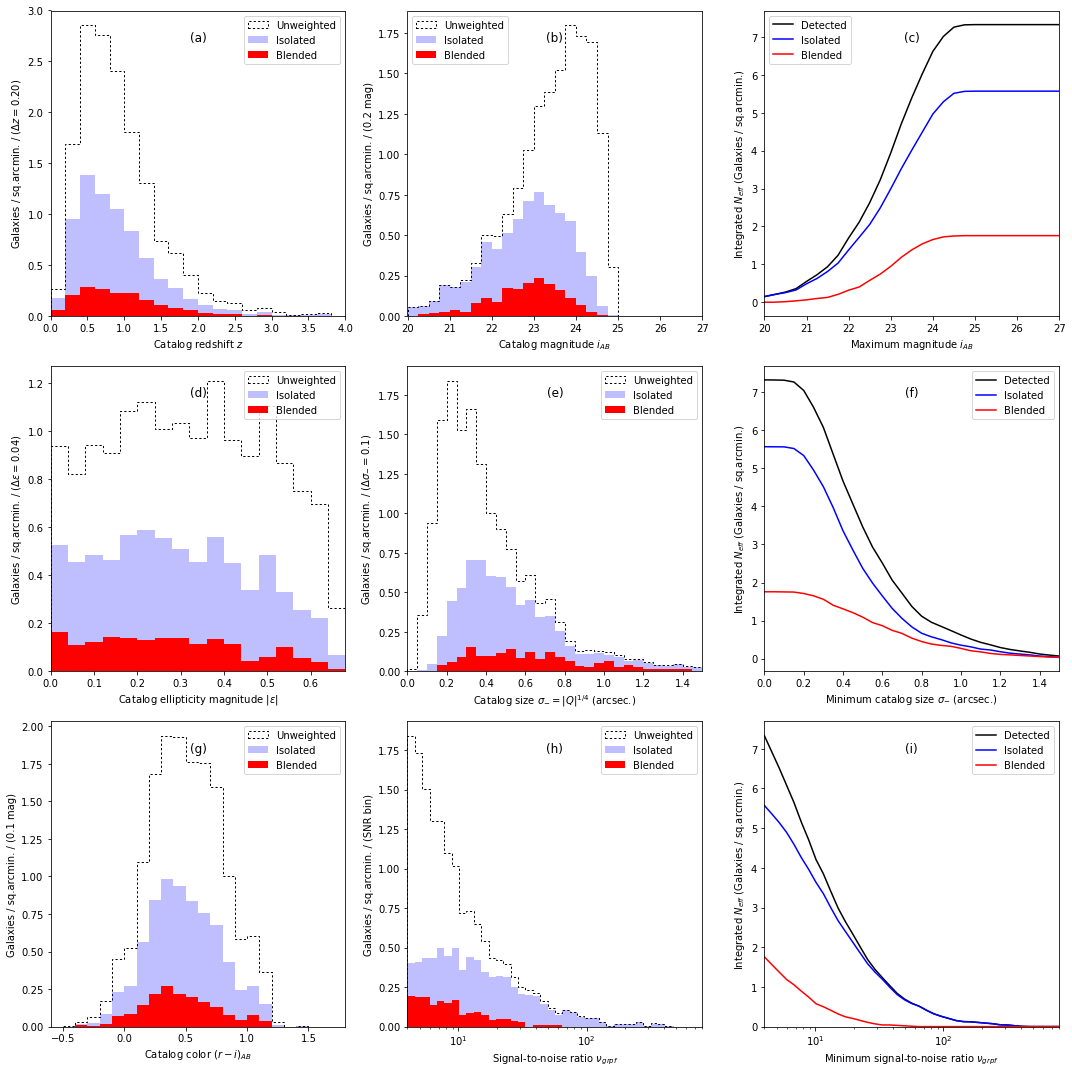

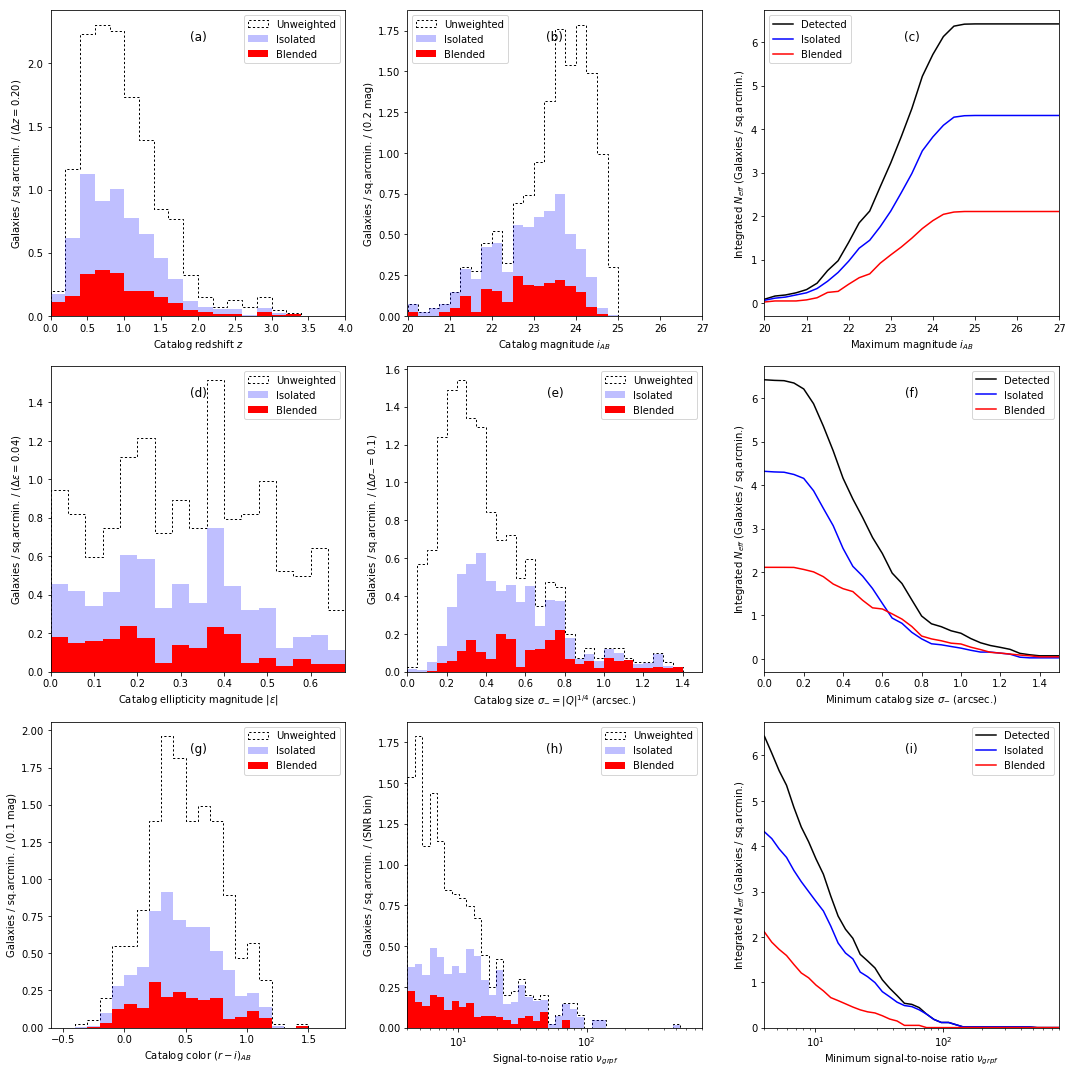

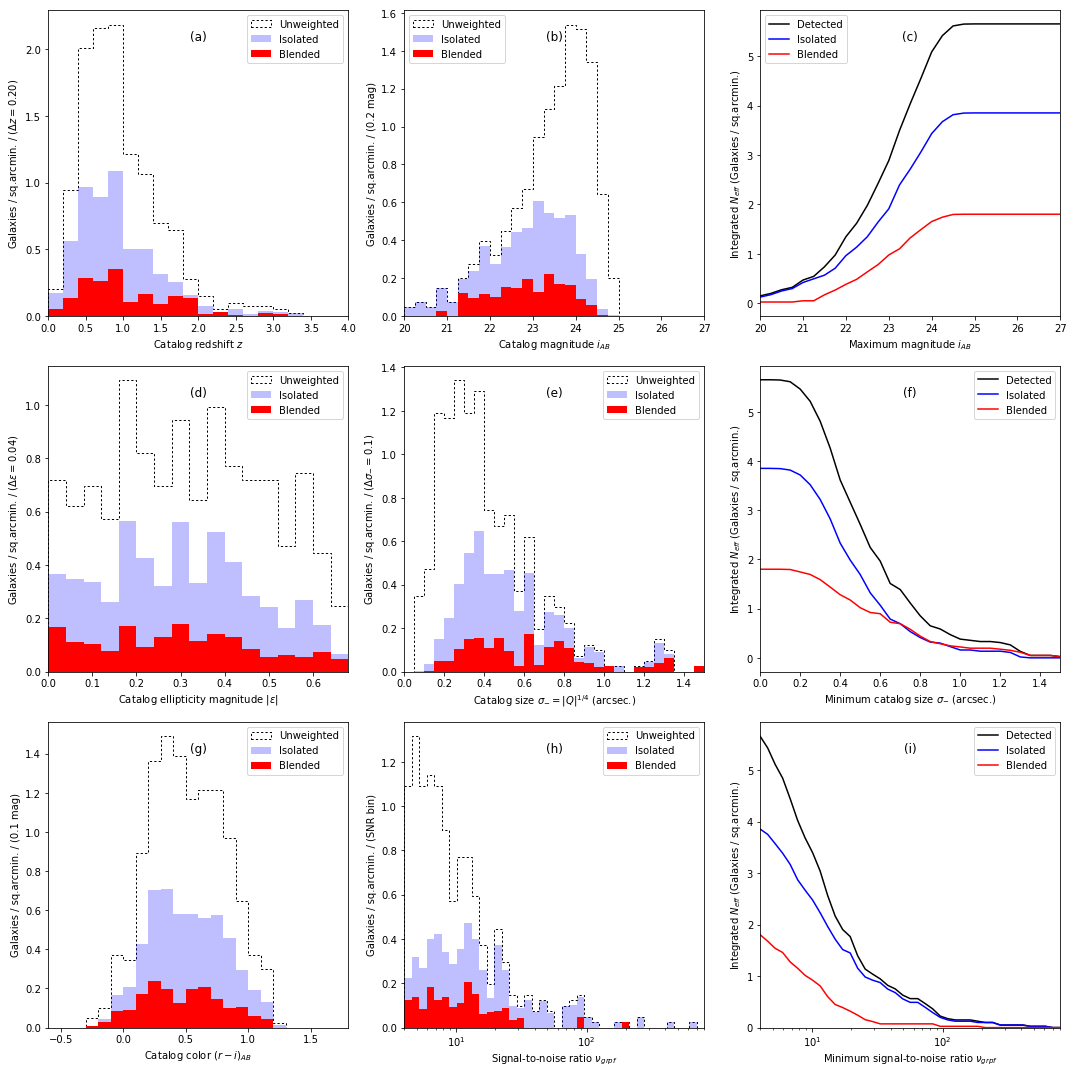

In [74]:
shear_plot(DES_i_10,detection_cut=4)
shear_plot(DES_i_20,detection_cut=4)
shear_plot(DES_i_30,detection_cut=4)

## Comparison with Jarvis et al.

In [37]:
import descwl

In [38]:
DES_i_match = descwl.output.Reader('../test_DES_i').results.match_sextractor('/Users/javiers/Downloads/sextractor-2.19.5/tests/test_DES_i.cat');

In [39]:
def shear_plot_jarvis(results,match=None,isolation_cut=0.98,detection_cut=0.,lim_mag_cut=False):
    hdr = results[0].header
    cat = astropy.table.Table.read(results,hdu=1)
    # Get our filter band.
    filter = hdr['FILTER_BAND'[-8:]].rstrip()
    # Calculate the simulated area in sq.arcmins.
    area = hdr['IMAGE_WIDTH'[-8:]]*hdr['IMAGE_HEIGHT'[-8:]]*hdr['PIXEL_SCALE'[-8:]]**2/3600.
    print 'Simulated area = %.3f sq.arcmins.' % area
    area_wgt = np.empty_like(cat['snr_sky'])
    area_wgt[:] = 1/area
    # Only use sources with centroids within the area and snr_iso > 0.
    bad_snr = (cat['snr_iso']<=0.)
    # Get our samples.
    undetected,detected,blended,isolated = make_samples(cat,isolation_cut,detection_cut)
    if match!=None:
        detected2,matched2,indices2,distance2 = match
        detected = np.zeros(len(cat),dtype=bool)
        detected[indices2]=1
    r_psf = hdr['PSF_SIGP']
    T = cat['sigma_p']**2/r_psf**2
    #Selection cuts in Jarvis et al.
    detected = np.logical_and(detected,cat['ab_mag']>18.0)
    if lim_mag_cut:
        detected = np.logical_and(detected,cat['ab_mag']<23.0) #This is to select the same i-band limiting magnitude
    detected = np.logical_and(detected,cat['ab_mag']+3.5*np.log(np.exp(-(cat['ab_mag']-24)/2.5)/(2*cat['sigma_p']**2))<28)
    detected = np.logical_and(detected,cat['snr_sky']>15.)
    detected = np.logical_and(detected,T>0.15) #Prescription for NGMIX in Jarvis et al 2015
    blended = np.logical_and(detected,blended)
    isolated = np.logical_and(isolated,detected)
    undetected = np.logical_not(detected)
    # Calculate the intrinsic shape noise variance of detected objects.
    intrinsic_var = 0.5*(np.var(cat['e1'][detected]) + np.var(cat['e2'][detected]))
    print 'Detected intrinsic shape-noise RMS = %.3f' % np.sqrt(intrinsic_var)
    # Calculate neff weights per object.
    wgt = 0.5*(intrinsic_var/(intrinsic_var+cat['dg1']**2)+intrinsic_var/(intrinsic_var+cat['dg2']**2))
    # Calculate |e| values per object.
    emag = np.sqrt(cat['e1']**2+cat['e2']**2)
    # Summary statistics.
    num_detected = np.count_nonzero(detected)
    print num_detected
    for name in ('detected','isolated','blended'):
        sample = eval(name)
        num_sample = np.count_nonzero(sample)
        Neff = np.sum(wgt[sample])/area
        var_e = 0.5*(np.nanvar(cat['e1'][sample])+np.nanvar(cat['e2'][sample]))
        zavg = np.sum(wgt[sample]*cat['z'][sample])/np.sum(wgt[sample])
        print '%10s sample is %5.1f%% of detected with neff/area = %6.3f, RMS e = %6.4f, <z> = %.3f' % (
            name,100.*num_sample/num_detected,Neff,np.sqrt(var_e),zavg)


In [40]:
shear_plot_jarvis(DES_i,match=DES_i_match,lim_mag_cut=True)
shear_plot_jarvis(DES_i,detection_cut=4.,lim_mag_cut=True)

Simulated area = 186.434 sq.arcmins.
Dropped 164 sources with snr_iso = 0 (max. snr_sky = 0.166)
Stellar sources simulated 0
Number of galaxies 44850
Visible sample fractions: undetected 0.00%, blended 52.57%, isolated 47.43%
Detected sample fractions: blended 52.57%, isolated 47.43%
Detected intrinsic shape-noise RMS = 0.249
1214
  detected sample is 100.0% of detected with neff/area =  6.026, RMS e = 0.2486, <z> = 0.806
  isolated sample is  68.2% of detected with neff/area =  4.131, RMS e = 0.2557, <z> = 0.770
   blended sample is  31.5% of detected with neff/area =  1.875, RMS e = 0.2332, <z> = 0.889
Simulated area = 186.434 sq.arcmins.
Dropped 164 sources with snr_iso = 0 (max. snr_sky = 0.166)
Stellar sources simulated 0
Number of galaxies 44850
Visible sample fractions: undetected 89.39%, blended 2.77%, isolated 7.84%
Detected sample fractions: blended 26.10%, isolated 73.90%
Detected intrinsic shape-noise RMS = 0.250
1196
  detected sample is 100.0% of detected with neff/area =

## Comparison with HSC (https://arxiv.org/pdf/1705.06745.pdf) Mandelbaum et al 2017

In [41]:
def shear_hsc(results,match=None,isolation_cut=1-10**(-0.375),detection_cut=4.,lim_mag_cut=False,verbose=False):
    hdr = results[0].header
    cat = astropy.table.Table.read(results,hdu=1)
    # Get our filter band.
    filter = hdr['FILTER_BAND'[-8:]].rstrip()
    # Calculate the simulated area in sq.arcmins.
    area = hdr['IMAGE_WIDTH'[-8:]]*hdr['IMAGE_HEIGHT'[-8:]]*hdr['PIXEL_SCALE'[-8:]]**2/3600.
    if verbose:
        print 'Simulated area = %.3f sq.arcmins.' % area
    area_wgt = np.empty_like(cat['snr_sky'])
    area_wgt[:] = 1/area
    # Only use sources with centroids within the area and snr_iso > 0.
    bad_snr = (cat['snr_iso']<=0.)
    # Get our samples.
    undetected,detected,blended,isolated = make_samples(cat,isolation_cut,detection_cut,verbose=verbose)
    if match!=None:
        detected2,matched2,indices2,distance2 = match
        detected = np.zeros(len(cat),dtype=bool)
        detected[indices2]=1
    r_psf = hdr['PSF_SIGP']
    R2 = 1.-r_psf**2/cat['psf_sigp']**2
    #Selection cuts in Mandelbaum et al.
    detected = np.logical_and(detected,cat['ab_mag']<24.5)
    detected = np.logical_and(detected,cat['snr_sky']>10.)
    detected = np.logical_and(detected,np.sqrt(0.5*cat['dg1']**2+0.5*cat['dg2']**2)<0.4)
    detected = np.logical_and(detected,np.sqrt(cat['hsm_e1']**2+cat['hsm_e2']**2)<2)
    detected = np.logical_and(detected,R2>=0.3) 
    blended = np.logical_and(detected,blended)
    isolated = np.logical_and(isolated,detected)
    undetected = np.logical_not(detected)
    # Calculate the intrinsic shape noise variance of detected objects.
    intrinsic_var = 0.5*(np.var(cat['e1'][detected]) + np.var(cat['e2'][detected]))
    #print 'Detected intrinsic shape-noise RMS = %.3f' % np.sqrt(intrinsic_var)
    # Calculate neff weights per object.
    wgt = 0.5*(intrinsic_var/(intrinsic_var+cat['dg1']**2)+intrinsic_var/(intrinsic_var+cat['dg2']**2))
    # Calculate |e| values per object.
    emag = np.sqrt(cat['e1']**2+cat['e2']**2)
    # Summary statistics.
    num_detected = np.count_nonzero(detected)
    neff=[]
    if verbose:
        print num_detected
    for name in ('detected','isolated','blended'):
        sample = eval(name)
        num_sample = np.count_nonzero(sample)
        Neff = np.sum(wgt[sample])/area
        var_e = 0.5*(np.nanvar(cat['e1'][sample])+np.nanvar(cat['e2'][sample]))
        zavg = np.sum(wgt[sample]*cat['z'][sample])/np.sum(wgt[sample])
        if verbose:
            print '%10s sample is %5.1f%% of detected with neff/area = %6.3f, RMS e = %6.4f, <z> = %.3f' % (
                name,100.*num_sample/num_detected,Neff,np.sqrt(var_e),zavg)
        neff.append(Neff)
    return neff

In [42]:
HSC_i_match = descwl.output.Reader('../test_HSC_i_sigp').results.match_sextractor('/Users/javiers/Downloads/sextractor-2.19.5/tests/test_HSC_i_noise_sigp.cat');

In [43]:
shear_hsc(HSC_i,verbose=True)

Simulated area = 67.342 sq.arcmins.
Dropped 5 sources with snr_iso = 0 (max. snr_sky = 0.130)
Stellar sources simulated 0
Number of galaxies 16426
Visible sample fractions: undetected 75.46%, blended 0.29%, isolated 24.24%
Detected sample fractions: blended 1.20%, isolated 98.80%
1691
  detected sample is 100.0% of detected with neff/area = 22.686, RMS e = 0.2378, <z> = 0.996
  isolated sample is  98.3% of detected with neff/area = 22.316, RMS e = 0.2383, <z> = 0.996
   blended sample is   1.7% of detected with neff/area =  0.370, RMS e = 0.2026, <z> = 1.004


[22.685629997247741, 22.316030484453403, 0.36959888968031818]

In [44]:
shear_hsc(HSC_i,match=HSC_i_match,detection_cut=0,verbose=True)

Simulated area = 67.342 sq.arcmins.
Dropped 5 sources with snr_iso = 0 (max. snr_sky = 0.130)
Stellar sources simulated 0
Number of galaxies 16426
Visible sample fractions: undetected 0.00%, blended 12.21%, isolated 87.79%
Detected sample fractions: blended 12.21%, isolated 87.79%
1698
  detected sample is 100.0% of detected with neff/area = 22.694, RMS e = 0.2373, <z> = 1.004
  isolated sample is  99.5% of detected with neff/area = 22.573, RMS e = 0.2369, <z> = 1.003
   blended sample is   0.1% of detected with neff/area =  0.025, RMS e = 0.0666, <z> = 0.965


[22.694303744366213, 22.572544999549539, 0.02510170739778882]

In [45]:
npoints=100
neff_iso=np.zeros(npoints)
iso_cut = np.zeros(npoints)
for ii in range(npoints):
    iso_cut[ii] = 1.0/npoints*ii
    neff_iso[ii]=shear_hsc(HSC_i,match=HSC_i_match,detection_cut=0,isolation_cut=iso_cut[ii])[1]

/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:47: RuntimeWarning: Degrees of freedom <= 0 for slice.


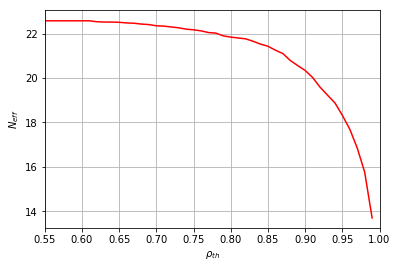

In [46]:
plt.plot(iso_cut,neff_iso,'r-')
plt.xlabel(r'$\rho_{th}$')
plt.ylabel(r'$N_{eff}$')
plt.xlim(0.55,1.0)
plt.grid()
plt.savefig('/Users/javiers/Desktop/neff_rho_hsc.pdf')

# Trend with stellar density

-0.617795865995 -0.299590549819 -0.15013310952 38.0463706192 26.6071889073 10.2031392808


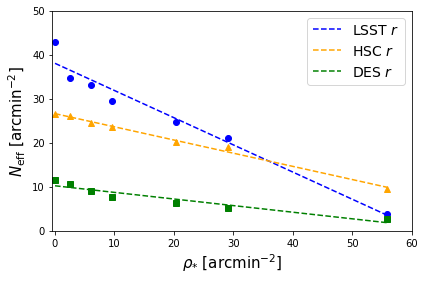

In [83]:
rho_stars = np.array([0,2.5,6.1,9.65,20.44,29.18,55.9])
N_eff_tot_LSST_r = np.array([42.80,34.7,33.22,29.52,24.76,20.96,3.90])
N_eff_iso_LSST_r = np.array([25.62,21.55,19.90,17.67,13.69,11.08,2.6])
N_eff_blend_LSST_r = N_eff_tot_LSST_r - N_eff_iso_LSST_r
N_eff_tot_LSST_i = np.array([41.15,35.6,30.04,18.23,23.55,9.79,0.95])
N_eff_iso_LSST_i = np.array([25.69,22.21,18.38,12.66,8.14,6.24,0.72])
N_eff_blend_LSST_i = N_eff_tot_LSST_i - N_eff_iso_LSST_i
N_eff_tot_DES_i = np.array([12.78,11.47,9.24,7.33,6.42,5.66,0.93])
N_eff_iso_DES_i = np.array([9.21,8.23,6.76,5.57,4.32,3.85,0.50])
N_eff_blend_DES_i = N_eff_tot_DES_i - N_eff_iso_DES_i
N_eff_tot_DES_r = np.array([11.50,10.56,9.07,7.59,6.25,5.24,2.63])
N_eff_iso_DES_r = np.array([8.15,7.52,6.52,5.63,4.35,3.60,1.42])
N_eff_blend_DES_r = N_eff_tot_DES_r - N_eff_iso_DES_r
N_eff_tot_HSC_r = np.array([26.47,26.00,24.45,23.61,20.21,19.03,9.40])
N_eff_iso_HSC_r = np.array([19.20,18.80,17.57,17.13,14.45,13.26,6.86])
N_eff_blend_HSC_r = N_eff_tot_HSC_r - N_eff_iso_HSC_r
N_eff_tot_HSC_i = np.array([36.21,34.91,32.46,27.21,24.95,24.34,10.97])
N_eff_iso_HSC_i = np.array([26.37,25.29,23.22,20.77,17.78,17.36,6.06])
N_eff_blend_HSC_i = N_eff_tot_HSC_i - N_eff_iso_HSC_i

pars1, res1, _, _, _ = np.polyfit(rho_stars,N_eff_tot_LSST_r,1, full=True)
pars2, res2, _, _, _ = np.polyfit(rho_stars,N_eff_tot_HSC_r,1, full=True)
pars3, res3, _, _, _ = np.polyfit(rho_stars,N_eff_tot_DES_r,1, full=True)
b1 = pars1[1]
m1 = pars1[0]
b2 = pars2[1]
m2 = pars2[0]
b3 = pars3[1]
m3 = pars3[0]
print m1, m2, m3, b1, b2, b3
plt.plot(rho_stars,N_eff_tot_LSST_r,'bo', rho_stars, m1*(rho_stars)+b1, 'b--', label='LSST $r$')
plt.plot(rho_stars,N_eff_tot_HSC_r,color='orange', marker='^',linestyle='none')
plt.plot(rho_stars, m2*(rho_stars)+b2, '--',color='orange', label='HSC $r$')
plt.plot(rho_stars,N_eff_tot_DES_r,'gs', rho_stars, m3*(rho_stars)+b3, 'g--', label='DES $r$')
#plt.plot(rho_stars,rho_stars,'k-.')
#plt.plot((0,60),(0.5,0.5),'k-')
#plt.plot((rho_cut1,rho_cut1),(0,0.5),'b--')
#plt.plot((rho_cut2,rho_cut2),(0,0.5),'g--')
#plt.plot(1+rho_stars,N_eff_iso_DES_i/N_eff_tot_DES_i,'o', label='DES i')
#plt.plot(1+rho_stars,N_eff_iso_DES_r/N_eff_tot_DES_r, 'o',label='DES r')
#plt.plot(1+rho_stars,N_eff_iso_CFHT_i/N_eff_tot_CFHT_i,'o', label='CFHT i')
#plt.plot(1+rho_stars,N_eff_iso_CFHT_r/N_eff_tot_CFHT_r, 'o',label='CFHT r')
from collections import OrderedDict
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend(by_label.values(), by_label.keys(),fontsize=14)
#plt.legend()
#plt.xscale('log')
plt.xlim(-0.5,60)
plt.ylim(-0.1,50)
plt.xlabel(r'$\rho_{*}$ [arcmin$^{-2}$]',fontsize=15)
plt.ylabel('$N_{\mathrm{eff}}$ [arcmin$^{-2}$]',fontsize=15)
plt.tight_layout()
#savefig('/Users/javiers/Downloads/DeblendingPaper/figs/N_eff_rho_evolution.pdf')

In [80]:
ratio_r = (N_eff_iso_LSST_r/N_eff_tot_LSST_r)#-(N_eff_iso_LSST_r[0]/N_eff_tot_LSST_r[0]))/((N_eff_iso_LSST_r[0]/N_eff_tot_LSST_r[0]))
ratio_i = (N_eff_iso_LSST_i/N_eff_tot_LSST_i)#-(N_eff_iso_LSST_i[0]/N_eff_tot_LSST_i[0]))/((N_eff_iso_LSST_i[0]/N_eff_tot_LSST_i[0]))
ratio_DESr = (N_eff_iso_DES_r/N_eff_tot_DES_r)#-(N_eff_iso_DES_r[0]/N_eff_tot_DES_r[0]))/((N_eff_iso_DES_r[0]/N_eff_tot_DES_r[0]))
ratio_DESi = (N_eff_iso_DES_i/N_eff_tot_DES_i)#-(N_eff_iso_DES_i[0]/N_eff_tot_DES_i[0]))/((N_eff_iso_DES_i[0]/N_eff_tot_DES_i[0]))
ratio_HSCr = (N_eff_iso_HSC_r/N_eff_tot_HSC_r)#-(N_eff_iso_CFHT_r[0]/N_eff_tot_CFHT_r[0]))/((N_eff_iso_CFHT_r[0]/N_eff_tot_CFHT_r[0]))
ratio_HSCi = (N_eff_iso_HSC_i/N_eff_tot_HSC_i)#-(N_eff_iso_CFHT_i[0]/N_eff_tot_CFHT_i[0]))/((N_eff_iso_CFHT_i[0]/N_eff_tot_CFHT_i[0]))

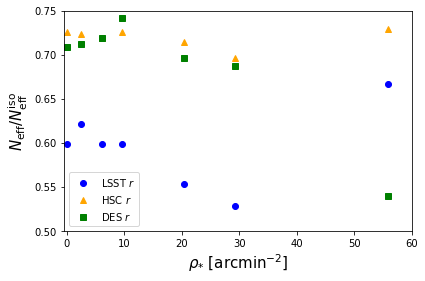

In [81]:
plt.plot(rho_stars,ratio_r, 'bo',label='LSST $r$')
#plt.plot(1+rho_stars,ratio_i, 'bo', label = 'LSST $i$')
#plt.plot(1+rho_stars,ratio_DESi, 'bs', label = 'DES $i$')
plt.plot(rho_stars,ratio_HSCr, color='orange',marker='^',linestyle='none', label = 'HSC $r$')
#plt.plot(1+rho_stars,ratio_HSCi, 'b^', label = 'HSC $i$')
plt.plot(rho_stars,ratio_DESr, 'gs', label = 'DES $r$')
plt.xlim(-0.5,60)
plt.ylim(0.5,0.75)
plt.xlabel(r'$\rho_{*}$ [arcmin$^{-2}$]', fontsize=15)
plt.ylabel(r'$N_{\mathrm{eff}}/N^{\mathrm{iso}}_{\mathrm{eff}}$',fontsize=15)
plt.legend(loc='best')
plt.tight_layout()
savefig('/Users/javiers/Downloads/DeblendingPaper/figs/N_eff_rho_new.pdf')

In [5]:
cat = astropy.table.Table.read(LSST_r,hdu=1)

(0, 50)

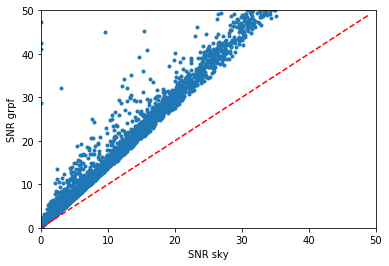

In [74]:
plt.scatter(cat['snr_grpf'][cat['purity']>0.999],cat['snr_sky'][cat['purity']>0.999],marker='.')
plt.xlabel('SNR sky')
plt.ylabel('SNR grpf')
plt.plot(np.arange(50),np.arange(50),'r--')
plt.xlim(0,50)
plt.ylim(0,50)

# Check the blending from different redshifts

In [6]:
cat.keys()

['db_id',
 'grp_id',
 'grp_size',
 'grp_rank',
 'visible',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'f_disk',
 'f_bulge',
 'dx',
 'dy',
 'z',
 'ab_mag',
 'ri_color',
 'flux',
 'sigma_m',
 'sigma_p',
 'e1',
 'e2',
 'a',
 'b',
 'beta',
 'psf_sigm',
 'purity',
 'snr_sky',
 'snr_iso',
 'snr_grp',
 'snr_isof',
 'snr_grpf',
 'ds',
 'dg1',
 'dg2',
 'ds_grp',
 'dg1_grp',
 'dg2_grp',
 'hsm_sigm',
 'hsm_e1',
 'hsm_e2',
 'g1_fit',
 'g2_fit']

0.0403674
7.87983


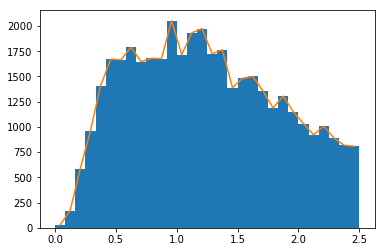

In [7]:
print np.min(cat['z'][cat['grp_size']>1])
print np.max(cat['z'][cat['grp_size']>1])
plt.hist(cat['z'],bins=30, range=(0,2.5))
counts, x_edges = np.histogram(cat['z'],bins=30, range=(0,2.5))
plt.plot(0.5*x_edges[1:]+0.5*x_edges[:-1],counts)

In [8]:
groups = np.unique(cat['grp_id'][cat['grp_size']>1])
density = []
for group in groups:
    objs = cat['grp_id']==group
    for i,z1 in enumerate(cat['z'][objs]):
        for j,z2 in enumerate(cat['z'][objs]):
            if i==j:
                pass
            else:
                density.append((z1,z2))
density=np.array(density)

In [9]:
countsxy, xedges, yedges = np.histogram2d(density[:,0],density[:,1],bins=30,range=[(0,2.5),(0,2.5)])

In [11]:
blends_same = np.zeros(30)
blends_different = np.zeros(30)
for i in range(len(blends_same)):
    total_blends = np.sum(countsxy,axis=1)
    blends_same[i] = countsxy[i,i]/total_blends[i]
    blends_different[i] = 1.-blends_same[i]

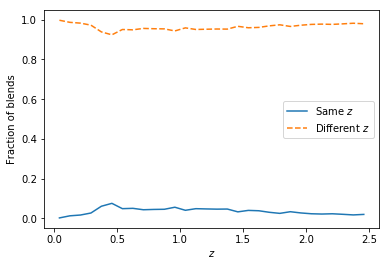

In [18]:
plt.plot(0.5*xedges[1:]+0.5*xedges[:-1],blends_same,'-',label='Same $z$')
plt.plot(0.5*xedges[1:]+0.5*xedges[:-1],blends_different,'--', label='Different $z$')
plt.xlabel('$z$')
plt.ylabel('Fraction of blends')
plt.legend()

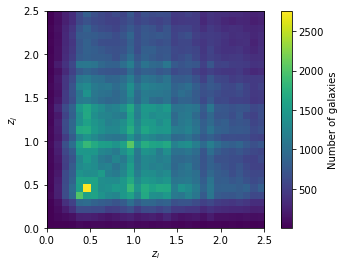

In [126]:
plt.imshow(countsxy,extent=[0,2.5,0,2.5],origin='lower')
plt.colorbar(label='Number of galaxies')
plt.xlabel('$z_{i}$')
plt.ylabel('$z_{j}$')

In [127]:
for i in range(countsxy.shape[0]):
    for j in range(countsxy.shape[1]):
        if(countsxy[i,j]>0):
            countsxy[i,j]=countsxy[i,j]/(counts[i]*counts[j])

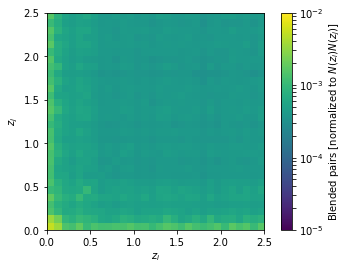

In [129]:
from matplotlib.colors import LogNorm
plt.imshow(countsxy,extent=[0,2.5,0,2.5],origin='lower',norm=LogNorm(vmin=1e-5,vmax=0.01))
plt.colorbar(label='Blended pairs [normalized to $N(z_{i})N(z_{j}$)]')
plt.xlabel('$z_{i}$')
plt.ylabel('$z_{j}$')

In [8]:
import seaborn as sns

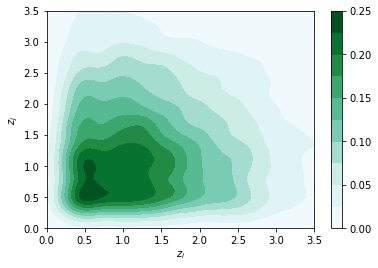

In [21]:
r_indices = np.random.choice(np.arange(len(density[:,0])),size=18000)
sns.kdeplot(density[r_indices,0],density[r_indices,1],shade=True, cbar=True,clip=(0,3.5,0,3.5))
plt.xlabel('$z_{i}$')
plt.ylabel('$z_{j}$')

In [119]:
from scipy.stats import binned_statistic

In [24]:
mean, binedges, binn = binned_statistic(cat['z'],cat['purity'],'mean',range=(0,4),bins=20)
std, binedges, binn = binned_statistic(cat['z'],cat['purity'],'std',range=(0,4),bins=20)
bincount, binedges, binn = binned_statistic(cat['z'],cat['purity'],'count',range=(0,4),bins=20)

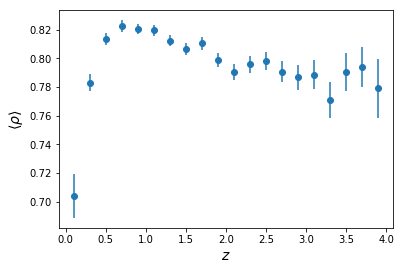

In [25]:
plt.errorbar(0.5*binedges[1:]+0.5*binedges[:-1],mean,std/np.sqrt(bincount),fmt='o')
plt.xlabel('$z$',fontsize=14)
plt.ylabel(r'$\langle \rho \rangle$', fontsize=14)
#plt.ylim(0,1)

In [26]:
mean, binedges, binn = binned_statistic(cat['ab_mag'],cat['purity'],'mean',range=(15,30),bins=60)
std, binedges, binn = binned_statistic(cat['ab_mag'],cat['purity'],'std',range=(15,30),bins=60)
bincount, binedges, binn = binned_statistic(cat['ab_mag'],cat['purity'],'count',range=(15,30),bins=60)

/Users/javiers/anaconda/lib/python2.7/site-packages/scipy/stats/_binned_statistic.py:568: RuntimeWarning: invalid value encountered in sqrt
  (flatsum[a] / flatcount[a]) ** 2)


/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


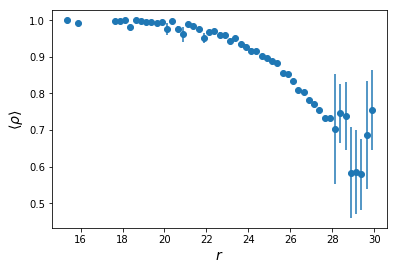

In [28]:
plt.errorbar(0.5*binedges[1:]+0.5*binedges[:-1],mean,std/np.sqrt(bincount),fmt='o')
plt.xlabel('$r$',fontsize=14)
plt.ylabel(r'$\langle \rho \rangle$', fontsize=14)
#plt.ylim(0,1)

# Checking how blending might affect photo-z

In [20]:
import sklearn.neighbors

In [125]:
cat.keys()

['db_id',
 'grp_id',
 'grp_size',
 'grp_rank',
 'visible',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'f_disk',
 'f_bulge',
 'dx',
 'dy',
 'z',
 'ab_mag',
 'ri_color',
 'flux',
 'sigma_m',
 'sigma_p',
 'e1',
 'e2',
 'a',
 'b',
 'beta',
 'psf_sigm',
 'purity',
 'snr_sky',
 'snr_iso',
 'snr_grp',
 'snr_isof',
 'snr_grpf',
 'ds',
 'dg1',
 'dg2',
 'ds_grp',
 'dg1_grp',
 'dg2_grp',
 'hsm_sigm',
 'hsm_e1',
 'hsm_e2',
 'g1_fit',
 'g2_fit']

In [261]:
def query_faint(cat,snr_th=5.):
    z_faint=[]
    rmag_faint=[]
    rmag_bright=[]
    z_bright=[]
    strange=[]
    snr_faint=[]
    snr_bright=[]
    id_bright=[]
    id_faint=[]
    groups = np.unique(cat['grp_id'][cat['grp_size']>1])
    count_all_detected = 0 
    count_none_detected = 0
    for group in groups:
        objs = group == cat['grp_id']
        snrs = cat['snr_grpf'][objs]
        mags = cat['ab_mag'][objs]
        zs = cat['z'][objs]
        xs = 0.5*cat['xmin'][objs]+0.5*cat['xmax'][objs]
        ys = 0.5*cat['ymin'][objs]+0.5*cat['ymax'][objs]
        ids = cat['db_id'][objs]
        if len(snrs)==np.count_nonzero(snrs>snr_th):
            count_all_detected = count_all_detected+1
        elif np.count_nonzero(snrs>=snr_th)<1:
            count_none_detected = count_none_detected+1
        else:
            not_detected_index = np.argmin(mags[snrs<snr_th])
            rmag_faint.append(mags[snrs<snr_th][not_detected_index])
            z_faint.append(zs[snrs<snr_th][not_detected_index])
            id_faint.append(ids[snrs<snr_th][not_detected_index])
            dists = np.sqrt((xs[snrs<snr_th][not_detected_index]-xs[snrs>=snr_th])**2+\
                            (ys[snrs<snr_th][not_detected_index]-ys[snrs>=snr_th])**2)
            close_bright_index = np.argmin(dists)
            rmag_bright.append(mags[snrs>=snr_th][close_bright_index])
            z_bright.append(zs[snrs>=snr_th][close_bright_index])
            snr_bright.append(snrs[snrs>=snr_th][close_bright_index])
            id_bright.append(ids[snrs>=snr_th][close_bright_index])
            snr_faint.append(snrs[snrs<snr_th][not_detected_index])
            if mags[snrs>=snr_th][close_bright_index]-mags[snrs<snr_th][not_detected_index]>0:
                strange.append(group)
    print 'Number of groups: ', len(groups)
    print 'All sources in the group detected for ', count_all_detected, ' groups.'
    print 'No sources detected in: ', count_none_detected, ' groups.'
    tab = astropy.table.Table([rmag_bright,z_bright,snr_bright,id_bright,rmag_faint,z_faint,snr_faint,id_faint],
                              names=('r_bright','z_bright','snr_bright','id_bright',
                                     'r_faint','z_faint','snr_faint','id_faint'))
    return tab, strange

In [262]:
tab, strange = query_faint(cat)

Number of groups:  6338
All sources in the group detected for  245  groups.
No sources detected in:  2083  groups.


In [263]:
print tab[(tab['r_bright']>tab['r_faint'])][0]

r_bright z_bright snr_bright id_bright  r_faint z_faint snr_faint  id_faint 
-------- -------- ---------- ---------- ------- ------- --------- ----------
 26.1499  1.65723    7.79619 2206541308 24.9691 1.43249   1.76274 2202606766


In [155]:
print len(strange), strange[0]

414 2200000157


In [164]:
cat[np.where(cat['db_id']==strange[0])[0]]

<Table length=1>
  db_id      grp_id   grp_size grp_rank ...  hsm_e1    hsm_e2   g1_fit  g2_fit
  int64      int64     int16    int16   ... float32   float32  float32 float32
---------- ---------- -------- -------- ... -------- --------- ------- -------
2200000157 2200000157      106        0 ... 0.244432 0.0440227     0.0     0.0

- Loop over groups
    - skip if ngrp < 2 or all grfp < grpf0 or all grfp > grpf0
    - find brightest with grpf < g0
       - find closest with grpf > g0

In [146]:
tab['z_bright']

<Column name='z_bright' dtype='float32' length=4010>
  1.65723
  1.18709
  2.83714
 0.703185
  1.38547
  1.55506
   1.1005
  3.60509
  1.01978
0.0882251
 0.763524
  1.10623
      ...
  2.70528
   2.9522
 0.882838
  3.02327
  2.44779
  2.39418
  2.42955
  2.36147
  2.74064
  2.30361
  2.58843
   2.6432

(array([   10.,    33.,   165.,   444.,   891.,  1236.,   841.,   298.,
           80.,    12.]),
 array([-6.93685913, -5.93941154, -4.94196396, -3.94451637, -2.94706879,
        -1.9496212 , -0.95217361,  0.04527397,  1.04272156,  2.04016914,
         3.03761673]),
 <a list of 10 Patch objects>)

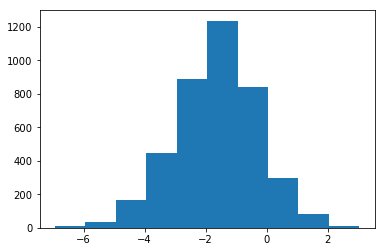

In [150]:
plt.hist(tab['r_bright']-tab['r_faint'])
plt.xlabel()

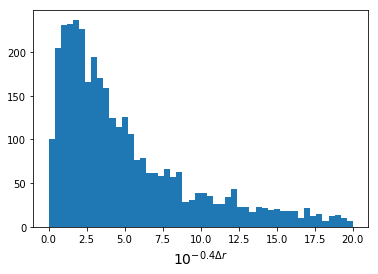

In [205]:
plt.hist(10**(-0.4*(tab['r_bright']-tab['r_faint'])),range=(0,20),bins=50)
plt.xlabel(r'$10^{-0.4\Delta r}$',fontsize=14)

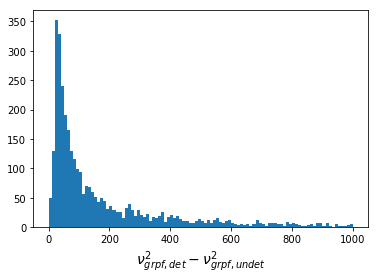

In [200]:
plt.hist(-tab['snr_faint']**2+tab['snr_bright']**2,bins=100,range=(0,1000));
plt.xlabel(r'$\nu_{grpf,det}^{2}-\nu_{grpf,undet}^{2}$',fontsize=14)

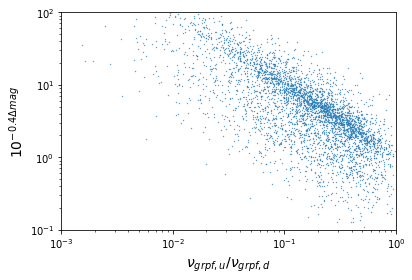

In [255]:
plt.scatter(tab['snr_faint']/tab['snr_bright'],10**(-0.4*(tab['r_bright']-tab['r_faint'])),marker='o',s=0.1)
plt.ylabel(r'$10^{-0.4\Delta mag}$',fontsize=14)
plt.xlim(1e-3,1)
plt.ylim(1e-1,100)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\nu_{grpf,u}/\nu_{grpf,d}$',fontsize=14)

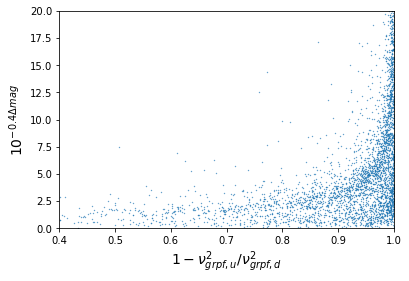

In [275]:
plt.scatter(1-tab['snr_faint']**2/tab['snr_bright']**2,10**(-0.4*(tab['r_bright']-tab['r_faint'])),marker='o',s=0.1)
plt.plot
plt.ylabel(r'$10^{-0.4\Delta mag}$',fontsize=14)
plt.xlim(0.4,1)
plt.ylim(0,20)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'$1-\nu_{grpf,u}^{2}/\nu_{grpf,d}^{2}$',fontsize=14)

(0, 3)

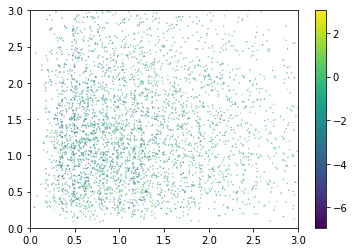

In [149]:
plt.scatter(tab['z_bright'],tab['z_faint'],c=tab['r_bright']-tab['r_faint'],marker='o',s=0.1)
plt.colorbar()
plt.xlim(0,3)
plt.ylim(0,3)

/Users/javiers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in divide


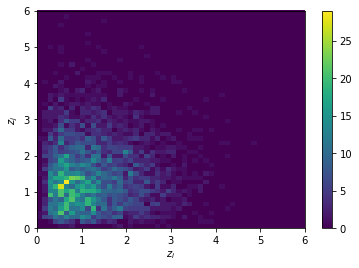

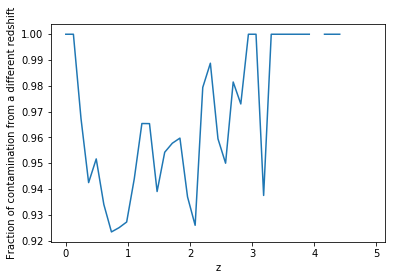

In [156]:
plt.hist2d(tab['z_bright'],tab['z_faint'],range=[(0,6),(0,6)],bins=50)
plt.colorbar()
plt.xlabel('$z_{i}$')
plt.ylabel('$z_{j}$')
bxy , xe, ye = np.histogram2d(tab['z_bright'],tab['z_faint'],range=[(0,6),(0,6)],bins=50)
plt.figure()
plt.plot(np.linspace(0,6,50),1-np.diagonal(bxy)/np.sum(bxy,axis=1))
plt.xlabel('z')
plt.ylabel('Fraction of contamination from a different redshift')

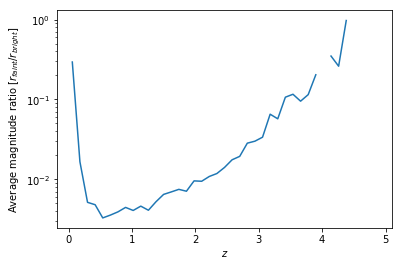

In [158]:
mag_ratio, binedges, binnum = binned_statistic(tab['z_bright'],tab['r_faint']/tab['r_bright'],range=(0,6),bins=50)
num_gals, binedges, binnum = binned_statistic(tab['z_bright'],tab['r_faint']/tab['r_bright'],statistic='count',range=(0,6),bins=50)
plt.plot(0.5*binedges[1:]+0.5*binedges[:-1],mag_ratio/num_gals)
plt.xlabel(r'$z$')
plt.ylabel(r'Average magnitude ratio [$r_{faint}/r_{bright}$]')
plt.yscale('log')

# Checking correlation of purity with change in $N_{eff}$

In [192]:
def delta_neff(results,isolation_cut=0.98,detection_cut=5.,nzbins=40,dz=0.1):
    hdr = results[0].header
    cat = astropy.table.Table.read(results,hdu=1)
    # Get our filter band.
    filter = hdr['FILTER_BAND'[-8:]].rstrip()
    # Calculate the simulated area in sq.arcmins.
    area = hdr['IMAGE_WIDTH'[-8:]]*hdr['IMAGE_HEIGHT'[-8:]]*hdr['PIXEL_SCALE'[-8:]]**2/3600.
    print 'Simulated area = %.3f sq.arcmins.' % area
    area_wgt = np.empty_like(cat['snr_sky'])
    area_wgt[:] = 1/area
    # Only use sources with centroids within the area and snr_iso > 0.
    bad_snr = (cat['snr_iso']<=0.)
    # Get our samples.
    undetected,detected,blended,isolated = make_samples(cat,isolation_cut,detection_cut)
    # Calculate the intrinsic shape noise variance of detected objects.
    intrinsic_var = 0.5*(np.var(cat['e1'][detected]) + np.var(cat['e2'][detected]))
    # Calculate neff weights per object.
    wgt = 0.5*(intrinsic_var/(intrinsic_var+cat['dg1_grp']**2)+intrinsic_var/(intrinsic_var+cat['dg2_grp']**2))
    wgt2 = 0.5*(intrinsic_var/(intrinsic_var+cat['dg1']**2)+intrinsic_var/(intrinsic_var+cat['dg2']**2))
    delta_Neff=np.zeros(nzbins)
    purity_sum=np.zeros(nzbins)
    # Calculate |e| values per object.
    for iz in range(nzbins):
        zbin = np.logical_and(cat['z']>=iz*dz,cat['z']<(iz+1)*dz)
        sample = np.logical_and(detected,zbin)
        num_sample = np.count_nonzero(sample)
        #print 'Number of objects in bin', iz, ' ', num_sample
        Neff = np.sum(wgt[sample])/area
        Neff2 = np.sum(wgt2[sample])/area
        delta_Neff[iz]=(Neff2-Neff)/num_sample
        purity_sum[iz]=np.sum(cat['purity'][sample])
    print delta_Neff
    plt.figure()
    plt.scatter(np.linspace(0.5*dz,(dz+0.5)*nzbins*dz,nzbins),delta_Neff,marker='.')
    plt.xlabel(r'$z$',fontsize=14)
    plt.ylabel(r'$N_{\rm eff, iso}-N_{\rm eff, grp}$',fontsize=14)
    groups = np.unique(cat['grp_id'][cat['grp_size']>1])
    ngroups = len(groups)
    purity_group = np.zeros(ngroups)
    delta_neff_group = np.zeros(ngroups)
    zmean = np.zeros(ngroups)
    for i,group in enumerate(groups):
        objs = np.logical_and(cat['grp_id']==group,cat['snr_grpf']>=detection_cut)
        purity_group[i]=np.count_nonzero(objs)-np.sum(cat['purity'][objs])
        delta_neff_group[i]=np.sum(wgt2[objs])-np.sum(wgt[objs])
        zmean[i]=np.mean(cat['z'][objs])
    purity_group=np.array(purity_group)
    delta_neff_group=np.array(delta_neff_group)
    return purity_group, delta_neff_group, zmean

Simulated area = 186.414 sq.arcmins.
Dropped 13 sources with snr_iso = 0 (max. snr_sky = 0.128)
Stellar sources simulated 0
Number of galaxies 45315
Visible sample fractions: undetected 69.05%, blended 12.31%, isolated 18.64%
Detected sample fractions: blended 39.78%, isolated 60.22%
[  5.18015497e-05   8.35124405e-05   1.03832871e-04   8.44940789e-05
   9.33485392e-05   9.58680175e-05   7.99742681e-05   8.45184356e-05
   8.65765643e-05   8.70476588e-05   8.53340756e-05   7.87957596e-05
   8.14827134e-05   8.81317335e-05   7.63409322e-05   9.01526284e-05
   8.28545333e-05   9.83661942e-05   9.07612534e-05   9.64812796e-05
   7.98444431e-05   1.08550749e-04   7.90766616e-05   6.88938826e-05
   7.22080511e-05   9.71502201e-05   8.58436432e-05   6.27436845e-05
   8.51187260e-05   5.54339739e-05   7.10957693e-05   7.35651371e-05
   8.79320083e-05   5.59245450e-05   7.01452006e-05   1.01662518e-04
   9.90305438e-05   2.04099138e-05   9.40220275e-05   5.27013264e-05]


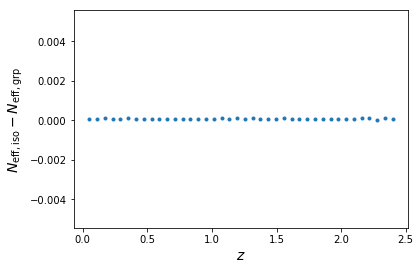

In [193]:
purity_group, delta_neff_group, zmean = delta_neff(LSST_r)

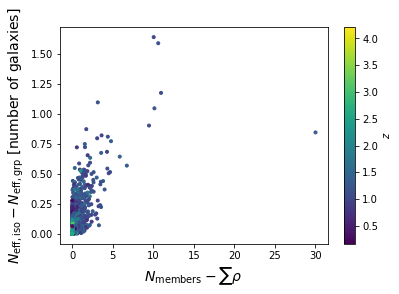

In [203]:
plt.figure()
plt.scatter(purity_group,delta_neff_group,marker='.',c=zmean)
plt.xlabel(r'$N_{\rm members}-\sum \rho$',fontsize=14)
plt.ylabel(r'$N_{\rm eff, iso}-N_{\rm eff, grp}$ [number of galaxies]',fontsize=14)
plt.colorbar(label='$z$')

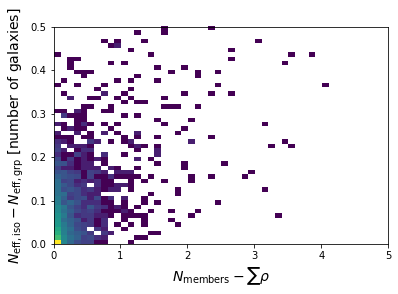

In [213]:
plt.hist2d(purity_group,delta_neff_group,range=[(0,5),(0,0.5)],bins=50,norm=LogNorm())
plt.xlabel(r'$N_{\rm members}-\sum \rho$',fontsize=14)
plt.ylabel(r'$N_{\rm eff, iso}-N_{\rm eff, grp}$ [number of galaxies]',fontsize=14)

In [7]:
cat_ismael = astropy.table.Table.read('/Users/javiers/Downloads/final_fits.fits')

In [8]:
cat_ismael

<Table length=868798>
   db_id        grp_id    grp_size grp_rank ...  bias_y_grp  match ambig_blend
   int64        int64      int16    int16   ...   float32    int64     bool   
------------ ------------ -------- -------- ... ------------ ----- -----------
402713998325 402713998325        1        0 ...   0.00138919    -1       False
402707721988 402707721988        1        0 ... -0.000328476    -1       False
402711568059 402711568059        2        0 ...   0.00131826    -1       False
402715332898 402711568059        2        1 ...    0.0106381    -1       False
402709443937 402709443937        2        0 ...  0.000766356    -1       False
402714392263 402709443937        2        1 ...  -0.00542866    -1       False
402701771027 402701771027        1        0 ...  1.75922e-07  1840       False
402701802864 402701802864        2        0 ... -0.000562559  1797       False
402713992486 402713992486        1        0 ... -0.000102654    -1       False
402711081168 402711081168        1        0 ...  7.01432e-06    -1       False
         ...          ...      ...      ... ...          ...   ...         ...
  2203664650   2201224219        7        2 ...  0.000864773  1646       False
  2204580068   2201224219        7        3 ... -1.16923e-05    -1       False
  2208879859   2200131430       17       11 ... -2.43165e-05    -1       False
  2204116805   2204116805        1        0 ...  5.45123e-08  1664       False
  2203413193   2203413193        1        0 ... -3.44336e-07  1738       False
  2201841110   2201224219        7        1 ...   0.00331778  1679       False
  2207445310   2201224219        7        5 ... -0.000187941    -1       False
  2216553374   2216553374        1        0 ...  -0.00141699    -1       False
  2201224219   2201224219        7        0 ... -1.95842e-05  1671       False
  2210804191   2201224219        7        6 ...   -0.0010302    -1       False

In [9]:
def check_redshift_blends(cat):
    z_faint_det=[]
    rmag_faint_det=[]
    rmag_bright_det=[]
    z_bright_det=[]
    snr_faint_det=[]
    snr_bright_det=[]
    id_bright_det=[]
    id_faint_det=[]
    z_faint_undet=[]
    rmag_faint_undet=[]
    rmag_bright_undet=[]
    z_bright_undet=[]
    snr_faint_undet=[]
    snr_bright_undet=[]
    id_bright_undet=[]
    id_faint_undet=[]
    groups = np.unique(cat['grp_id'][cat['grp_size']>1])
    print 'Number of groups', np.count_nonzero(groups)
    count_none_detected=0
    for group in groups:
        objs = group == cat['grp_id']
        ambig = cat['ambig_blend'][objs]==True
        det_ambig = (cat['match'][objs]>0) & (cat['ambig_blend'][objs])
        det_tab = cat[objs][det_ambig]
        if len(det_tab)>0:
            #print len(det_tab), group
            for obj in det_tab:
                dists = np.sqrt((obj['dx']-cat['dx'][objs][ambig])**2+(obj['dy']-cat['dy'][objs][ambig])**2)
                dif_objs = cat['db_id'][objs][ambig]!=obj['db_id']
                if np.count_nonzero(dif_objs)>0:
                    blend = np.argmin(dists[dif_objs])
                    blend_row = cat[objs][ambig][dif_objs][blend]
                    if blend_row['match']>0:
                        z_bright_det.append(obj['z'])
                        z_faint_det.append(blend_row['z'])
                        rmag_bright_det.append(obj['ab_mag'])
                        rmag_faint_det.append(blend_row['ab_mag'])
                        id_bright_det.append(obj['db_id'])
                        id_faint_det.append(blend_row['db_id'])
                        snr_bright_det.append(obj['snr_grpf'])
                        snr_faint_det.append(blend_row['snr_grpf'])
                    if blend_row['match']==-1:
                        z_bright_undet.append(obj['z'])
                        z_faint_undet.append(blend_row['z'])
                        rmag_bright_undet.append(obj['ab_mag'])
                        rmag_faint_undet.append(blend_row['ab_mag'])
                        id_bright_undet.append(obj['db_id'])
                        id_faint_undet.append(blend_row['db_id'])
                        snr_bright_undet.append(obj['snr_grpf'])
                        snr_faint_undet.append(blend_row['snr_grpf'])
                    else:
                        count_none_detected=count_none_detected+1
            else:
                count_none_detected=count_none_detected+1
    print 'Number of groups: ', len(groups)
    print 'No sources detected in: ', count_none_detected, ' groups.'
    tab = astropy.table.Table([rmag_bright_det,z_bright_det,snr_bright_det,id_bright_det,rmag_faint_det,z_faint_det,snr_faint_det,id_faint_det],
                              names=('r_bright','z_bright','snr_bright','id_bright',
                                     'r_faint','z_faint','snr_faint','id_faint'))
    tab2 = astropy.table.Table([rmag_bright_undet,z_bright_undet,snr_bright_undet,id_bright_undet,rmag_faint_undet,z_faint_undet,snr_faint_undet,id_faint_undet],
                              names=('r_bright','z_bright','snr_bright','id_bright',
                                     'r_faint','z_faint','snr_faint','id_faint'))
    return tab, tab2

In [309]:
tab, tab2 = check_redshift_blends(cat_ismael)

Number of groups 126012


KeyboardInterrupt: 

In [10]:
def get_neighbor(input_cat):
    from sklearn.neighbors import KDTree
    groups = np.unique(input_cat['grp_id'][input_cat['grp_size']>1])
    selection = (input_cat['grp_size']>1) & (input_cat['ambig_blend']) & (input_cat['match']>0)
    selection2 = (input_cat['grp_size']>1) & (input_cat['ambig_blend'])
    X = np.zeros((np.count_nonzero(selection),2))
    X[:,0]=input_cat['dx'][selection]
    X[:,1]=input_cat['dy'][selection]
    Y = np.zeros((np.count_nonzero(selection2),2))
    Y[:,0]=input_cat['dx'][selection2]
    Y[:,1]=input_cat['dy'][selection2]
    tree = KDTree(Y)
    dist, ind = tree.query(X,k=2)
    #print dist, ind
    indices = np.array(ind[:,1]).ravel()
    return input_cat[selection2][indices], input_cat[selection]

In [11]:
tab_faint, tab_bright = get_neighbor(cat_ismael)

In [12]:
tab_faint, tab_bright['match']

(<Table length=47116>
    db_id        grp_id    grp_size grp_rank ...  bias_y_grp  match ambig_blend
    int64        int64      int16    int16   ...   float32    int64     bool   
 ------------ ------------ -------- -------- ... ------------ ----- -----------
 402702302630 402700147634        9        5 ...   0.00114213    -1        True
 402701150961 402700147634        9        2 ... -8.07256e-05    -1        True
 402713783183 402700011603       88       80 ...     -1.96632    -1        True
 402706041301 402700011603       88       27 ...    0.0847208    -1        True
 402713783183 402700011603       88       80 ...     -1.96632    -1        True
 402714993835 402700054046       28       26 ...    0.0442598    -1        True
 402701898945 402700054046       28        4 ...   -0.0328061    -1        True
 402715975560 402702990054        7        5 ...      2.71059    -1        True
 402704414931 402703138915        3        1 ...    -0.140399    -1        True
 402705684015 4027

(array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   9.,   5., ...,   1.,   1.,   1.],
        [  2.,   3.,  19., ...,   3.,   2.,   1.],
        ..., 
        [  0.,   0.,   1., ...,   0.,   0.,   0.],
        [  0.,   1.,   2., ...,   0.,   1.,   0.],
        [  0.,   1.,   0., ...,   0.,   0.,   0.]]),
 array([ 0.        ,  0.07      ,  0.14      ,  0.20999999,  0.28      ,
         0.34999999,  0.41999999,  0.49000001,  0.56      ,  0.63      ,
         0.69999999,  0.76999998,  0.83999997,  0.91000003,  0.98000002,
         1.04999995,  1.12      ,  1.19000006,  1.25999999,  1.33000004,
         1.39999998,  1.47000003,  1.53999996,  1.61000001,  1.67999995,
         1.75      ,  1.82000005,  1.88999999,  1.96000004,  2.02999997,
         2.0999999 ,  2.17000008,  2.24000001,  2.30999994,  2.38000011,
         2.45000005,  2.51999998,  2.58999991,  2.66000009,  2.73000002,
         2.79999995,  2.86999989,  2.94000006,  3.00999999,  3.07999992,
         3.1500001 , 

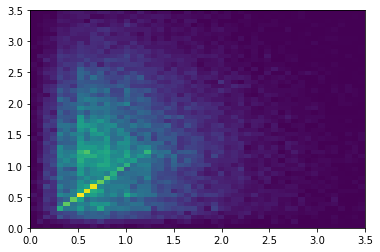

In [13]:
plt.hist2d(tab_bright['z'][tab_faint['match']<0],tab_faint['z'][tab_faint['match']<0],bins=50,range=[(0,3.5),(0,3.5)])

In [35]:
tab_faint.write('/Users/javiers/Desktop/tab_not_detected.fits.gz')
tab_bright.write('/Users/javiers/Desktop/tab_detected.fits.gz')

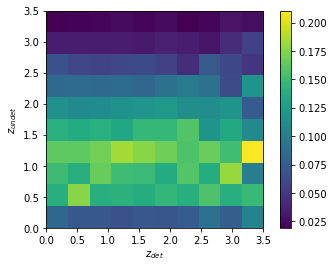

In [14]:
prob_blend, xx, yy = np.histogram2d(tab_bright['z'][tab_faint['match']<0],tab_faint['z'][tab_faint['match']<0],bins=10,range=[(0,3.5),(0,3.5)])
#plt.imshow(prob_blend.T,origin='lower')
plt.imshow(prob_blend.T/np.sum(prob_blend.T,axis=0),origin='lower',extent=[0,3.5,0,3.5])
plt.colorbar()
plt.xlabel('$z_{det}$')
plt.ylabel('$z_{undet}$')

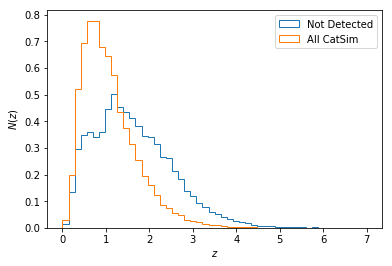

In [15]:
plt.hist(cat_ismael['z'][cat_ismael['match']<0],histtype='step',label='Not Detected',bins=50,range=(0,7),normed=True)
#plt.hist(tab_faint['z'][tab_faint['match']>0],histtype='step',label='Detected',bins=50,range=(0,7),normed=True)
plt.hist(cat_ismael['z'][cat_ismael['match']>0],histtype='step',label='All CatSim',bins=50,range=(0,7),normed=True)
plt.legend(loc='best')
plt.xlabel('$z$')
plt.ylabel('$N(z)$')

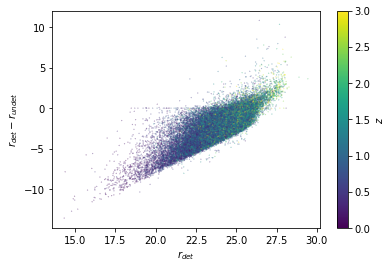

In [34]:
plt.scatter(tab_bright['ab_mag'][tab_faint['match']<0],tab_bright['ab_mag'][tab_faint['match']<0]-tab_faint['ab_mag'][tab_faint['match']<0],marker='.',c=tab_bright['z'][tab_faint['match']<0],s=0.1,vmin=0, vmax=3)
plt.xlabel('$r_{det}$')
plt.ylabel('$r_{det}-r_{undet}$')
plt.colorbar(label='$z$')

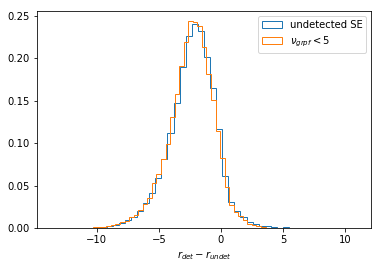

In [31]:
plt.hist(tab_bright['ab_mag'][tab_faint['match']<0]-tab_faint['ab_mag'][tab_faint['match']<0],bins=50,histtype='step',normed=True,label='undetected SE')
plt.hist(tab_bright['ab_mag'][tab_faint['snr_grpf']<5]-tab_faint['ab_mag'][tab_faint['snr_grpf']<5],bins=50,histtype='step',normed=True,label=r'$\nu_{grpf}<5$')
plt.xlabel('$r_{det}-r_{undet}$')
plt.legend()

In [102]:
print zcuts, [5+25*(i+1) for i in range(0,3)]

[ 0.68530222  1.02598037  1.54203606] [30, 55, 80]


In [103]:
zcuts = np.append(0,zcuts)
zcuts = np.append(zcuts,np.max(cat_ismael['z']))

In [133]:
zcuts=np.array([0,1,1.5,2.5])

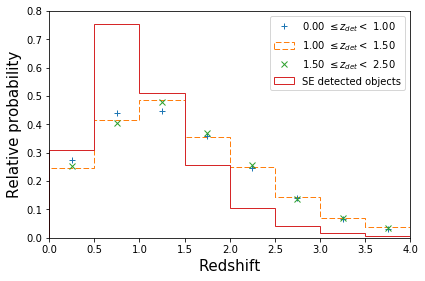

In [144]:
counts, binedges = np.histogram(tab_faint['z'][(tab_bright['z']>=zcuts[0]) & (tab_bright['z']<zcuts[1])],range=(0,4),bins=8)
db = (binedges[1:]-binedges[:-1])
err = np.sqrt(counts)/(np.sum(counts)*db)
fig, ax = plt.subplots(1)
ax.plot(0.5*binedges[1:]+0.5*binedges[:-1], counts/(np.sum(counts)*db), marker='+',linestyle='none',label='%.2f $\leq z_{det} <$ %.2f' % (zcuts[0],zcuts[1]),mfc='none')
ax.hist(tab_faint['z'][(tab_bright['z']>=zcuts[1]) & (tab_bright['z']<zcuts[2])],range=(0,4),bins=8,normed=True,histtype='step',linestyle='--',label='%.2f $\leq z_{det} <$ %.2f' % (zcuts[1],zcuts[2]))
counts, binedges = np.histogram(tab_faint['z'][(tab_bright['z']>=zcuts[2]) & (tab_bright['z']<zcuts[3])],range=(0,4),bins=8)
db = (binedges[1:]-binedges[:-1])
err = np.sqrt(counts)/(np.sum(counts)*db)
ax.plot(0.5*binedges[1:]+0.5*binedges[:-1], counts/(np.sum(counts)*db),  marker='x',linestyle='none',label='%.2f $\leq z_{det} <$ %.2f' % (zcuts[2],zcuts[3]),mfc='none')
ax.hist(cat_ismael['z'][cat_ismael['match']>0], range=(0,4),bins=8, normed=True,histtype='step', label='SE detected objects')
ax.set_ylim(0,0.8)
ax.set_xlim(0,4)
ax.set_xlabel('Redshift',fontsize=15)
ax.set_ylabel('Relative probability',fontsize=15)
#plt.legend(loc='best')
handles,labels = ax.get_legend_handles_labels()

handles = [handles[0], handles[2], handles[1], handles[3]]
labels = [labels[0], labels[2], labels[1], lab]
ax.legend(handles,labels,loc='best')
plt.tight_layout()
#plt.grid()